In [1]:
model = "lstm"
card_type = "Diamonds"

In [2]:
# Parameters
card_type = "Diamonds"
model = "lstm"


In [3]:
import pandas as pd
import numpy as np
from chance_utils import compute_statistics
from matplotlib import pyplot as plt

In [4]:
possible_result = ["7","8","9","10","J","Q","K","A"]
all_cards = ['Spades','Diamonds','Hearts','Clubs']
n_outputs = 8
n_features = 8*4
sample_length = 240*5

In [5]:
dummies = pd.get_dummies(possible_result).T
dummies = dummies.reindex(index=possible_result,fill_value=0)
dummies = dummies.reset_index()
dummies

,index,0,1,2,3,4,5,6,7
0,7,1,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0
3,10,0,0,0,1,0,0,0,0
4,J,0,0,0,0,1,0,0,0
5,Q,0,0,0,0,0,1,0,0
6,K,0,0,0,0,0,0,1,0
7,A,0,0,0,0,0,0,0,1


In [6]:
def replace_with_dummies(df):
    df = pd.merge(dummies,df,left_on='index',right_on="Spades",how="right").drop(columns=["Spades"])
    df = pd.merge(dummies,df,left_on='index',right_on="Diamonds",how="right",suffixes=("_Diamonds","")).drop(columns=["Diamonds","index_Diamonds"])
    df = pd.merge(dummies,df,left_on='index',right_on="Hearts",how="right",suffixes=("_Hearts","")).drop(columns=["Hearts","index_Hearts"])
    return pd.merge(dummies,df,left_on='index',right_on="Clubs",how="right",suffixes=("_Clubs","")).drop(columns=["index","Clubs","index_Clubs"])

    

In [7]:
test_chance = pd.read_csv("test_chance.csv",index_col=[0])
test_chance.Date = pd.to_datetime(test_chance.Date)

train_chance = pd.read_csv('train_chance.csv',index_col=[0])
train_chance.Date = pd.to_datetime(train_chance.Date)

In [8]:
test_chance = replace_with_dummies(test_chance)
train_chance = replace_with_dummies(train_chance)

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_63360/3572030588.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1', '5', '4', '6', '2', '3', '7', '0'} in the result is deprecated and will raise a MergeError in a future version.
  return pd.merge(dummies,df,left_on='index',right_on="Clubs",how="right",suffixes=("_Clubs","")).drop(columns=["index","Clubs","index_Clubs"])
/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_63360/3572030588.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1', '5', '4', '6', '2', '3', '7', '0'} in the result is deprecated and will raise a MergeError in a future version.
  return pd.merge(dummies,df,left_on='index',right_on="Clubs",how="right",suffixes=("_Clubs","")).drop(columns=["index","Clubs","index_Clubs"])


In [9]:
# make the samples ready to tsfresh
spades_test_chance = test_chance.sort_values(by="Date").reset_index(drop=True)
spades_test_chance['id'] = 1

spades_train_chance = train_chance.sort_values(by="Date").reset_index(drop=True)
spades_train_chance['id'] = 1

spades_train_chance.tail()

,0_Clubs,1_Clubs,2_Clubs,3_Clubs,4_Clubs,5_Clubs,6_Clubs,7_Clubs,0,1,...,1,2,3,4,5,6,7,Date,lottoryNumber,id
29119,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035924,35924,1
29120,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035925,35925,1
29121,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035926,35926,1
29122,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,35927,1
29123,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035928,35928,1


In [10]:
from tsfresh.utilities.dataframe_functions import roll_time_series

df_test_rolled = roll_time_series(spades_test_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled = roll_time_series(spades_train_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled.tail()

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:03<02:12,  3.40s/it]

Rolling:   5%|▌         | 2/40 [00:03<00:56,  1.49s/it]

Rolling:  12%|█▎        | 5/40 [00:03<00:15,  2.23it/s]

Rolling:  18%|█▊        | 7/40 [00:05<00:21,  1.53it/s]

Rolling:  20%|██        | 8/40 [00:05<00:18,  1.68it/s]

Rolling:  22%|██▎       | 9/40 [00:06<00:16,  1.82it/s]

Rolling:  25%|██▌       | 10/40 [00:06<00:15,  1.94it/s]

Rolling:  28%|██▊       | 11/40 [00:07<00:14,  2.02it/s]

Rolling:  30%|███       | 12/40 [00:07<00:12,  2.29it/s]

Rolling:  32%|███▎      | 13/40 [00:08<00:12,  2.21it/s]

Rolling:  35%|███▌      | 14/40 [00:08<00:12,  2.10it/s]

Rolling:  38%|███▊      | 15/40 [00:08<00:10,  2.43it/s]

Rolling:  40%|████      | 16/40 [00:09<00:08,  2.73it/s]

Rolling:  42%|████▎     | 17/40 [00:09<00:09,  2.30it/s]

Rolling:  45%|████▌     | 18/40 [00:09<00:08,  2.64it/s]

Rolling:  48%|████▊     | 19/40 [00:10<00:07,  2.91it/s]

Rolling:  50%|█████     | 20/40 [00:10<00:08,  2.27it/s]

Rolling:  52%|█████▎    | 21/40 [00:11<00:07,  2.62it/s]

Rolling:  55%|█████▌    | 22/40 [00:11<00:06,  2.88it/s]

Rolling:  57%|█████▊    | 23/40 [00:11<00:05,  3.10it/s]

Rolling:  60%|██████    | 24/40 [00:12<00:07,  2.20it/s]

Rolling:  62%|██████▎   | 25/40 [00:12<00:05,  2.52it/s]

Rolling:  65%|██████▌   | 26/40 [00:12<00:04,  2.83it/s]

Rolling:  68%|██████▊   | 27/40 [00:13<00:04,  3.09it/s]

Rolling:  70%|███████   | 28/40 [00:13<00:05,  2.07it/s]

Rolling:  72%|███████▎  | 29/40 [00:14<00:04,  2.41it/s]

Rolling:  75%|███████▌  | 30/40 [00:14<00:03,  2.74it/s]

Rolling:  78%|███████▊  | 31/40 [00:14<00:02,  3.04it/s]

Rolling:  80%|████████  | 32/40 [00:14<00:02,  3.28it/s]

Rolling:  82%|████████▎ | 33/40 [00:15<00:02,  3.45it/s]

Rolling:  85%|████████▌ | 34/40 [00:16<00:02,  2.04it/s]

Rolling:  88%|████████▊ | 35/40 [00:16<00:02,  2.41it/s]

Rolling:  90%|█████████ | 36/40 [00:16<00:01,  2.76it/s]

Rolling:  92%|█████████▎| 37/40 [00:16<00:00,  3.07it/s]

Rolling:  95%|█████████▌| 38/40 [00:17<00:00,  3.33it/s]

Rolling:  98%|█████████▊| 39/40 [00:17<00:00,  3.54it/s]

Rolling: 100%|██████████| 40/40 [00:17<00:00,  3.92it/s]

Rolling: 100%|██████████| 40/40 [00:17<00:00,  2.27it/s]

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:09<05:54,  9.09s/it]

Rolling:   5%|▌         | 2/40 [00:11<03:07,  4.94s/it]

Rolling:   8%|▊         | 3/40 [00:14<02:36,  4.22s/it]

Rolling:  10%|█         | 4/40 [00:15<01:53,  3.15s/it]

Rolling:  12%|█▎        | 5/40 [00:18<01:45,  3.01s/it]

Rolling:  15%|█▌        | 6/40 [00:20<01:24,  2.50s/it]

Rolling:  18%|█▊        | 7/40 [00:21<01:11,  2.17s/it]

Rolling:  20%|██        | 8/40 [00:23<01:03,  1.98s/it]

Rolling:  22%|██▎       | 9/40 [00:26<01:10,  2.26s/it]

Rolling:  25%|██▌       | 10/40 [00:27<01:00,  2.03s/it]

Rolling:  28%|██▊       | 11/40 [00:29<00:54,  1.89s/it]

Rolling:  30%|███       | 12/40 [00:30<00:45,  1.63s/it]

Rolling:  32%|███▎      | 13/40 [00:32<00:52,  1.94s/it]

Rolling:  35%|███▌      | 14/40 [00:33<00:42,  1.64s/it]

Rolling:  38%|███▊      | 15/40 [00:34<00:36,  1.45s/it]

Rolling:  40%|████      | 16/40 [00:35<00:31,  1.32s/it]

Rolling:  42%|████▎     | 17/40 [00:37<00:28,  1.24s/it]

Rolling:  45%|████▌     | 18/40 [00:40<00:42,  1.91s/it]

Rolling:  48%|████▊     | 19/40 [00:41<00:34,  1.64s/it]

Rolling:  50%|█████     | 20/40 [00:42<00:29,  1.48s/it]

Rolling:  52%|█████▎    | 21/40 [00:43<00:26,  1.38s/it]

Rolling:  55%|█████▌    | 22/40 [00:44<00:23,  1.31s/it]

Rolling:  57%|█████▊    | 23/40 [00:46<00:21,  1.27s/it]

Rolling:  60%|██████    | 24/40 [00:47<00:19,  1.24s/it]

Rolling:  62%|██████▎   | 25/40 [00:51<00:31,  2.07s/it]

Rolling:  65%|██████▌   | 26/40 [00:52<00:25,  1.79s/it]

Rolling:  68%|██████▊   | 27/40 [00:53<00:20,  1.60s/it]

Rolling:  70%|███████   | 28/40 [00:54<00:17,  1.46s/it]

Rolling:  72%|███████▎  | 29/40 [00:55<00:14,  1.36s/it]

Rolling:  75%|███████▌  | 30/40 [00:56<00:12,  1.30s/it]

Rolling:  78%|███████▊  | 31/40 [00:58<00:11,  1.28s/it]

Rolling:  80%|████████  | 32/40 [00:59<00:10,  1.25s/it]

Rolling:  82%|████████▎ | 33/40 [01:00<00:08,  1.23s/it]

Rolling:  85%|████████▌ | 34/40 [01:06<00:16,  2.72s/it]

Rolling:  88%|████████▊ | 35/40 [01:08<00:11,  2.29s/it]

Rolling:  90%|█████████ | 36/40 [01:09<00:07,  1.98s/it]

Rolling:  92%|█████████▎| 37/40 [01:10<00:05,  1.78s/it]

Rolling:  95%|█████████▌| 38/40 [01:11<00:03,  1.63s/it]

Rolling:  98%|█████████▊| 39/40 [01:13<00:01,  1.50s/it]

Rolling: 100%|██████████| 40/40 [01:14<00:00,  1.36s/it]

Rolling: 100%|██████████| 40/40 [01:14<00:00,  1.85s/it]

,0_Clubs,1_Clubs,2_Clubs,3_Clubs,4_Clubs,5_Clubs,6_Clubs,7_Clubs,0,1,...,1,2,3,4,5,6,7,Date,lottoryNumber,id
33509995,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035924,35924,"(1, 2017-12-07 00:00:00.035928)"
33509996,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035925,35925,"(1, 2017-12-07 00:00:00.035928)"
33509997,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035926,35926,"(1, 2017-12-07 00:00:00.035928)"
33509998,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,35927,"(1, 2017-12-07 00:00:00.035928)"
33509999,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035928,35928,"(1, 2017-12-07 00:00:00.035928)"


In [11]:
test_labeling_df = test_chance.drop(columns=["Date"])
train_labeling_df = train_chance.drop(columns=["Date"])

labeling_df = pd.concat([test_labeling_df,train_labeling_df])
labeling_df.head()

,0_Clubs,1_Clubs,2_Clubs,3_Clubs,4_Clubs,5_Clubs,6_Clubs,7_Clubs,0,1,...,7_Diamonds,0,1,2,3,4,5,6,7,lottoryNumber
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,35944
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,35945
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,35946
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,35947
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,35948


In [12]:
def make_a_sample(current_sample,labeling_df):
    
    current_id = current_sample['id'].values[0]
    final_label = None
    
    assert current_sample.shape[0] == sample_length, f"{current_id} is not shape of {sample_length}"

    lottey_num_predicting = (current_id[1].microsecond + 1)
    label = labeling_df[labeling_df.lottoryNumber == lottey_num_predicting]
    
    if len(label) == 1:
        final_label = label.values[0]

    sample = current_sample.drop(columns=['id','Date']).values

    return lottey_num_predicting,final_label,sample

In [13]:
train = df_train_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

train = sorted(train.values,key=lambda x:x[0])
_,train_y,train_x = map(list, zip(*train))

In [14]:
test = df_test_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

test = sorted(test.values,key=lambda x:x[0])
_,test_y,test_x = map(list, zip(*test))

In [15]:
test_y = pd.DataFrame(test_y[:-1])
last_sample = test_x[-1]

test_x = test_x[:-1]
train_y = pd.DataFrame(train_y)

In [16]:
test_x = np.stack(test_x)
train_x = np.stack(train_x)

In [17]:
test_x = test_x[:,:,:-1]
train_x = train_x[:,:,:-1]
test_y = test_y.iloc[:,:-1]
train_y = train_y.iloc[:,:-1]

In [18]:
assert test_x.shape[0] == test_y.shape[0] and train_x.shape[0] == train_y.shape[0]

In [19]:
print(f"Test shape {test_x.shape}")
print(f"Train shape {train_x.shape}")

Test shape (8509, 1200, 32)
Train shape (27925, 1200, 32)


In [20]:
test_y.iloc[:,:8].shape

(8509, 8)

In [21]:
import tensorflow as tf

if model == "lstm":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(100, input_shape=(sample_length,n_features)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
elif model == "nn":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(sample_length,8)))
    model.add(tf.keras.layers.Dense(350, activation='relu'))
    model.add(tf.keras.layers.Dense(250, activation='relu'))
    model.add(tf.keras.layers.Dense(150, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
    
model.summary()
print("==========================")
for layer in model.layers:
    print(layer.input_shape)

2022-08-14 22:34:43.516948: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 100)               53200     


 dropout (Dropout)           (None, 100)               0         


 dense (Dense)               (None, 100)               10100     


 dense_1 (Dense)             (None, 8)                 808       


Total params: 64,108


Trainable params: 64,108


Non-trainable params: 0


_________________________________________________________________


(None, 1200, 32)
(None, 100)
(None, 100)
(None, 100)


In [22]:
card_type_index = all_cards.index(card_type)
start_index = card_type_index*8
end_index = (card_type_index+1)*8

test_y = test_y.iloc[:,start_index:end_index]
train_y = train_y.iloc[:,start_index:end_index]

In [23]:
assert not np.isnan(train_x).any()
assert not np.isnan(train_y).any().any()
assert not np.isnan(test_x).any()
assert not np.isnan(test_y).any().any()

In [24]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)
#  
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),batch_size=64,epochs=300,callbacks=[es])

Epoch 1/300


  1/437 [..............................] - ETA: 24:24 - loss: 2.1048 - accuracy: 0.1094

  2/437 [..............................] - ETA: 4:27 - loss: 2.0877 - accuracy: 0.1172 

  3/437 [..............................] - ETA: 4:29 - loss: 2.0925 - accuracy: 0.0885

  4/437 [..............................] - ETA: 4:30 - loss: 2.0877 - accuracy: 0.0898

  5/437 [..............................] - ETA: 4:33 - loss: 2.0873 - accuracy: 0.0906

  6/437 [..............................] - ETA: 4:38 - loss: 2.0849 - accuracy: 0.1016

  7/437 [..............................] - ETA: 4:42 - loss: 2.0844 - accuracy: 0.1183

  8/437 [..............................] - ETA: 5:00 - loss: 2.0842 - accuracy: 0.1211

  9/437 [..............................] - ETA: 5:00 - loss: 2.0862 - accuracy: 0.1163

 10/437 [..............................] - ETA: 5:26 - loss: 2.0868 - accuracy: 0.1125

 11/437 [..............................] - ETA: 5:25 - loss: 2.0860 - accuracy: 0.1151

 12/437 [..............................] - ETA: 6:03 - loss: 2.0863 - accuracy: 0.1133

 13/437 [..............................] - ETA: 5:59 - loss: 2.0872 - accuracy: 0.1142

 14/437 [..............................] - ETA: 5:55 - loss: 2.0865 - accuracy: 0.1183

 15/437 [>.............................] - ETA: 5:52 - loss: 2.0874 - accuracy: 0.1208

 16/437 [>.............................] - ETA: 5:53 - loss: 2.0874 - accuracy: 0.1230

 17/437 [>.............................] - ETA: 5:54 - loss: 2.0870 - accuracy: 0.1222

 18/437 [>.............................] - ETA: 6:09 - loss: 2.0875 - accuracy: 0.1233

 19/437 [>.............................] - ETA: 6:10 - loss: 2.0885 - accuracy: 0.1184

 20/437 [>.............................] - ETA: 6:09 - loss: 2.0881 - accuracy: 0.1187

 21/437 [>.............................] - ETA: 6:21 - loss: 2.0877 - accuracy: 0.1205

 22/437 [>.............................] - ETA: 6:18 - loss: 2.0885 - accuracy: 0.1214

 23/437 [>.............................] - ETA: 6:15 - loss: 2.0881 - accuracy: 0.1209

 24/437 [>.............................] - ETA: 6:12 - loss: 2.0878 - accuracy: 0.1224

 25/437 [>.............................] - ETA: 6:15 - loss: 2.0875 - accuracy: 0.1213

 26/437 [>.............................] - ETA: 6:13 - loss: 2.0873 - accuracy: 0.1208

 27/437 [>.............................] - ETA: 6:24 - loss: 2.0867 - accuracy: 0.1209

 28/437 [>.............................] - ETA: 6:22 - loss: 2.0866 - accuracy: 0.1228

 29/437 [>.............................] - ETA: 6:28 - loss: 2.0866 - accuracy: 0.1228

 30/437 [=>............................] - ETA: 6:27 - loss: 2.0872 - accuracy: 0.1193

 31/437 [=>............................] - ETA: 6:26 - loss: 2.0869 - accuracy: 0.1215

 32/437 [=>............................] - ETA: 6:24 - loss: 2.0862 - accuracy: 0.1216

 33/437 [=>............................] - ETA: 6:21 - loss: 2.0853 - accuracy: 0.1236

 34/437 [=>............................] - ETA: 6:23 - loss: 2.0853 - accuracy: 0.1227

 35/437 [=>............................] - ETA: 6:20 - loss: 2.0854 - accuracy: 0.1214

 36/437 [=>............................] - ETA: 6:19 - loss: 2.0850 - accuracy: 0.1215

 37/437 [=>............................] - ETA: 6:17 - loss: 2.0849 - accuracy: 0.1225

 38/437 [=>............................] - ETA: 6:15 - loss: 2.0851 - accuracy: 0.1229

 39/437 [=>............................] - ETA: 6:18 - loss: 2.0848 - accuracy: 0.1238

 40/437 [=>............................] - ETA: 6:16 - loss: 2.0850 - accuracy: 0.1238

 41/437 [=>............................] - ETA: 6:14 - loss: 2.0847 - accuracy: 0.1246

 42/437 [=>............................] - ETA: 6:13 - loss: 2.0849 - accuracy: 0.1254

 43/437 [=>............................] - ETA: 6:11 - loss: 2.0851 - accuracy: 0.1250

 44/437 [==>...........................] - ETA: 6:14 - loss: 2.0853 - accuracy: 0.1243

 45/437 [==>...........................] - ETA: 6:14 - loss: 2.0858 - accuracy: 0.1243

 46/437 [==>...........................] - ETA: 6:18 - loss: 2.0858 - accuracy: 0.1240

 47/437 [==>...........................] - ETA: 6:23 - loss: 2.0859 - accuracy: 0.1233

 48/437 [==>...........................] - ETA: 6:25 - loss: 2.0858 - accuracy: 0.1237

 49/437 [==>...........................] - ETA: 6:24 - loss: 2.0857 - accuracy: 0.1244

 50/437 [==>...........................] - ETA: 6:22 - loss: 2.0860 - accuracy: 0.1234

 51/437 [==>...........................] - ETA: 6:20 - loss: 2.0863 - accuracy: 0.1241

 52/437 [==>...........................] - ETA: 6:18 - loss: 2.0862 - accuracy: 0.1232

 53/437 [==>...........................] - ETA: 6:16 - loss: 2.0863 - accuracy: 0.1229

 54/437 [==>...........................] - ETA: 6:15 - loss: 2.0863 - accuracy: 0.1224

 55/437 [==>...........................] - ETA: 6:13 - loss: 2.0863 - accuracy: 0.1224

 56/437 [==>...........................] - ETA: 6:11 - loss: 2.0864 - accuracy: 0.1225

 57/437 [==>...........................] - ETA: 6:09 - loss: 2.0866 - accuracy: 0.1212

 58/437 [==>...........................] - ETA: 6:10 - loss: 2.0864 - accuracy: 0.1220

 59/437 [===>..........................] - ETA: 6:09 - loss: 2.0862 - accuracy: 0.1224

 60/437 [===>..........................] - ETA: 6:09 - loss: 2.0860 - accuracy: 0.1234

 61/437 [===>..........................] - ETA: 6:08 - loss: 2.0858 - accuracy: 0.1240

 62/437 [===>..........................] - ETA: 6:06 - loss: 2.0858 - accuracy: 0.1242

 63/437 [===>..........................] - ETA: 6:04 - loss: 2.0857 - accuracy: 0.1240

 64/437 [===>..........................] - ETA: 6:04 - loss: 2.0853 - accuracy: 0.1243

 65/437 [===>..........................] - ETA: 6:03 - loss: 2.0852 - accuracy: 0.1245

 66/437 [===>..........................] - ETA: 6:01 - loss: 2.0851 - accuracy: 0.1236

 67/437 [===>..........................] - ETA: 6:01 - loss: 2.0852 - accuracy: 0.1238

 68/437 [===>..........................] - ETA: 6:00 - loss: 2.0854 - accuracy: 0.1236

 69/437 [===>..........................] - ETA: 5:59 - loss: 2.0851 - accuracy: 0.1250

 70/437 [===>..........................] - ETA: 5:57 - loss: 2.0852 - accuracy: 0.1248

 71/437 [===>..........................] - ETA: 5:55 - loss: 2.0853 - accuracy: 0.1248

 72/437 [===>..........................] - ETA: 5:53 - loss: 2.0853 - accuracy: 0.1250

 73/437 [====>.........................] - ETA: 5:51 - loss: 2.0852 - accuracy: 0.1252

 74/437 [====>.........................] - ETA: 5:49 - loss: 2.0853 - accuracy: 0.1242

 75/437 [====>.........................] - ETA: 5:47 - loss: 2.0852 - accuracy: 0.1248

 76/437 [====>.........................] - ETA: 5:46 - loss: 2.0855 - accuracy: 0.1236

 77/437 [====>.........................] - ETA: 5:44 - loss: 2.0856 - accuracy: 0.1236

 78/437 [====>.........................] - ETA: 5:43 - loss: 2.0858 - accuracy: 0.1234

 79/437 [====>.........................] - ETA: 5:46 - loss: 2.0859 - accuracy: 0.1234

 80/437 [====>.........................] - ETA: 5:44 - loss: 2.0858 - accuracy: 0.1234

 81/437 [====>.........................] - ETA: 5:43 - loss: 2.0858 - accuracy: 0.1227

 82/437 [====>.........................] - ETA: 5:41 - loss: 2.0856 - accuracy: 0.1227

 83/437 [====>.........................] - ETA: 5:39 - loss: 2.0857 - accuracy: 0.1226

 84/437 [====>.........................] - ETA: 5:38 - loss: 2.0856 - accuracy: 0.1235

 85/437 [====>.........................] - ETA: 5:38 - loss: 2.0857 - accuracy: 0.1233

 86/437 [====>.........................] - ETA: 5:37 - loss: 2.0858 - accuracy: 0.1228

 87/437 [====>.........................] - ETA: 5:36 - loss: 2.0856 - accuracy: 0.1237

 88/437 [=====>........................] - ETA: 5:34 - loss: 2.0854 - accuracy: 0.1236

 89/437 [=====>........................] - ETA: 5:33 - loss: 2.0854 - accuracy: 0.1234

 90/437 [=====>........................] - ETA: 5:31 - loss: 2.0852 - accuracy: 0.1234

 91/437 [=====>........................] - ETA: 5:30 - loss: 2.0851 - accuracy: 0.1241

 92/437 [=====>........................] - ETA: 5:28 - loss: 2.0849 - accuracy: 0.1255

 93/437 [=====>........................] - ETA: 5:26 - loss: 2.0850 - accuracy: 0.1250

 94/437 [=====>........................] - ETA: 5:26 - loss: 2.0849 - accuracy: 0.1257

 95/437 [=====>........................] - ETA: 5:26 - loss: 2.0851 - accuracy: 0.1250

 96/437 [=====>........................] - ETA: 5:24 - loss: 2.0850 - accuracy: 0.1248

 97/437 [=====>........................] - ETA: 5:22 - loss: 2.0850 - accuracy: 0.1247

 98/437 [=====>........................] - ETA: 5:21 - loss: 2.0851 - accuracy: 0.1250

 99/437 [=====>........................] - ETA: 5:22 - loss: 2.0853 - accuracy: 0.1248

100/437 [=====>........................] - ETA: 5:21 - loss: 2.0853 - accuracy: 0.1252

101/437 [=====>........................] - ETA: 5:19 - loss: 2.0852 - accuracy: 0.1248

102/437 [======>.......................] - ETA: 5:17 - loss: 2.0854 - accuracy: 0.1241

103/437 [======>.......................] - ETA: 5:16 - loss: 2.0854 - accuracy: 0.1233

104/437 [======>.......................] - ETA: 5:14 - loss: 2.0854 - accuracy: 0.1227

105/437 [======>.......................] - ETA: 5:13 - loss: 2.0854 - accuracy: 0.1229

106/437 [======>.......................] - ETA: 5:15 - loss: 2.0853 - accuracy: 0.1232

107/437 [======>.......................] - ETA: 5:13 - loss: 2.0852 - accuracy: 0.1231

108/437 [======>.......................] - ETA: 5:12 - loss: 2.0851 - accuracy: 0.1237

109/437 [======>.......................] - ETA: 5:10 - loss: 2.0850 - accuracy: 0.1239

110/437 [======>.......................] - ETA: 5:09 - loss: 2.0849 - accuracy: 0.1241

111/437 [======>.......................] - ETA: 5:07 - loss: 2.0849 - accuracy: 0.1240

112/437 [======>.......................] - ETA: 5:06 - loss: 2.0848 - accuracy: 0.1239

113/437 [======>.......................] - ETA: 5:05 - loss: 2.0848 - accuracy: 0.1235

114/437 [======>.......................] - ETA: 5:03 - loss: 2.0849 - accuracy: 0.1227

115/437 [======>.......................] - ETA: 5:02 - loss: 2.0848 - accuracy: 0.1231

116/437 [======>.......................] - ETA: 5:01 - loss: 2.0848 - accuracy: 0.1226

117/437 [=======>......................] - ETA: 4:59 - loss: 2.0848 - accuracy: 0.1229

118/437 [=======>......................] - ETA: 4:58 - loss: 2.0847 - accuracy: 0.1233

119/437 [=======>......................] - ETA: 4:56 - loss: 2.0845 - accuracy: 0.1233

120/437 [=======>......................] - ETA: 4:56 - loss: 2.0845 - accuracy: 0.1237

121/437 [=======>......................] - ETA: 4:55 - loss: 2.0845 - accuracy: 0.1238

122/437 [=======>......................] - ETA: 4:54 - loss: 2.0844 - accuracy: 0.1237

123/437 [=======>......................] - ETA: 4:53 - loss: 2.0843 - accuracy: 0.1244

124/437 [=======>......................] - ETA: 4:52 - loss: 2.0843 - accuracy: 0.1240

125/437 [=======>......................] - ETA: 4:50 - loss: 2.0843 - accuracy: 0.1239

126/437 [=======>......................] - ETA: 4:49 - loss: 2.0843 - accuracy: 0.1235

127/437 [=======>......................] - ETA: 4:47 - loss: 2.0844 - accuracy: 0.1229

128/437 [=======>......................] - ETA: 4:46 - loss: 2.0843 - accuracy: 0.1228

129/437 [=======>......................] - ETA: 4:45 - loss: 2.0843 - accuracy: 0.1231

130/437 [=======>......................] - ETA: 4:43 - loss: 2.0843 - accuracy: 0.1231

131/437 [=======>......................] - ETA: 4:42 - loss: 2.0844 - accuracy: 0.1232

132/437 [========>.....................] - ETA: 4:41 - loss: 2.0842 - accuracy: 0.1237

133/437 [========>.....................] - ETA: 4:40 - loss: 2.0842 - accuracy: 0.1235

134/437 [========>.....................] - ETA: 4:40 - loss: 2.0843 - accuracy: 0.1229

135/437 [========>.....................] - ETA: 4:39 - loss: 2.0842 - accuracy: 0.1234

136/437 [========>.....................] - ETA: 4:38 - loss: 2.0842 - accuracy: 0.1234

137/437 [========>.....................] - ETA: 4:37 - loss: 2.0842 - accuracy: 0.1239

138/437 [========>.....................] - ETA: 4:36 - loss: 2.0842 - accuracy: 0.1239

139/437 [========>.....................] - ETA: 4:34 - loss: 2.0841 - accuracy: 0.1243

140/437 [========>.....................] - ETA: 4:34 - loss: 2.0841 - accuracy: 0.1242

141/437 [========>.....................] - ETA: 4:33 - loss: 2.0840 - accuracy: 0.1247

142/437 [========>.....................] - ETA: 4:32 - loss: 2.0840 - accuracy: 0.1247

143/437 [========>.....................] - ETA: 4:30 - loss: 2.0838 - accuracy: 0.1253

144/437 [========>.....................] - ETA: 4:30 - loss: 2.0839 - accuracy: 0.1247

145/437 [========>.....................] - ETA: 4:28 - loss: 2.0839 - accuracy: 0.1247

146/437 [=========>....................] - ETA: 4:29 - loss: 2.0840 - accuracy: 0.1244

147/437 [=========>....................] - ETA: 4:30 - loss: 2.0841 - accuracy: 0.1240

148/437 [=========>....................] - ETA: 4:28 - loss: 2.0842 - accuracy: 0.1240

149/437 [=========>....................] - ETA: 4:27 - loss: 2.0841 - accuracy: 0.1244

150/437 [=========>....................] - ETA: 4:26 - loss: 2.0841 - accuracy: 0.1241

151/437 [=========>....................] - ETA: 4:25 - loss: 2.0841 - accuracy: 0.1243

152/437 [=========>....................] - ETA: 4:24 - loss: 2.0840 - accuracy: 0.1247

153/437 [=========>....................] - ETA: 4:23 - loss: 2.0840 - accuracy: 0.1252

154/437 [=========>....................] - ETA: 4:22 - loss: 2.0839 - accuracy: 0.1251

155/437 [=========>....................] - ETA: 4:21 - loss: 2.0839 - accuracy: 0.1251

156/437 [=========>....................] - ETA: 4:20 - loss: 2.0838 - accuracy: 0.1249

157/437 [=========>....................] - ETA: 4:19 - loss: 2.0839 - accuracy: 0.1246

158/437 [=========>....................] - ETA: 4:18 - loss: 2.0838 - accuracy: 0.1246

159/437 [=========>....................] - ETA: 4:18 - loss: 2.0838 - accuracy: 0.1246

160/437 [=========>....................] - ETA: 4:17 - loss: 2.0838 - accuracy: 0.1243

161/437 [==========>...................] - ETA: 4:16 - loss: 2.0839 - accuracy: 0.1245

162/437 [==========>...................] - ETA: 4:14 - loss: 2.0839 - accuracy: 0.1247

163/437 [==========>...................] - ETA: 4:13 - loss: 2.0838 - accuracy: 0.1251

164/437 [==========>...................] - ETA: 4:12 - loss: 2.0838 - accuracy: 0.1250

165/437 [==========>...................] - ETA: 4:12 - loss: 2.0837 - accuracy: 0.1253

166/437 [==========>...................] - ETA: 4:10 - loss: 2.0837 - accuracy: 0.1257

167/437 [==========>...................] - ETA: 4:10 - loss: 2.0837 - accuracy: 0.1254

168/437 [==========>...................] - ETA: 4:10 - loss: 2.0838 - accuracy: 0.1252

169/437 [==========>...................] - ETA: 4:09 - loss: 2.0838 - accuracy: 0.1249

170/437 [==========>...................] - ETA: 4:08 - loss: 2.0838 - accuracy: 0.1250

171/437 [==========>...................] - ETA: 4:07 - loss: 2.0837 - accuracy: 0.1256

172/437 [==========>...................] - ETA: 4:06 - loss: 2.0836 - accuracy: 0.1257

173/437 [==========>...................] - ETA: 4:05 - loss: 2.0836 - accuracy: 0.1255

174/437 [==========>...................] - ETA: 4:04 - loss: 2.0836 - accuracy: 0.1257

175/437 [===========>..................] - ETA: 4:03 - loss: 2.0836 - accuracy: 0.1257

176/437 [===========>..................] - ETA: 4:02 - loss: 2.0836 - accuracy: 0.1253

177/437 [===========>..................] - ETA: 4:01 - loss: 2.0836 - accuracy: 0.1252

178/437 [===========>..................] - ETA: 4:00 - loss: 2.0836 - accuracy: 0.1253

179/437 [===========>..................] - ETA: 3:59 - loss: 2.0836 - accuracy: 0.1255

180/437 [===========>..................] - ETA: 3:58 - loss: 2.0835 - accuracy: 0.1253

181/437 [===========>..................] - ETA: 3:57 - loss: 2.0835 - accuracy: 0.1253

182/437 [===========>..................] - ETA: 3:56 - loss: 2.0834 - accuracy: 0.1262

183/437 [===========>..................] - ETA: 3:55 - loss: 2.0834 - accuracy: 0.1259

184/437 [===========>..................] - ETA: 3:53 - loss: 2.0834 - accuracy: 0.1256

185/437 [===========>..................] - ETA: 3:52 - loss: 2.0834 - accuracy: 0.1257

186/437 [===========>..................] - ETA: 3:51 - loss: 2.0834 - accuracy: 0.1259

187/437 [===========>..................] - ETA: 3:50 - loss: 2.0834 - accuracy: 0.1260

188/437 [===========>..................] - ETA: 3:49 - loss: 2.0834 - accuracy: 0.1257

189/437 [===========>..................] - ETA: 3:48 - loss: 2.0834 - accuracy: 0.1254

190/437 [============>.................] - ETA: 3:47 - loss: 2.0834 - accuracy: 0.1255

191/437 [============>.................] - ETA: 3:46 - loss: 2.0834 - accuracy: 0.1254

192/437 [============>.................] - ETA: 3:45 - loss: 2.0835 - accuracy: 0.1253

193/437 [============>.................] - ETA: 3:44 - loss: 2.0834 - accuracy: 0.1252

194/437 [============>.................] - ETA: 3:43 - loss: 2.0834 - accuracy: 0.1249

195/437 [============>.................] - ETA: 3:42 - loss: 2.0834 - accuracy: 0.1246

196/437 [============>.................] - ETA: 3:41 - loss: 2.0834 - accuracy: 0.1244

197/437 [============>.................] - ETA: 3:40 - loss: 2.0834 - accuracy: 0.1245

198/437 [============>.................] - ETA: 3:39 - loss: 2.0833 - accuracy: 0.1245

199/437 [============>.................] - ETA: 3:38 - loss: 2.0834 - accuracy: 0.1243

200/437 [============>.................] - ETA: 3:37 - loss: 2.0834 - accuracy: 0.1241

201/437 [============>.................] - ETA: 3:36 - loss: 2.0834 - accuracy: 0.1238

202/437 [============>.................] - ETA: 3:35 - loss: 2.0834 - accuracy: 0.1238

203/437 [============>.................] - ETA: 3:34 - loss: 2.0834 - accuracy: 0.1239

204/437 [=============>................] - ETA: 3:33 - loss: 2.0834 - accuracy: 0.1241

205/437 [=============>................] - ETA: 3:32 - loss: 2.0833 - accuracy: 0.1242

206/437 [=============>................] - ETA: 3:31 - loss: 2.0833 - accuracy: 0.1245

207/437 [=============>................] - ETA: 3:30 - loss: 2.0832 - accuracy: 0.1245

208/437 [=============>................] - ETA: 3:29 - loss: 2.0832 - accuracy: 0.1248

209/437 [=============>................] - ETA: 3:28 - loss: 2.0832 - accuracy: 0.1248

210/437 [=============>................] - ETA: 3:27 - loss: 2.0832 - accuracy: 0.1246

211/437 [=============>................] - ETA: 3:26 - loss: 2.0832 - accuracy: 0.1246

212/437 [=============>................] - ETA: 3:25 - loss: 2.0832 - accuracy: 0.1246

213/437 [=============>................] - ETA: 3:24 - loss: 2.0833 - accuracy: 0.1243

214/437 [=============>................] - ETA: 3:23 - loss: 2.0833 - accuracy: 0.1242

215/437 [=============>................] - ETA: 3:22 - loss: 2.0833 - accuracy: 0.1242

216/437 [=============>................] - ETA: 3:22 - loss: 2.0833 - accuracy: 0.1241

217/437 [=============>................] - ETA: 3:21 - loss: 2.0833 - accuracy: 0.1241

218/437 [=============>................] - ETA: 3:21 - loss: 2.0833 - accuracy: 0.1238

219/437 [==============>...............] - ETA: 3:20 - loss: 2.0833 - accuracy: 0.1239

220/437 [==============>...............] - ETA: 3:19 - loss: 2.0833 - accuracy: 0.1239

221/437 [==============>...............] - ETA: 3:17 - loss: 2.0833 - accuracy: 0.1238

222/437 [==============>...............] - ETA: 3:17 - loss: 2.0833 - accuracy: 0.1241

223/437 [==============>...............] - ETA: 3:15 - loss: 2.0833 - accuracy: 0.1239

224/437 [==============>...............] - ETA: 3:15 - loss: 2.0833 - accuracy: 0.1238

225/437 [==============>...............] - ETA: 3:14 - loss: 2.0833 - accuracy: 0.1238

226/437 [==============>...............] - ETA: 3:13 - loss: 2.0834 - accuracy: 0.1237

227/437 [==============>...............] - ETA: 3:12 - loss: 2.0834 - accuracy: 0.1236

228/437 [==============>...............] - ETA: 3:11 - loss: 2.0834 - accuracy: 0.1238

229/437 [==============>...............] - ETA: 3:10 - loss: 2.0834 - accuracy: 0.1236

230/437 [==============>...............] - ETA: 3:09 - loss: 2.0834 - accuracy: 0.1234

231/437 [==============>...............] - ETA: 3:08 - loss: 2.0834 - accuracy: 0.1235

232/437 [==============>...............] - ETA: 3:06 - loss: 2.0834 - accuracy: 0.1235

233/437 [==============>...............] - ETA: 3:06 - loss: 2.0834 - accuracy: 0.1235

234/437 [===============>..............] - ETA: 3:05 - loss: 2.0834 - accuracy: 0.1237

235/437 [===============>..............] - ETA: 3:04 - loss: 2.0833 - accuracy: 0.1239

236/437 [===============>..............] - ETA: 3:03 - loss: 2.0834 - accuracy: 0.1235

237/437 [===============>..............] - ETA: 3:02 - loss: 2.0834 - accuracy: 0.1239

238/437 [===============>..............] - ETA: 3:01 - loss: 2.0834 - accuracy: 0.1235

239/437 [===============>..............] - ETA: 3:00 - loss: 2.0834 - accuracy: 0.1234

240/437 [===============>..............] - ETA: 2:59 - loss: 2.0834 - accuracy: 0.1234

241/437 [===============>..............] - ETA: 2:58 - loss: 2.0833 - accuracy: 0.1232

242/437 [===============>..............] - ETA: 2:57 - loss: 2.0833 - accuracy: 0.1234

243/437 [===============>..............] - ETA: 2:56 - loss: 2.0833 - accuracy: 0.1236

244/437 [===============>..............] - ETA: 2:55 - loss: 2.0833 - accuracy: 0.1235

245/437 [===============>..............] - ETA: 2:54 - loss: 2.0833 - accuracy: 0.1237

246/437 [===============>..............] - ETA: 2:53 - loss: 2.0832 - accuracy: 0.1238

247/437 [===============>..............] - ETA: 2:52 - loss: 2.0832 - accuracy: 0.1240

248/437 [================>.............] - ETA: 2:52 - loss: 2.0832 - accuracy: 0.1239

249/437 [================>.............] - ETA: 2:51 - loss: 2.0832 - accuracy: 0.1236

250/437 [================>.............] - ETA: 2:50 - loss: 2.0832 - accuracy: 0.1239

251/437 [================>.............] - ETA: 2:50 - loss: 2.0832 - accuracy: 0.1239

252/437 [================>.............] - ETA: 2:49 - loss: 2.0832 - accuracy: 0.1240

253/437 [================>.............] - ETA: 2:48 - loss: 2.0832 - accuracy: 0.1239

254/437 [================>.............] - ETA: 2:47 - loss: 2.0832 - accuracy: 0.1238

255/437 [================>.............] - ETA: 2:46 - loss: 2.0832 - accuracy: 0.1237

256/437 [================>.............] - ETA: 2:45 - loss: 2.0832 - accuracy: 0.1237

257/437 [================>.............] - ETA: 2:44 - loss: 2.0832 - accuracy: 0.1235

258/437 [================>.............] - ETA: 2:43 - loss: 2.0832 - accuracy: 0.1233

259/437 [================>.............] - ETA: 2:42 - loss: 2.0831 - accuracy: 0.1228

260/437 [================>.............] - ETA: 2:41 - loss: 2.0831 - accuracy: 0.1229

261/437 [================>.............] - ETA: 2:40 - loss: 2.0831 - accuracy: 0.1231

262/437 [================>.............] - ETA: 2:39 - loss: 2.0830 - accuracy: 0.1235

263/437 [=================>............] - ETA: 2:38 - loss: 2.0830 - accuracy: 0.1233

264/437 [=================>............] - ETA: 2:37 - loss: 2.0830 - accuracy: 0.1232

265/437 [=================>............] - ETA: 2:37 - loss: 2.0830 - accuracy: 0.1230

266/437 [=================>............] - ETA: 2:36 - loss: 2.0830 - accuracy: 0.1231

267/437 [=================>............] - ETA: 2:35 - loss: 2.0830 - accuracy: 0.1231

268/437 [=================>............] - ETA: 2:34 - loss: 2.0829 - accuracy: 0.1235

269/437 [=================>............] - ETA: 2:33 - loss: 2.0829 - accuracy: 0.1233

270/437 [=================>............] - ETA: 2:32 - loss: 2.0830 - accuracy: 0.1233

271/437 [=================>............] - ETA: 2:31 - loss: 2.0830 - accuracy: 0.1232

272/437 [=================>............] - ETA: 2:30 - loss: 2.0830 - accuracy: 0.1233

273/437 [=================>............] - ETA: 2:29 - loss: 2.0830 - accuracy: 0.1230

274/437 [=================>............] - ETA: 2:28 - loss: 2.0830 - accuracy: 0.1228

275/437 [=================>............] - ETA: 2:28 - loss: 2.0830 - accuracy: 0.1229

276/437 [=================>............] - ETA: 2:27 - loss: 2.0830 - accuracy: 0.1228

277/437 [==================>...........] - ETA: 2:26 - loss: 2.0830 - accuracy: 0.1230

278/437 [==================>...........] - ETA: 2:25 - loss: 2.0830 - accuracy: 0.1229

279/437 [==================>...........] - ETA: 2:24 - loss: 2.0830 - accuracy: 0.1229

280/437 [==================>...........] - ETA: 2:23 - loss: 2.0829 - accuracy: 0.1230

281/437 [==================>...........] - ETA: 2:22 - loss: 2.0830 - accuracy: 0.1228

282/437 [==================>...........] - ETA: 2:21 - loss: 2.0830 - accuracy: 0.1226

283/437 [==================>...........] - ETA: 2:20 - loss: 2.0830 - accuracy: 0.1225

284/437 [==================>...........] - ETA: 2:19 - loss: 2.0830 - accuracy: 0.1224

285/437 [==================>...........] - ETA: 2:18 - loss: 2.0830 - accuracy: 0.1225

286/437 [==================>...........] - ETA: 2:17 - loss: 2.0830 - accuracy: 0.1224

287/437 [==================>...........] - ETA: 2:16 - loss: 2.0830 - accuracy: 0.1224

288/437 [==================>...........] - ETA: 2:15 - loss: 2.0829 - accuracy: 0.1225

289/437 [==================>...........] - ETA: 2:14 - loss: 2.0829 - accuracy: 0.1222

290/437 [==================>...........] - ETA: 2:13 - loss: 2.0829 - accuracy: 0.1225

291/437 [==================>...........] - ETA: 2:12 - loss: 2.0828 - accuracy: 0.1226

292/437 [===================>..........] - ETA: 2:11 - loss: 2.0829 - accuracy: 0.1224

293/437 [===================>..........] - ETA: 2:10 - loss: 2.0828 - accuracy: 0.1225

294/437 [===================>..........] - ETA: 2:09 - loss: 2.0828 - accuracy: 0.1227

295/437 [===================>..........] - ETA: 2:08 - loss: 2.0828 - accuracy: 0.1227

296/437 [===================>..........] - ETA: 2:07 - loss: 2.0828 - accuracy: 0.1227

297/437 [===================>..........] - ETA: 2:06 - loss: 2.0828 - accuracy: 0.1228

298/437 [===================>..........] - ETA: 2:05 - loss: 2.0828 - accuracy: 0.1226

299/437 [===================>..........] - ETA: 2:05 - loss: 2.0829 - accuracy: 0.1226

300/437 [===================>..........] - ETA: 2:04 - loss: 2.0829 - accuracy: 0.1227

301/437 [===================>..........] - ETA: 2:03 - loss: 2.0829 - accuracy: 0.1231

302/437 [===================>..........] - ETA: 2:02 - loss: 2.0829 - accuracy: 0.1231

303/437 [===================>..........] - ETA: 2:01 - loss: 2.0828 - accuracy: 0.1231

304/437 [===================>..........] - ETA: 2:00 - loss: 2.0828 - accuracy: 0.1231

305/437 [===================>..........] - ETA: 1:59 - loss: 2.0828 - accuracy: 0.1230

306/437 [====================>.........] - ETA: 1:58 - loss: 2.0827 - accuracy: 0.1230

307/437 [====================>.........] - ETA: 1:57 - loss: 2.0827 - accuracy: 0.1230

308/437 [====================>.........] - ETA: 1:56 - loss: 2.0828 - accuracy: 0.1229

309/437 [====================>.........] - ETA: 1:55 - loss: 2.0827 - accuracy: 0.1230

310/437 [====================>.........] - ETA: 1:54 - loss: 2.0827 - accuracy: 0.1232

311/437 [====================>.........] - ETA: 1:53 - loss: 2.0827 - accuracy: 0.1230

312/437 [====================>.........] - ETA: 1:52 - loss: 2.0827 - accuracy: 0.1230

313/437 [====================>.........] - ETA: 1:52 - loss: 2.0827 - accuracy: 0.1229

314/437 [====================>.........] - ETA: 1:51 - loss: 2.0827 - accuracy: 0.1233

315/437 [====================>.........] - ETA: 1:50 - loss: 2.0826 - accuracy: 0.1234

316/437 [====================>.........] - ETA: 1:49 - loss: 2.0826 - accuracy: 0.1232

317/437 [====================>.........] - ETA: 1:48 - loss: 2.0826 - accuracy: 0.1233

318/437 [====================>.........] - ETA: 1:47 - loss: 2.0827 - accuracy: 0.1230

319/437 [====================>.........] - ETA: 1:46 - loss: 2.0826 - accuracy: 0.1231

320/437 [====================>.........] - ETA: 1:45 - loss: 2.0826 - accuracy: 0.1231

321/437 [=====================>........] - ETA: 1:44 - loss: 2.0826 - accuracy: 0.1231

322/437 [=====================>........] - ETA: 1:43 - loss: 2.0827 - accuracy: 0.1229

323/437 [=====================>........] - ETA: 1:42 - loss: 2.0827 - accuracy: 0.1230

324/437 [=====================>........] - ETA: 1:41 - loss: 2.0827 - accuracy: 0.1229

325/437 [=====================>........] - ETA: 1:40 - loss: 2.0827 - accuracy: 0.1228

326/437 [=====================>........] - ETA: 1:39 - loss: 2.0827 - accuracy: 0.1231

327/437 [=====================>........] - ETA: 1:39 - loss: 2.0827 - accuracy: 0.1233

328/437 [=====================>........] - ETA: 1:38 - loss: 2.0827 - accuracy: 0.1233

329/437 [=====================>........] - ETA: 1:37 - loss: 2.0827 - accuracy: 0.1232

330/437 [=====================>........] - ETA: 1:36 - loss: 2.0827 - accuracy: 0.1231

331/437 [=====================>........] - ETA: 1:35 - loss: 2.0827 - accuracy: 0.1230

332/437 [=====================>........] - ETA: 1:34 - loss: 2.0827 - accuracy: 0.1230

333/437 [=====================>........] - ETA: 1:33 - loss: 2.0828 - accuracy: 0.1230

334/437 [=====================>........] - ETA: 1:32 - loss: 2.0828 - accuracy: 0.1228

335/437 [=====================>........] - ETA: 1:31 - loss: 2.0828 - accuracy: 0.1227

336/437 [======================>.......] - ETA: 1:30 - loss: 2.0828 - accuracy: 0.1227

337/437 [======================>.......] - ETA: 1:30 - loss: 2.0828 - accuracy: 0.1226

338/437 [======================>.......] - ETA: 1:29 - loss: 2.0828 - accuracy: 0.1224

339/437 [======================>.......] - ETA: 1:28 - loss: 2.0828 - accuracy: 0.1225

340/437 [======================>.......] - ETA: 1:27 - loss: 2.0828 - accuracy: 0.1225

341/437 [======================>.......] - ETA: 1:26 - loss: 2.0828 - accuracy: 0.1227

342/437 [======================>.......] - ETA: 1:26 - loss: 2.0828 - accuracy: 0.1228

343/437 [======================>.......] - ETA: 1:25 - loss: 2.0827 - accuracy: 0.1228

344/437 [======================>.......] - ETA: 1:24 - loss: 2.0827 - accuracy: 0.1229

345/437 [======================>.......] - ETA: 1:23 - loss: 2.0827 - accuracy: 0.1230

346/437 [======================>.......] - ETA: 1:22 - loss: 2.0827 - accuracy: 0.1229

347/437 [======================>.......] - ETA: 1:21 - loss: 2.0826 - accuracy: 0.1228

348/437 [======================>.......] - ETA: 1:20 - loss: 2.0827 - accuracy: 0.1229

349/437 [======================>.......] - ETA: 1:19 - loss: 2.0827 - accuracy: 0.1231

350/437 [=======================>......] - ETA: 1:18 - loss: 2.0827 - accuracy: 0.1231

351/437 [=======================>......] - ETA: 1:18 - loss: 2.0827 - accuracy: 0.1231

352/437 [=======================>......] - ETA: 1:17 - loss: 2.0826 - accuracy: 0.1233

353/437 [=======================>......] - ETA: 1:16 - loss: 2.0826 - accuracy: 0.1232

354/437 [=======================>......] - ETA: 1:15 - loss: 2.0827 - accuracy: 0.1231

355/437 [=======================>......] - ETA: 1:14 - loss: 2.0827 - accuracy: 0.1231

356/437 [=======================>......] - ETA: 1:13 - loss: 2.0826 - accuracy: 0.1234

357/437 [=======================>......] - ETA: 1:12 - loss: 2.0826 - accuracy: 0.1236

358/437 [=======================>......] - ETA: 1:11 - loss: 2.0826 - accuracy: 0.1236

359/437 [=======================>......] - ETA: 1:10 - loss: 2.0826 - accuracy: 0.1236

360/437 [=======================>......] - ETA: 1:09 - loss: 2.0827 - accuracy: 0.1237

361/437 [=======================>......] - ETA: 1:09 - loss: 2.0827 - accuracy: 0.1237

362/437 [=======================>......] - ETA: 1:08 - loss: 2.0827 - accuracy: 0.1237

363/437 [=======================>......] - ETA: 1:07 - loss: 2.0827 - accuracy: 0.1238

364/437 [=======================>......] - ETA: 1:06 - loss: 2.0827 - accuracy: 0.1238

365/437 [========================>.....] - ETA: 1:05 - loss: 2.0827 - accuracy: 0.1238

366/437 [========================>.....] - ETA: 1:04 - loss: 2.0827 - accuracy: 0.1240

367/437 [========================>.....] - ETA: 1:03 - loss: 2.0827 - accuracy: 0.1239

368/437 [========================>.....] - ETA: 1:02 - loss: 2.0827 - accuracy: 0.1239

369/437 [========================>.....] - ETA: 1:01 - loss: 2.0827 - accuracy: 0.1239

370/437 [========================>.....] - ETA: 1:00 - loss: 2.0827 - accuracy: 0.1239

371/437 [========================>.....] - ETA: 59s - loss: 2.0827 - accuracy: 0.1238 

372/437 [========================>.....] - ETA: 59s - loss: 2.0827 - accuracy: 0.1240

373/437 [========================>.....] - ETA: 58s - loss: 2.0827 - accuracy: 0.1241

374/437 [========================>.....] - ETA: 57s - loss: 2.0827 - accuracy: 0.1239

375/437 [========================>.....] - ETA: 56s - loss: 2.0827 - accuracy: 0.1239

376/437 [========================>.....] - ETA: 55s - loss: 2.0827 - accuracy: 0.1239

377/437 [========================>.....] - ETA: 54s - loss: 2.0827 - accuracy: 0.1239

378/437 [========================>.....] - ETA: 53s - loss: 2.0827 - accuracy: 0.1240

379/437 [=========================>....] - ETA: 52s - loss: 2.0827 - accuracy: 0.1242

380/437 [=========================>....] - ETA: 51s - loss: 2.0827 - accuracy: 0.1241

381/437 [=========================>....] - ETA: 50s - loss: 2.0827 - accuracy: 0.1240

382/437 [=========================>....] - ETA: 49s - loss: 2.0827 - accuracy: 0.1238

383/437 [=========================>....] - ETA: 49s - loss: 2.0827 - accuracy: 0.1239

384/437 [=========================>....] - ETA: 48s - loss: 2.0827 - accuracy: 0.1240

385/437 [=========================>....] - ETA: 47s - loss: 2.0826 - accuracy: 0.1242

386/437 [=========================>....] - ETA: 46s - loss: 2.0826 - accuracy: 0.1243

387/437 [=========================>....] - ETA: 45s - loss: 2.0826 - accuracy: 0.1244

388/437 [=========================>....] - ETA: 44s - loss: 2.0826 - accuracy: 0.1244

389/437 [=========================>....] - ETA: 43s - loss: 2.0826 - accuracy: 0.1246

390/437 [=========================>....] - ETA: 42s - loss: 2.0826 - accuracy: 0.1246

391/437 [=========================>....] - ETA: 41s - loss: 2.0826 - accuracy: 0.1245

392/437 [=========================>....] - ETA: 40s - loss: 2.0826 - accuracy: 0.1244

393/437 [=========================>....] - ETA: 39s - loss: 2.0826 - accuracy: 0.1244

394/437 [==========================>...] - ETA: 38s - loss: 2.0826 - accuracy: 0.1243

395/437 [==========================>...] - ETA: 38s - loss: 2.0826 - accuracy: 0.1243

396/437 [==========================>...] - ETA: 37s - loss: 2.0826 - accuracy: 0.1244

397/437 [==========================>...] - ETA: 36s - loss: 2.0826 - accuracy: 0.1244

398/437 [==========================>...] - ETA: 35s - loss: 2.0826 - accuracy: 0.1245

399/437 [==========================>...] - ETA: 34s - loss: 2.0825 - accuracy: 0.1245

400/437 [==========================>...] - ETA: 33s - loss: 2.0826 - accuracy: 0.1244

401/437 [==========================>...] - ETA: 32s - loss: 2.0826 - accuracy: 0.1244

402/437 [==========================>...] - ETA: 31s - loss: 2.0825 - accuracy: 0.1245

403/437 [==========================>...] - ETA: 30s - loss: 2.0825 - accuracy: 0.1247

404/437 [==========================>...] - ETA: 29s - loss: 2.0826 - accuracy: 0.1248

405/437 [==========================>...] - ETA: 28s - loss: 2.0826 - accuracy: 0.1247

406/437 [==========================>...] - ETA: 28s - loss: 2.0826 - accuracy: 0.1246

407/437 [==========================>...] - ETA: 27s - loss: 2.0826 - accuracy: 0.1244

408/437 [===========================>..] - ETA: 26s - loss: 2.0826 - accuracy: 0.1243

409/437 [===========================>..] - ETA: 25s - loss: 2.0826 - accuracy: 0.1244

410/437 [===========================>..] - ETA: 24s - loss: 2.0826 - accuracy: 0.1243

411/437 [===========================>..] - ETA: 23s - loss: 2.0826 - accuracy: 0.1244

412/437 [===========================>..] - ETA: 22s - loss: 2.0826 - accuracy: 0.1244

413/437 [===========================>..] - ETA: 21s - loss: 2.0826 - accuracy: 0.1244

414/437 [===========================>..] - ETA: 20s - loss: 2.0826 - accuracy: 0.1244

415/437 [===========================>..] - ETA: 19s - loss: 2.0826 - accuracy: 0.1243

416/437 [===========================>..] - ETA: 19s - loss: 2.0826 - accuracy: 0.1243

417/437 [===========================>..] - ETA: 18s - loss: 2.0826 - accuracy: 0.1243

418/437 [===========================>..] - ETA: 17s - loss: 2.0826 - accuracy: 0.1243

419/437 [===========================>..] - ETA: 16s - loss: 2.0826 - accuracy: 0.1241

420/437 [===========================>..] - ETA: 15s - loss: 2.0826 - accuracy: 0.1241

421/437 [===========================>..] - ETA: 14s - loss: 2.0825 - accuracy: 0.1241

422/437 [===========================>..] - ETA: 13s - loss: 2.0825 - accuracy: 0.1241

423/437 [============================>.] - ETA: 12s - loss: 2.0825 - accuracy: 0.1242

424/437 [============================>.] - ETA: 11s - loss: 2.0825 - accuracy: 0.1242

425/437 [============================>.] - ETA: 10s - loss: 2.0825 - accuracy: 0.1241

426/437 [============================>.] - ETA: 9s - loss: 2.0825 - accuracy: 0.1242 

427/437 [============================>.] - ETA: 9s - loss: 2.0825 - accuracy: 0.1241

428/437 [============================>.] - ETA: 8s - loss: 2.0825 - accuracy: 0.1240

429/437 [============================>.] - ETA: 7s - loss: 2.0825 - accuracy: 0.1241

430/437 [============================>.] - ETA: 6s - loss: 2.0825 - accuracy: 0.1242

431/437 [============================>.] - ETA: 5s - loss: 2.0825 - accuracy: 0.1242

432/437 [============================>.] - ETA: 4s - loss: 2.0825 - accuracy: 0.1241

433/437 [============================>.] - ETA: 3s - loss: 2.0825 - accuracy: 0.1242

434/437 [============================>.] - ETA: 2s - loss: 2.0825 - accuracy: 0.1240

435/437 [============================>.] - ETA: 1s - loss: 2.0825 - accuracy: 0.1242

436/437 [============================>.] - ETA: 0s - loss: 2.0825 - accuracy: 0.1241

437/437 [==============================] - ETA: 0s - loss: 2.0825 - accuracy: 0.1240

437/437 [==============================] - 444s 1s/step - loss: 2.0825 - accuracy: 0.1240 - val_loss: 2.0799 - val_accuracy: 0.1232


Epoch 2/300


  1/437 [..............................] - ETA: 5:17 - loss: 2.0813 - accuracy: 0.0938

  2/437 [..............................] - ETA: 5:04 - loss: 2.0741 - accuracy: 0.1953

  3/437 [..............................] - ETA: 5:05 - loss: 2.0772 - accuracy: 0.1667

  4/437 [..............................] - ETA: 5:16 - loss: 2.0784 - accuracy: 0.1367

  5/437 [..............................] - ETA: 5:21 - loss: 2.0780 - accuracy: 0.1469

  6/437 [..............................] - ETA: 5:19 - loss: 2.0786 - accuracy: 0.1432

  7/437 [..............................] - ETA: 5:31 - loss: 2.0784 - accuracy: 0.1295

  8/437 [..............................] - ETA: 5:27 - loss: 2.0775 - accuracy: 0.1367

  9/437 [..............................] - ETA: 5:43 - loss: 2.0786 - accuracy: 0.1354

 10/437 [..............................] - ETA: 5:55 - loss: 2.0786 - accuracy: 0.1312

 11/437 [..............................] - ETA: 5:48 - loss: 2.0786 - accuracy: 0.1250

 12/437 [..............................] - ETA: 5:50 - loss: 2.0782 - accuracy: 0.1263

 13/437 [..............................] - ETA: 5:52 - loss: 2.0771 - accuracy: 0.1334

 14/437 [..............................] - ETA: 5:58 - loss: 2.0774 - accuracy: 0.1283

 15/437 [>.............................] - ETA: 5:52 - loss: 2.0778 - accuracy: 0.1250

 16/437 [>.............................] - ETA: 5:47 - loss: 2.0778 - accuracy: 0.1240

 17/437 [>.............................] - ETA: 5:42 - loss: 2.0775 - accuracy: 0.1222

 18/437 [>.............................] - ETA: 5:45 - loss: 2.0770 - accuracy: 0.1233

 19/437 [>.............................] - ETA: 5:54 - loss: 2.0768 - accuracy: 0.1250

 20/437 [>.............................] - ETA: 5:56 - loss: 2.0776 - accuracy: 0.1242

 21/437 [>.............................] - ETA: 5:57 - loss: 2.0778 - accuracy: 0.1250

 22/437 [>.............................] - ETA: 5:53 - loss: 2.0778 - accuracy: 0.1257

 23/437 [>.............................] - ETA: 5:50 - loss: 2.0784 - accuracy: 0.1236

 24/437 [>.............................] - ETA: 5:49 - loss: 2.0782 - accuracy: 0.1243

 25/437 [>.............................] - ETA: 5:49 - loss: 2.0784 - accuracy: 0.1256

 26/437 [>.............................] - ETA: 5:46 - loss: 2.0782 - accuracy: 0.1256

 27/437 [>.............................] - ETA: 5:44 - loss: 2.0781 - accuracy: 0.1262

 28/437 [>.............................] - ETA: 5:41 - loss: 2.0782 - accuracy: 0.1267

 29/437 [>.............................] - ETA: 5:42 - loss: 2.0777 - accuracy: 0.1304

 30/437 [=>............................] - ETA: 5:39 - loss: 2.0780 - accuracy: 0.1292

 31/437 [=>............................] - ETA: 5:37 - loss: 2.0782 - accuracy: 0.1280

 32/437 [=>............................] - ETA: 5:35 - loss: 2.0784 - accuracy: 0.1270

 33/437 [=>............................] - ETA: 5:33 - loss: 2.0781 - accuracy: 0.1274

 34/437 [=>............................] - ETA: 5:30 - loss: 2.0779 - accuracy: 0.1291

 35/437 [=>............................] - ETA: 5:28 - loss: 2.0773 - accuracy: 0.1317

 36/437 [=>............................] - ETA: 5:26 - loss: 2.0774 - accuracy: 0.1324

 37/437 [=>............................] - ETA: 5:24 - loss: 2.0777 - accuracy: 0.1309

 38/437 [=>............................] - ETA: 5:22 - loss: 2.0780 - accuracy: 0.1308

 39/437 [=>............................] - ETA: 5:21 - loss: 2.0780 - accuracy: 0.1302

 40/437 [=>............................] - ETA: 5:27 - loss: 2.0778 - accuracy: 0.1320

 41/437 [=>............................] - ETA: 5:25 - loss: 2.0777 - accuracy: 0.1319

 42/437 [=>............................] - ETA: 5:23 - loss: 2.0781 - accuracy: 0.1310

 43/437 [=>............................] - ETA: 5:22 - loss: 2.0781 - accuracy: 0.1308

 44/437 [==>...........................] - ETA: 5:20 - loss: 2.0781 - accuracy: 0.1310

 45/437 [==>...........................] - ETA: 5:19 - loss: 2.0784 - accuracy: 0.1309

 46/437 [==>...........................] - ETA: 5:17 - loss: 2.0783 - accuracy: 0.1294

 47/437 [==>...........................] - ETA: 5:16 - loss: 2.0785 - accuracy: 0.1290

 48/437 [==>...........................] - ETA: 5:15 - loss: 2.0783 - accuracy: 0.1299

 49/437 [==>...........................] - ETA: 5:14 - loss: 2.0782 - accuracy: 0.1307

 50/437 [==>...........................] - ETA: 5:20 - loss: 2.0784 - accuracy: 0.1300

 51/437 [==>...........................] - ETA: 5:19 - loss: 2.0783 - accuracy: 0.1299

 52/437 [==>...........................] - ETA: 5:18 - loss: 2.0786 - accuracy: 0.1298

 53/437 [==>...........................] - ETA: 5:17 - loss: 2.0784 - accuracy: 0.1315

 54/437 [==>...........................] - ETA: 5:16 - loss: 2.0785 - accuracy: 0.1317

 55/437 [==>...........................] - ETA: 5:19 - loss: 2.0787 - accuracy: 0.1315

 56/437 [==>...........................] - ETA: 5:18 - loss: 2.0789 - accuracy: 0.1309

 57/437 [==>...........................] - ETA: 5:17 - loss: 2.0789 - accuracy: 0.1302

 58/437 [==>...........................] - ETA: 5:19 - loss: 2.0790 - accuracy: 0.1309

 59/437 [===>..........................] - ETA: 5:18 - loss: 2.0787 - accuracy: 0.1316

 60/437 [===>..........................] - ETA: 5:17 - loss: 2.0787 - accuracy: 0.1318

 61/437 [===>..........................] - ETA: 5:24 - loss: 2.0788 - accuracy: 0.1311

 62/437 [===>..........................] - ETA: 5:27 - loss: 2.0786 - accuracy: 0.1321

 63/437 [===>..........................] - ETA: 5:26 - loss: 2.0785 - accuracy: 0.1332

 64/437 [===>..........................] - ETA: 5:25 - loss: 2.0785 - accuracy: 0.1338

 65/437 [===>..........................] - ETA: 5:23 - loss: 2.0784 - accuracy: 0.1341

 66/437 [===>..........................] - ETA: 5:22 - loss: 2.0785 - accuracy: 0.1345

 67/437 [===>..........................] - ETA: 5:21 - loss: 2.0787 - accuracy: 0.1334

 68/437 [===>..........................] - ETA: 5:20 - loss: 2.0785 - accuracy: 0.1337

 69/437 [===>..........................] - ETA: 5:18 - loss: 2.0785 - accuracy: 0.1338

 70/437 [===>..........................] - ETA: 5:17 - loss: 2.0786 - accuracy: 0.1346

 71/437 [===>..........................] - ETA: 5:17 - loss: 2.0785 - accuracy: 0.1345

 72/437 [===>..........................] - ETA: 5:17 - loss: 2.0785 - accuracy: 0.1337

 73/437 [====>.........................] - ETA: 5:17 - loss: 2.0786 - accuracy: 0.1333

 74/437 [====>.........................] - ETA: 5:15 - loss: 2.0785 - accuracy: 0.1334

 75/437 [====>.........................] - ETA: 5:14 - loss: 2.0785 - accuracy: 0.1342

 76/437 [====>.........................] - ETA: 5:13 - loss: 2.0783 - accuracy: 0.1351

 77/437 [====>.........................] - ETA: 5:12 - loss: 2.0784 - accuracy: 0.1351

 78/437 [====>.........................] - ETA: 5:11 - loss: 2.0783 - accuracy: 0.1358

 79/437 [====>.........................] - ETA: 5:09 - loss: 2.0782 - accuracy: 0.1363

 80/437 [====>.........................] - ETA: 5:08 - loss: 2.0783 - accuracy: 0.1354

 81/437 [====>.........................] - ETA: 5:07 - loss: 2.0783 - accuracy: 0.1352

 82/437 [====>.........................] - ETA: 5:08 - loss: 2.0784 - accuracy: 0.1349

 83/437 [====>.........................] - ETA: 5:06 - loss: 2.0785 - accuracy: 0.1352

 84/437 [====>.........................] - ETA: 5:07 - loss: 2.0785 - accuracy: 0.1349

 85/437 [====>.........................] - ETA: 5:06 - loss: 2.0786 - accuracy: 0.1349

 86/437 [====>.........................] - ETA: 5:08 - loss: 2.0788 - accuracy: 0.1339

 87/437 [====>.........................] - ETA: 5:07 - loss: 2.0790 - accuracy: 0.1333

 88/437 [=====>........................] - ETA: 5:05 - loss: 2.0790 - accuracy: 0.1332

 89/437 [=====>........................] - ETA: 5:04 - loss: 2.0790 - accuracy: 0.1334

 90/437 [=====>........................] - ETA: 5:03 - loss: 2.0790 - accuracy: 0.1330

 91/437 [=====>........................] - ETA: 5:03 - loss: 2.0791 - accuracy: 0.1324

 92/437 [=====>........................] - ETA: 5:02 - loss: 2.0790 - accuracy: 0.1325

 93/437 [=====>........................] - ETA: 5:01 - loss: 2.0791 - accuracy: 0.1316

 94/437 [=====>........................] - ETA: 4:59 - loss: 2.0791 - accuracy: 0.1318

 95/437 [=====>........................] - ETA: 4:58 - loss: 2.0791 - accuracy: 0.1317

 96/437 [=====>........................] - ETA: 4:57 - loss: 2.0792 - accuracy: 0.1320

 97/437 [=====>........................] - ETA: 4:56 - loss: 2.0792 - accuracy: 0.1319

 98/437 [=====>........................] - ETA: 4:55 - loss: 2.0791 - accuracy: 0.1323

 99/437 [=====>........................] - ETA: 4:53 - loss: 2.0790 - accuracy: 0.1330

100/437 [=====>........................] - ETA: 4:52 - loss: 2.0791 - accuracy: 0.1331

101/437 [=====>........................] - ETA: 4:51 - loss: 2.0791 - accuracy: 0.1338

102/437 [======>.......................] - ETA: 4:50 - loss: 2.0792 - accuracy: 0.1342

103/437 [======>.......................] - ETA: 4:48 - loss: 2.0793 - accuracy: 0.1336

104/437 [======>.......................] - ETA: 4:47 - loss: 2.0793 - accuracy: 0.1334

105/437 [======>.......................] - ETA: 4:46 - loss: 2.0793 - accuracy: 0.1333

106/437 [======>.......................] - ETA: 4:45 - loss: 2.0793 - accuracy: 0.1333

107/437 [======>.......................] - ETA: 4:44 - loss: 2.0794 - accuracy: 0.1332

108/437 [======>.......................] - ETA: 4:43 - loss: 2.0793 - accuracy: 0.1332

109/437 [======>.......................] - ETA: 4:42 - loss: 2.0793 - accuracy: 0.1329

110/437 [======>.......................] - ETA: 4:41 - loss: 2.0794 - accuracy: 0.1325

111/437 [======>.......................] - ETA: 4:39 - loss: 2.0794 - accuracy: 0.1325

112/437 [======>.......................] - ETA: 4:40 - loss: 2.0794 - accuracy: 0.1331

113/437 [======>.......................] - ETA: 4:39 - loss: 2.0794 - accuracy: 0.1329

114/437 [======>.......................] - ETA: 4:38 - loss: 2.0793 - accuracy: 0.1332

115/437 [======>.......................] - ETA: 4:37 - loss: 2.0793 - accuracy: 0.1336

116/437 [======>.......................] - ETA: 4:36 - loss: 2.0794 - accuracy: 0.1335

117/437 [=======>......................] - ETA: 4:35 - loss: 2.0794 - accuracy: 0.1334

118/437 [=======>......................] - ETA: 4:35 - loss: 2.0794 - accuracy: 0.1333

119/437 [=======>......................] - ETA: 4:34 - loss: 2.0794 - accuracy: 0.1326

120/437 [=======>......................] - ETA: 4:34 - loss: 2.0794 - accuracy: 0.1328

121/437 [=======>......................] - ETA: 4:33 - loss: 2.0794 - accuracy: 0.1329

122/437 [=======>......................] - ETA: 4:31 - loss: 2.0794 - accuracy: 0.1327

123/437 [=======>......................] - ETA: 4:31 - loss: 2.0794 - accuracy: 0.1324

124/437 [=======>......................] - ETA: 4:30 - loss: 2.0795 - accuracy: 0.1319

125/437 [=======>......................] - ETA: 4:29 - loss: 2.0795 - accuracy: 0.1316

126/437 [=======>......................] - ETA: 4:28 - loss: 2.0795 - accuracy: 0.1319

127/437 [=======>......................] - ETA: 4:27 - loss: 2.0794 - accuracy: 0.1320

128/437 [=======>......................] - ETA: 4:26 - loss: 2.0794 - accuracy: 0.1321

129/437 [=======>......................] - ETA: 4:25 - loss: 2.0793 - accuracy: 0.1323

130/437 [=======>......................] - ETA: 4:24 - loss: 2.0793 - accuracy: 0.1323

131/437 [=======>......................] - ETA: 4:22 - loss: 2.0793 - accuracy: 0.1324

132/437 [========>.....................] - ETA: 4:21 - loss: 2.0793 - accuracy: 0.1323

133/437 [========>.....................] - ETA: 4:20 - loss: 2.0793 - accuracy: 0.1323

134/437 [========>.....................] - ETA: 4:19 - loss: 2.0793 - accuracy: 0.1322

135/437 [========>.....................] - ETA: 4:19 - loss: 2.0794 - accuracy: 0.1322

136/437 [========>.....................] - ETA: 4:18 - loss: 2.0795 - accuracy: 0.1315

137/437 [========>.....................] - ETA: 4:16 - loss: 2.0794 - accuracy: 0.1322

138/437 [========>.....................] - ETA: 4:15 - loss: 2.0794 - accuracy: 0.1327

139/437 [========>.....................] - ETA: 4:14 - loss: 2.0794 - accuracy: 0.1329

140/437 [========>.....................] - ETA: 4:14 - loss: 2.0794 - accuracy: 0.1333

141/437 [========>.....................] - ETA: 4:14 - loss: 2.0794 - accuracy: 0.1329

142/437 [========>.....................] - ETA: 4:13 - loss: 2.0794 - accuracy: 0.1327

143/437 [========>.....................] - ETA: 4:12 - loss: 2.0794 - accuracy: 0.1329

144/437 [========>.....................] - ETA: 4:11 - loss: 2.0794 - accuracy: 0.1328

145/437 [========>.....................] - ETA: 4:10 - loss: 2.0794 - accuracy: 0.1323

146/437 [=========>....................] - ETA: 4:10 - loss: 2.0794 - accuracy: 0.1320

147/437 [=========>....................] - ETA: 4:09 - loss: 2.0794 - accuracy: 0.1315

148/437 [=========>....................] - ETA: 4:09 - loss: 2.0795 - accuracy: 0.1310

149/437 [=========>....................] - ETA: 4:08 - loss: 2.0795 - accuracy: 0.1313

150/437 [=========>....................] - ETA: 4:07 - loss: 2.0795 - accuracy: 0.1308

151/437 [=========>....................] - ETA: 4:07 - loss: 2.0796 - accuracy: 0.1303

152/437 [=========>....................] - ETA: 4:06 - loss: 2.0795 - accuracy: 0.1304

153/437 [=========>....................] - ETA: 4:05 - loss: 2.0795 - accuracy: 0.1304

154/437 [=========>....................] - ETA: 4:04 - loss: 2.0795 - accuracy: 0.1304

155/437 [=========>....................] - ETA: 4:03 - loss: 2.0796 - accuracy: 0.1303

156/437 [=========>....................] - ETA: 4:03 - loss: 2.0796 - accuracy: 0.1303

157/437 [=========>....................] - ETA: 4:03 - loss: 2.0795 - accuracy: 0.1303

158/437 [=========>....................] - ETA: 4:03 - loss: 2.0795 - accuracy: 0.1302

159/437 [=========>....................] - ETA: 4:03 - loss: 2.0795 - accuracy: 0.1300

160/437 [=========>....................] - ETA: 4:02 - loss: 2.0795 - accuracy: 0.1300

161/437 [==========>...................] - ETA: 4:01 - loss: 2.0795 - accuracy: 0.1301

162/437 [==========>...................] - ETA: 4:00 - loss: 2.0794 - accuracy: 0.1307

163/437 [==========>...................] - ETA: 3:59 - loss: 2.0793 - accuracy: 0.1308

164/437 [==========>...................] - ETA: 3:59 - loss: 2.0794 - accuracy: 0.1311

165/437 [==========>...................] - ETA: 3:58 - loss: 2.0794 - accuracy: 0.1311

166/437 [==========>...................] - ETA: 3:57 - loss: 2.0794 - accuracy: 0.1307

167/437 [==========>...................] - ETA: 3:56 - loss: 2.0794 - accuracy: 0.1304

168/437 [==========>...................] - ETA: 3:55 - loss: 2.0793 - accuracy: 0.1307

169/437 [==========>...................] - ETA: 3:54 - loss: 2.0793 - accuracy: 0.1308

170/437 [==========>...................] - ETA: 3:54 - loss: 2.0794 - accuracy: 0.1309

171/437 [==========>...................] - ETA: 3:54 - loss: 2.0793 - accuracy: 0.1309

172/437 [==========>...................] - ETA: 3:53 - loss: 2.0793 - accuracy: 0.1312

173/437 [==========>...................] - ETA: 3:52 - loss: 2.0793 - accuracy: 0.1314

174/437 [==========>...................] - ETA: 3:51 - loss: 2.0793 - accuracy: 0.1315

175/437 [===========>..................] - ETA: 3:50 - loss: 2.0793 - accuracy: 0.1316

176/437 [===========>..................] - ETA: 3:49 - loss: 2.0793 - accuracy: 0.1316

177/437 [===========>..................] - ETA: 3:49 - loss: 2.0794 - accuracy: 0.1313

178/437 [===========>..................] - ETA: 3:48 - loss: 2.0795 - accuracy: 0.1309

179/437 [===========>..................] - ETA: 3:47 - loss: 2.0795 - accuracy: 0.1308

180/437 [===========>..................] - ETA: 3:46 - loss: 2.0795 - accuracy: 0.1305

181/437 [===========>..................] - ETA: 3:45 - loss: 2.0795 - accuracy: 0.1304

182/437 [===========>..................] - ETA: 3:44 - loss: 2.0796 - accuracy: 0.1306

183/437 [===========>..................] - ETA: 3:44 - loss: 2.0795 - accuracy: 0.1309

184/437 [===========>..................] - ETA: 3:43 - loss: 2.0795 - accuracy: 0.1308

185/437 [===========>..................] - ETA: 3:42 - loss: 2.0795 - accuracy: 0.1308

186/437 [===========>..................] - ETA: 3:41 - loss: 2.0795 - accuracy: 0.1307

187/437 [===========>..................] - ETA: 3:40 - loss: 2.0796 - accuracy: 0.1306

188/437 [===========>..................] - ETA: 3:39 - loss: 2.0796 - accuracy: 0.1302

189/437 [===========>..................] - ETA: 3:38 - loss: 2.0795 - accuracy: 0.1303

190/437 [============>.................] - ETA: 3:37 - loss: 2.0795 - accuracy: 0.1303

191/437 [============>.................] - ETA: 3:36 - loss: 2.0796 - accuracy: 0.1304

192/437 [============>.................] - ETA: 3:35 - loss: 2.0795 - accuracy: 0.1307

193/437 [============>.................] - ETA: 3:34 - loss: 2.0795 - accuracy: 0.1305

194/437 [============>.................] - ETA: 3:34 - loss: 2.0795 - accuracy: 0.1306

195/437 [============>.................] - ETA: 3:34 - loss: 2.0794 - accuracy: 0.1304

196/437 [============>.................] - ETA: 3:33 - loss: 2.0794 - accuracy: 0.1303

197/437 [============>.................] - ETA: 3:32 - loss: 2.0795 - accuracy: 0.1303

198/437 [============>.................] - ETA: 3:31 - loss: 2.0794 - accuracy: 0.1304

199/437 [============>.................] - ETA: 3:30 - loss: 2.0794 - accuracy: 0.1303

200/437 [============>.................] - ETA: 3:29 - loss: 2.0794 - accuracy: 0.1304

201/437 [============>.................] - ETA: 3:28 - loss: 2.0794 - accuracy: 0.1307

202/437 [============>.................] - ETA: 3:27 - loss: 2.0794 - accuracy: 0.1304

203/437 [============>.................] - ETA: 3:26 - loss: 2.0794 - accuracy: 0.1305

204/437 [=============>................] - ETA: 3:25 - loss: 2.0794 - accuracy: 0.1305

205/437 [=============>................] - ETA: 3:24 - loss: 2.0793 - accuracy: 0.1309

206/437 [=============>................] - ETA: 3:23 - loss: 2.0793 - accuracy: 0.1308

207/437 [=============>................] - ETA: 3:22 - loss: 2.0792 - accuracy: 0.1310

208/437 [=============>................] - ETA: 3:21 - loss: 2.0792 - accuracy: 0.1309

209/437 [=============>................] - ETA: 3:20 - loss: 2.0792 - accuracy: 0.1310

210/437 [=============>................] - ETA: 3:19 - loss: 2.0792 - accuracy: 0.1311

211/437 [=============>................] - ETA: 3:18 - loss: 2.0791 - accuracy: 0.1316

212/437 [=============>................] - ETA: 3:17 - loss: 2.0792 - accuracy: 0.1315

213/437 [=============>................] - ETA: 3:16 - loss: 2.0792 - accuracy: 0.1313

214/437 [=============>................] - ETA: 3:15 - loss: 2.0792 - accuracy: 0.1314

215/437 [=============>................] - ETA: 3:14 - loss: 2.0792 - accuracy: 0.1315

216/437 [=============>................] - ETA: 3:13 - loss: 2.0792 - accuracy: 0.1314

217/437 [=============>................] - ETA: 3:12 - loss: 2.0792 - accuracy: 0.1313

218/437 [=============>................] - ETA: 3:11 - loss: 2.0792 - accuracy: 0.1315

219/437 [==============>...............] - ETA: 3:10 - loss: 2.0792 - accuracy: 0.1316

220/437 [==============>...............] - ETA: 3:09 - loss: 2.0793 - accuracy: 0.1314

221/437 [==============>...............] - ETA: 3:08 - loss: 2.0792 - accuracy: 0.1316

222/437 [==============>...............] - ETA: 3:07 - loss: 2.0792 - accuracy: 0.1319

223/437 [==============>...............] - ETA: 3:06 - loss: 2.0793 - accuracy: 0.1318

224/437 [==============>...............] - ETA: 3:05 - loss: 2.0793 - accuracy: 0.1320

225/437 [==============>...............] - ETA: 3:05 - loss: 2.0792 - accuracy: 0.1326

226/437 [==============>...............] - ETA: 3:04 - loss: 2.0792 - accuracy: 0.1325

227/437 [==============>...............] - ETA: 3:03 - loss: 2.0792 - accuracy: 0.1325

228/437 [==============>...............] - ETA: 3:02 - loss: 2.0792 - accuracy: 0.1325

229/437 [==============>...............] - ETA: 3:01 - loss: 2.0793 - accuracy: 0.1323

230/437 [==============>...............] - ETA: 3:01 - loss: 2.0793 - accuracy: 0.1321

231/437 [==============>...............] - ETA: 3:00 - loss: 2.0793 - accuracy: 0.1320

232/437 [==============>...............] - ETA: 3:00 - loss: 2.0793 - accuracy: 0.1321

233/437 [==============>...............] - ETA: 2:59 - loss: 2.0793 - accuracy: 0.1319

234/437 [===============>..............] - ETA: 2:58 - loss: 2.0793 - accuracy: 0.1321

235/437 [===============>..............] - ETA: 2:57 - loss: 2.0793 - accuracy: 0.1322

236/437 [===============>..............] - ETA: 2:56 - loss: 2.0793 - accuracy: 0.1323

237/437 [===============>..............] - ETA: 2:56 - loss: 2.0792 - accuracy: 0.1326

238/437 [===============>..............] - ETA: 2:55 - loss: 2.0793 - accuracy: 0.1324

239/437 [===============>..............] - ETA: 2:54 - loss: 2.0793 - accuracy: 0.1325

240/437 [===============>..............] - ETA: 2:54 - loss: 2.0792 - accuracy: 0.1327

241/437 [===============>..............] - ETA: 2:53 - loss: 2.0793 - accuracy: 0.1323

242/437 [===============>..............] - ETA: 2:52 - loss: 2.0793 - accuracy: 0.1323

243/437 [===============>..............] - ETA: 2:51 - loss: 2.0793 - accuracy: 0.1323

244/437 [===============>..............] - ETA: 2:50 - loss: 2.0792 - accuracy: 0.1323

245/437 [===============>..............] - ETA: 2:49 - loss: 2.0793 - accuracy: 0.1323

246/437 [===============>..............] - ETA: 2:48 - loss: 2.0792 - accuracy: 0.1326

247/437 [===============>..............] - ETA: 2:48 - loss: 2.0792 - accuracy: 0.1325

248/437 [================>.............] - ETA: 2:47 - loss: 2.0792 - accuracy: 0.1326

249/437 [================>.............] - ETA: 2:46 - loss: 2.0792 - accuracy: 0.1325

250/437 [================>.............] - ETA: 2:45 - loss: 2.0792 - accuracy: 0.1326

251/437 [================>.............] - ETA: 2:44 - loss: 2.0792 - accuracy: 0.1327

252/437 [================>.............] - ETA: 2:43 - loss: 2.0792 - accuracy: 0.1328

253/437 [================>.............] - ETA: 2:43 - loss: 2.0792 - accuracy: 0.1326

254/437 [================>.............] - ETA: 2:42 - loss: 2.0792 - accuracy: 0.1326

255/437 [================>.............] - ETA: 2:41 - loss: 2.0792 - accuracy: 0.1325

256/437 [================>.............] - ETA: 2:40 - loss: 2.0792 - accuracy: 0.1324

257/437 [================>.............] - ETA: 2:39 - loss: 2.0793 - accuracy: 0.1324

258/437 [================>.............] - ETA: 2:38 - loss: 2.0792 - accuracy: 0.1324

259/437 [================>.............] - ETA: 2:37 - loss: 2.0792 - accuracy: 0.1327

260/437 [================>.............] - ETA: 2:37 - loss: 2.0792 - accuracy: 0.1323

261/437 [================>.............] - ETA: 2:36 - loss: 2.0792 - accuracy: 0.1324

262/437 [================>.............] - ETA: 2:35 - loss: 2.0793 - accuracy: 0.1322

263/437 [=================>............] - ETA: 2:34 - loss: 2.0793 - accuracy: 0.1320

264/437 [=================>............] - ETA: 2:33 - loss: 2.0793 - accuracy: 0.1321

265/437 [=================>............] - ETA: 2:32 - loss: 2.0793 - accuracy: 0.1318

266/437 [=================>............] - ETA: 2:31 - loss: 2.0792 - accuracy: 0.1321

267/437 [=================>............] - ETA: 2:30 - loss: 2.0792 - accuracy: 0.1323

268/437 [=================>............] - ETA: 2:30 - loss: 2.0793 - accuracy: 0.1321

269/437 [=================>............] - ETA: 2:29 - loss: 2.0793 - accuracy: 0.1321

270/437 [=================>............] - ETA: 2:28 - loss: 2.0793 - accuracy: 0.1319

271/437 [=================>............] - ETA: 2:27 - loss: 2.0793 - accuracy: 0.1321

272/437 [=================>............] - ETA: 2:26 - loss: 2.0793 - accuracy: 0.1323

273/437 [=================>............] - ETA: 2:25 - loss: 2.0793 - accuracy: 0.1323

274/437 [=================>............] - ETA: 2:24 - loss: 2.0793 - accuracy: 0.1323

275/437 [=================>............] - ETA: 2:24 - loss: 2.0793 - accuracy: 0.1323

276/437 [=================>............] - ETA: 2:23 - loss: 2.0793 - accuracy: 0.1323

277/437 [==================>...........] - ETA: 2:22 - loss: 2.0793 - accuracy: 0.1323

278/437 [==================>...........] - ETA: 2:21 - loss: 2.0793 - accuracy: 0.1324

279/437 [==================>...........] - ETA: 2:20 - loss: 2.0793 - accuracy: 0.1321

280/437 [==================>...........] - ETA: 2:19 - loss: 2.0793 - accuracy: 0.1320

281/437 [==================>...........] - ETA: 2:18 - loss: 2.0792 - accuracy: 0.1322

282/437 [==================>...........] - ETA: 2:17 - loss: 2.0792 - accuracy: 0.1321

283/437 [==================>...........] - ETA: 2:16 - loss: 2.0792 - accuracy: 0.1321

284/437 [==================>...........] - ETA: 2:15 - loss: 2.0792 - accuracy: 0.1320

285/437 [==================>...........] - ETA: 2:14 - loss: 2.0793 - accuracy: 0.1319

286/437 [==================>...........] - ETA: 2:13 - loss: 2.0792 - accuracy: 0.1320

287/437 [==================>...........] - ETA: 2:13 - loss: 2.0792 - accuracy: 0.1321

288/437 [==================>...........] - ETA: 2:12 - loss: 2.0792 - accuracy: 0.1320

289/437 [==================>...........] - ETA: 2:11 - loss: 2.0793 - accuracy: 0.1316

290/437 [==================>...........] - ETA: 2:10 - loss: 2.0793 - accuracy: 0.1315

291/437 [==================>...........] - ETA: 2:09 - loss: 2.0793 - accuracy: 0.1314

292/437 [===================>..........] - ETA: 2:08 - loss: 2.0793 - accuracy: 0.1315

293/437 [===================>..........] - ETA: 2:07 - loss: 2.0793 - accuracy: 0.1317

294/437 [===================>..........] - ETA: 2:06 - loss: 2.0793 - accuracy: 0.1315

295/437 [===================>..........] - ETA: 2:06 - loss: 2.0794 - accuracy: 0.1314

296/437 [===================>..........] - ETA: 2:05 - loss: 2.0794 - accuracy: 0.1314

297/437 [===================>..........] - ETA: 2:04 - loss: 2.0794 - accuracy: 0.1311

298/437 [===================>..........] - ETA: 2:03 - loss: 2.0794 - accuracy: 0.1312

299/437 [===================>..........] - ETA: 2:02 - loss: 2.0794 - accuracy: 0.1312

300/437 [===================>..........] - ETA: 2:01 - loss: 2.0794 - accuracy: 0.1314

301/437 [===================>..........] - ETA: 2:00 - loss: 2.0794 - accuracy: 0.1315

302/437 [===================>..........] - ETA: 1:59 - loss: 2.0794 - accuracy: 0.1317

303/437 [===================>..........] - ETA: 1:58 - loss: 2.0794 - accuracy: 0.1318

304/437 [===================>..........] - ETA: 1:57 - loss: 2.0795 - accuracy: 0.1317

305/437 [===================>..........] - ETA: 1:56 - loss: 2.0794 - accuracy: 0.1318

306/437 [====================>.........] - ETA: 1:55 - loss: 2.0794 - accuracy: 0.1318

307/437 [====================>.........] - ETA: 1:55 - loss: 2.0794 - accuracy: 0.1319

308/437 [====================>.........] - ETA: 1:54 - loss: 2.0794 - accuracy: 0.1319

309/437 [====================>.........] - ETA: 1:53 - loss: 2.0794 - accuracy: 0.1321

310/437 [====================>.........] - ETA: 1:52 - loss: 2.0794 - accuracy: 0.1321

311/437 [====================>.........] - ETA: 1:51 - loss: 2.0794 - accuracy: 0.1321

312/437 [====================>.........] - ETA: 1:50 - loss: 2.0794 - accuracy: 0.1320

313/437 [====================>.........] - ETA: 1:49 - loss: 2.0794 - accuracy: 0.1321

314/437 [====================>.........] - ETA: 1:48 - loss: 2.0794 - accuracy: 0.1321

315/437 [====================>.........] - ETA: 1:48 - loss: 2.0794 - accuracy: 0.1322

316/437 [====================>.........] - ETA: 1:47 - loss: 2.0794 - accuracy: 0.1321

317/437 [====================>.........] - ETA: 1:46 - loss: 2.0794 - accuracy: 0.1321

318/437 [====================>.........] - ETA: 1:45 - loss: 2.0794 - accuracy: 0.1321

319/437 [====================>.........] - ETA: 1:44 - loss: 2.0794 - accuracy: 0.1320

320/437 [====================>.........] - ETA: 1:43 - loss: 2.0794 - accuracy: 0.1319

321/437 [=====================>........] - ETA: 1:42 - loss: 2.0794 - accuracy: 0.1320

322/437 [=====================>........] - ETA: 1:41 - loss: 2.0794 - accuracy: 0.1320

323/437 [=====================>........] - ETA: 1:41 - loss: 2.0794 - accuracy: 0.1318

324/437 [=====================>........] - ETA: 1:40 - loss: 2.0794 - accuracy: 0.1318

325/437 [=====================>........] - ETA: 1:39 - loss: 2.0794 - accuracy: 0.1318

326/437 [=====================>........] - ETA: 1:38 - loss: 2.0794 - accuracy: 0.1316

327/437 [=====================>........] - ETA: 1:37 - loss: 2.0794 - accuracy: 0.1315

328/437 [=====================>........] - ETA: 1:36 - loss: 2.0794 - accuracy: 0.1313

329/437 [=====================>........] - ETA: 1:35 - loss: 2.0795 - accuracy: 0.1311

330/437 [=====================>........] - ETA: 1:35 - loss: 2.0795 - accuracy: 0.1310

331/437 [=====================>........] - ETA: 1:34 - loss: 2.0795 - accuracy: 0.1310

332/437 [=====================>........] - ETA: 1:33 - loss: 2.0794 - accuracy: 0.1311

333/437 [=====================>........] - ETA: 1:32 - loss: 2.0794 - accuracy: 0.1309

334/437 [=====================>........] - ETA: 1:31 - loss: 2.0794 - accuracy: 0.1310

335/437 [=====================>........] - ETA: 1:30 - loss: 2.0794 - accuracy: 0.1311

336/437 [======================>.......] - ETA: 1:29 - loss: 2.0794 - accuracy: 0.1312

337/437 [======================>.......] - ETA: 1:28 - loss: 2.0794 - accuracy: 0.1314

338/437 [======================>.......] - ETA: 1:27 - loss: 2.0794 - accuracy: 0.1314

339/437 [======================>.......] - ETA: 1:27 - loss: 2.0794 - accuracy: 0.1312

340/437 [======================>.......] - ETA: 1:26 - loss: 2.0794 - accuracy: 0.1313

341/437 [======================>.......] - ETA: 1:25 - loss: 2.0794 - accuracy: 0.1314

342/437 [======================>.......] - ETA: 1:24 - loss: 2.0794 - accuracy: 0.1314

343/437 [======================>.......] - ETA: 1:23 - loss: 2.0794 - accuracy: 0.1313

344/437 [======================>.......] - ETA: 1:22 - loss: 2.0794 - accuracy: 0.1315

345/437 [======================>.......] - ETA: 1:21 - loss: 2.0794 - accuracy: 0.1315

346/437 [======================>.......] - ETA: 1:20 - loss: 2.0794 - accuracy: 0.1313

347/437 [======================>.......] - ETA: 1:19 - loss: 2.0794 - accuracy: 0.1313

348/437 [======================>.......] - ETA: 1:18 - loss: 2.0794 - accuracy: 0.1313

349/437 [======================>.......] - ETA: 1:17 - loss: 2.0794 - accuracy: 0.1313

350/437 [=======================>......] - ETA: 1:17 - loss: 2.0794 - accuracy: 0.1310

351/437 [=======================>......] - ETA: 1:16 - loss: 2.0795 - accuracy: 0.1310

352/437 [=======================>......] - ETA: 1:15 - loss: 2.0795 - accuracy: 0.1309

353/437 [=======================>......] - ETA: 1:14 - loss: 2.0795 - accuracy: 0.1309

354/437 [=======================>......] - ETA: 1:13 - loss: 2.0795 - accuracy: 0.1308

355/437 [=======================>......] - ETA: 1:12 - loss: 2.0795 - accuracy: 0.1308

356/437 [=======================>......] - ETA: 1:11 - loss: 2.0795 - accuracy: 0.1310

357/437 [=======================>......] - ETA: 1:10 - loss: 2.0795 - accuracy: 0.1308

358/437 [=======================>......] - ETA: 1:09 - loss: 2.0795 - accuracy: 0.1308

359/437 [=======================>......] - ETA: 1:09 - loss: 2.0796 - accuracy: 0.1308

360/437 [=======================>......] - ETA: 1:08 - loss: 2.0795 - accuracy: 0.1309

361/437 [=======================>......] - ETA: 1:07 - loss: 2.0795 - accuracy: 0.1308

362/437 [=======================>......] - ETA: 1:06 - loss: 2.0795 - accuracy: 0.1310

363/437 [=======================>......] - ETA: 1:05 - loss: 2.0795 - accuracy: 0.1308

364/437 [=======================>......] - ETA: 1:04 - loss: 2.0795 - accuracy: 0.1310

365/437 [========================>.....] - ETA: 1:03 - loss: 2.0795 - accuracy: 0.1308

366/437 [========================>.....] - ETA: 1:02 - loss: 2.0795 - accuracy: 0.1309

367/437 [========================>.....] - ETA: 1:01 - loss: 2.0795 - accuracy: 0.1311

368/437 [========================>.....] - ETA: 1:00 - loss: 2.0795 - accuracy: 0.1310

369/437 [========================>.....] - ETA: 1:00 - loss: 2.0795 - accuracy: 0.1309

370/437 [========================>.....] - ETA: 59s - loss: 2.0795 - accuracy: 0.1310 

371/437 [========================>.....] - ETA: 58s - loss: 2.0795 - accuracy: 0.1310

372/437 [========================>.....] - ETA: 57s - loss: 2.0795 - accuracy: 0.1310

373/437 [========================>.....] - ETA: 56s - loss: 2.0795 - accuracy: 0.1309

374/437 [========================>.....] - ETA: 55s - loss: 2.0795 - accuracy: 0.1309

375/437 [========================>.....] - ETA: 55s - loss: 2.0795 - accuracy: 0.1308

376/437 [========================>.....] - ETA: 54s - loss: 2.0795 - accuracy: 0.1310

377/437 [========================>.....] - ETA: 53s - loss: 2.0795 - accuracy: 0.1309

378/437 [========================>.....] - ETA: 52s - loss: 2.0795 - accuracy: 0.1308

379/437 [=========================>....] - ETA: 51s - loss: 2.0795 - accuracy: 0.1308

380/437 [=========================>....] - ETA: 50s - loss: 2.0795 - accuracy: 0.1308

381/437 [=========================>....] - ETA: 49s - loss: 2.0795 - accuracy: 0.1307

382/437 [=========================>....] - ETA: 48s - loss: 2.0795 - accuracy: 0.1306

383/437 [=========================>....] - ETA: 48s - loss: 2.0795 - accuracy: 0.1305

384/437 [=========================>....] - ETA: 47s - loss: 2.0796 - accuracy: 0.1304

385/437 [=========================>....] - ETA: 46s - loss: 2.0796 - accuracy: 0.1302

386/437 [=========================>....] - ETA: 45s - loss: 2.0796 - accuracy: 0.1303

387/437 [=========================>....] - ETA: 44s - loss: 2.0796 - accuracy: 0.1303

388/437 [=========================>....] - ETA: 43s - loss: 2.0796 - accuracy: 0.1304

389/437 [=========================>....] - ETA: 42s - loss: 2.0796 - accuracy: 0.1305

390/437 [=========================>....] - ETA: 41s - loss: 2.0796 - accuracy: 0.1305

391/437 [=========================>....] - ETA: 41s - loss: 2.0796 - accuracy: 0.1304

392/437 [=========================>....] - ETA: 40s - loss: 2.0796 - accuracy: 0.1303

393/437 [=========================>....] - ETA: 39s - loss: 2.0796 - accuracy: 0.1303

394/437 [==========================>...] - ETA: 38s - loss: 2.0796 - accuracy: 0.1303

395/437 [==========================>...] - ETA: 37s - loss: 2.0796 - accuracy: 0.1302

396/437 [==========================>...] - ETA: 36s - loss: 2.0796 - accuracy: 0.1304

397/437 [==========================>...] - ETA: 35s - loss: 2.0796 - accuracy: 0.1302

398/437 [==========================>...] - ETA: 34s - loss: 2.0796 - accuracy: 0.1303

399/437 [==========================>...] - ETA: 33s - loss: 2.0795 - accuracy: 0.1302

400/437 [==========================>...] - ETA: 33s - loss: 2.0795 - accuracy: 0.1302

401/437 [==========================>...] - ETA: 32s - loss: 2.0795 - accuracy: 0.1302

402/437 [==========================>...] - ETA: 31s - loss: 2.0795 - accuracy: 0.1302

403/437 [==========================>...] - ETA: 30s - loss: 2.0795 - accuracy: 0.1302

404/437 [==========================>...] - ETA: 29s - loss: 2.0795 - accuracy: 0.1304

405/437 [==========================>...] - ETA: 28s - loss: 2.0795 - accuracy: 0.1303

406/437 [==========================>...] - ETA: 27s - loss: 2.0795 - accuracy: 0.1304

407/437 [==========================>...] - ETA: 26s - loss: 2.0795 - accuracy: 0.1304

408/437 [===========================>..] - ETA: 25s - loss: 2.0796 - accuracy: 0.1302

409/437 [===========================>..] - ETA: 24s - loss: 2.0795 - accuracy: 0.1303

410/437 [===========================>..] - ETA: 24s - loss: 2.0795 - accuracy: 0.1303

411/437 [===========================>..] - ETA: 23s - loss: 2.0795 - accuracy: 0.1304

412/437 [===========================>..] - ETA: 22s - loss: 2.0795 - accuracy: 0.1305

413/437 [===========================>..] - ETA: 21s - loss: 2.0795 - accuracy: 0.1304

414/437 [===========================>..] - ETA: 20s - loss: 2.0795 - accuracy: 0.1306

415/437 [===========================>..] - ETA: 19s - loss: 2.0795 - accuracy: 0.1305

416/437 [===========================>..] - ETA: 18s - loss: 2.0795 - accuracy: 0.1304

417/437 [===========================>..] - ETA: 17s - loss: 2.0795 - accuracy: 0.1306

418/437 [===========================>..] - ETA: 16s - loss: 2.0795 - accuracy: 0.1306

419/437 [===========================>..] - ETA: 16s - loss: 2.0795 - accuracy: 0.1306

420/437 [===========================>..] - ETA: 15s - loss: 2.0795 - accuracy: 0.1307

421/437 [===========================>..] - ETA: 14s - loss: 2.0795 - accuracy: 0.1308

422/437 [===========================>..] - ETA: 13s - loss: 2.0795 - accuracy: 0.1308

423/437 [============================>.] - ETA: 12s - loss: 2.0795 - accuracy: 0.1308

424/437 [============================>.] - ETA: 11s - loss: 2.0795 - accuracy: 0.1308

425/437 [============================>.] - ETA: 10s - loss: 2.0795 - accuracy: 0.1308

426/437 [============================>.] - ETA: 9s - loss: 2.0795 - accuracy: 0.1309 

427/437 [============================>.] - ETA: 8s - loss: 2.0795 - accuracy: 0.1309

428/437 [============================>.] - ETA: 8s - loss: 2.0795 - accuracy: 0.1309

429/437 [============================>.] - ETA: 7s - loss: 2.0795 - accuracy: 0.1309

430/437 [============================>.] - ETA: 6s - loss: 2.0795 - accuracy: 0.1309

431/437 [============================>.] - ETA: 5s - loss: 2.0795 - accuracy: 0.1308

432/437 [============================>.] - ETA: 4s - loss: 2.0795 - accuracy: 0.1309

433/437 [============================>.] - ETA: 3s - loss: 2.0795 - accuracy: 0.1309

434/437 [============================>.] - ETA: 2s - loss: 2.0795 - accuracy: 0.1310

435/437 [============================>.] - ETA: 1s - loss: 2.0795 - accuracy: 0.1310

436/437 [============================>.] - ETA: 0s - loss: 2.0795 - accuracy: 0.1309

437/437 [==============================] - ETA: 0s - loss: 2.0795 - accuracy: 0.1309

437/437 [==============================] - 432s 989ms/step - loss: 2.0795 - accuracy: 0.1309 - val_loss: 2.0805 - val_accuracy: 0.1286


Epoch 3/300


  1/437 [..............................] - ETA: 6:33 - loss: 2.0898 - accuracy: 0.0938

  2/437 [..............................] - ETA: 6:39 - loss: 2.0814 - accuracy: 0.1484

  3/437 [..............................] - ETA: 6:36 - loss: 2.0807 - accuracy: 0.1458

  4/437 [..............................] - ETA: 6:32 - loss: 2.0783 - accuracy: 0.1484

  5/437 [..............................] - ETA: 6:31 - loss: 2.0776 - accuracy: 0.1469

  6/437 [..............................] - ETA: 6:28 - loss: 2.0782 - accuracy: 0.1380

  7/437 [..............................] - ETA: 6:27 - loss: 2.0779 - accuracy: 0.1406

  8/437 [..............................] - ETA: 7:09 - loss: 2.0787 - accuracy: 0.1387

  9/437 [..............................] - ETA: 7:04 - loss: 2.0783 - accuracy: 0.1372

 10/437 [..............................] - ETA: 7:00 - loss: 2.0785 - accuracy: 0.1297

 11/437 [..............................] - ETA: 6:56 - loss: 2.0791 - accuracy: 0.1293

 12/437 [..............................] - ETA: 6:52 - loss: 2.0777 - accuracy: 0.1367

 13/437 [..............................] - ETA: 6:50 - loss: 2.0782 - accuracy: 0.1370

 14/437 [..............................] - ETA: 6:46 - loss: 2.0788 - accuracy: 0.1350

 15/437 [>.............................] - ETA: 6:50 - loss: 2.0793 - accuracy: 0.1344

 16/437 [>.............................] - ETA: 6:55 - loss: 2.0793 - accuracy: 0.1348

 17/437 [>.............................] - ETA: 7:08 - loss: 2.0785 - accuracy: 0.1397

 18/437 [>.............................] - ETA: 7:10 - loss: 2.0786 - accuracy: 0.1380

 19/437 [>.............................] - ETA: 7:16 - loss: 2.0790 - accuracy: 0.1390

 20/437 [>.............................] - ETA: 7:23 - loss: 2.0790 - accuracy: 0.1359

 21/437 [>.............................] - ETA: 7:19 - loss: 2.0789 - accuracy: 0.1362

 22/437 [>.............................] - ETA: 7:21 - loss: 2.0792 - accuracy: 0.1335

 23/437 [>.............................] - ETA: 7:16 - loss: 2.0793 - accuracy: 0.1325

 24/437 [>.............................] - ETA: 7:11 - loss: 2.0794 - accuracy: 0.1328

 25/437 [>.............................] - ETA: 7:08 - loss: 2.0790 - accuracy: 0.1344

 26/437 [>.............................] - ETA: 7:07 - loss: 2.0791 - accuracy: 0.1328

 27/437 [>.............................] - ETA: 7:03 - loss: 2.0789 - accuracy: 0.1331

 28/437 [>.............................] - ETA: 6:59 - loss: 2.0790 - accuracy: 0.1323

 29/437 [>.............................] - ETA: 7:03 - loss: 2.0790 - accuracy: 0.1304

 30/437 [=>............................] - ETA: 6:59 - loss: 2.0788 - accuracy: 0.1307

 31/437 [=>............................] - ETA: 6:56 - loss: 2.0785 - accuracy: 0.1321

 32/437 [=>............................] - ETA: 6:52 - loss: 2.0782 - accuracy: 0.1333

 33/437 [=>............................] - ETA: 6:48 - loss: 2.0779 - accuracy: 0.1326

 34/437 [=>............................] - ETA: 6:54 - loss: 2.0780 - accuracy: 0.1314

 35/437 [=>............................] - ETA: 6:51 - loss: 2.0780 - accuracy: 0.1312

 36/437 [=>............................] - ETA: 6:47 - loss: 2.0783 - accuracy: 0.1311

 37/437 [=>............................] - ETA: 6:43 - loss: 2.0782 - accuracy: 0.1313

 38/437 [=>............................] - ETA: 6:39 - loss: 2.0784 - accuracy: 0.1308

 39/437 [=>............................] - ETA: 6:35 - loss: 2.0786 - accuracy: 0.1298

 40/437 [=>............................] - ETA: 6:32 - loss: 2.0785 - accuracy: 0.1305

 41/437 [=>............................] - ETA: 6:29 - loss: 2.0786 - accuracy: 0.1315

 42/437 [=>............................] - ETA: 6:26 - loss: 2.0784 - accuracy: 0.1317

 43/437 [=>............................] - ETA: 6:23 - loss: 2.0785 - accuracy: 0.1312

 44/437 [==>...........................] - ETA: 6:20 - loss: 2.0784 - accuracy: 0.1314

 45/437 [==>...........................] - ETA: 6:17 - loss: 2.0786 - accuracy: 0.1302

 46/437 [==>...........................] - ETA: 6:15 - loss: 2.0786 - accuracy: 0.1294

 47/437 [==>...........................] - ETA: 6:12 - loss: 2.0788 - accuracy: 0.1290

 48/437 [==>...........................] - ETA: 6:09 - loss: 2.0789 - accuracy: 0.1289

 49/437 [==>...........................] - ETA: 6:07 - loss: 2.0787 - accuracy: 0.1298

 50/437 [==>...........................] - ETA: 6:04 - loss: 2.0789 - accuracy: 0.1300

 51/437 [==>...........................] - ETA: 6:02 - loss: 2.0792 - accuracy: 0.1302

 52/437 [==>...........................] - ETA: 6:00 - loss: 2.0793 - accuracy: 0.1304

 53/437 [==>...........................] - ETA: 6:00 - loss: 2.0793 - accuracy: 0.1306

 54/437 [==>...........................] - ETA: 5:57 - loss: 2.0796 - accuracy: 0.1288

 55/437 [==>...........................] - ETA: 5:57 - loss: 2.0797 - accuracy: 0.1290

 56/437 [==>...........................] - ETA: 5:55 - loss: 2.0794 - accuracy: 0.1295

 57/437 [==>...........................] - ETA: 5:53 - loss: 2.0793 - accuracy: 0.1294

 58/437 [==>...........................] - ETA: 5:51 - loss: 2.0793 - accuracy: 0.1290

 59/437 [===>..........................] - ETA: 5:51 - loss: 2.0792 - accuracy: 0.1292

 60/437 [===>..........................] - ETA: 5:51 - loss: 2.0789 - accuracy: 0.1297

 61/437 [===>..........................] - ETA: 5:49 - loss: 2.0789 - accuracy: 0.1296

 62/437 [===>..........................] - ETA: 5:47 - loss: 2.0791 - accuracy: 0.1295

 63/437 [===>..........................] - ETA: 5:49 - loss: 2.0791 - accuracy: 0.1287

 64/437 [===>..........................] - ETA: 5:47 - loss: 2.0791 - accuracy: 0.1287

 65/437 [===>..........................] - ETA: 5:46 - loss: 2.0791 - accuracy: 0.1291

 66/437 [===>..........................] - ETA: 5:46 - loss: 2.0792 - accuracy: 0.1288

 67/437 [===>..........................] - ETA: 5:45 - loss: 2.0791 - accuracy: 0.1287

 68/437 [===>..........................] - ETA: 5:45 - loss: 2.0791 - accuracy: 0.1289

 69/437 [===>..........................] - ETA: 5:44 - loss: 2.0792 - accuracy: 0.1284

 70/437 [===>..........................] - ETA: 5:42 - loss: 2.0792 - accuracy: 0.1279

 71/437 [===>..........................] - ETA: 5:41 - loss: 2.0793 - accuracy: 0.1272

 72/437 [===>..........................] - ETA: 5:42 - loss: 2.0793 - accuracy: 0.1267

 73/437 [====>.........................] - ETA: 5:41 - loss: 2.0793 - accuracy: 0.1265

 74/437 [====>.........................] - ETA: 5:41 - loss: 2.0794 - accuracy: 0.1265

 75/437 [====>.........................] - ETA: 5:39 - loss: 2.0794 - accuracy: 0.1267

 76/437 [====>.........................] - ETA: 5:39 - loss: 2.0793 - accuracy: 0.1262

 77/437 [====>.........................] - ETA: 5:38 - loss: 2.0793 - accuracy: 0.1260

 78/437 [====>.........................] - ETA: 5:40 - loss: 2.0792 - accuracy: 0.1266

 79/437 [====>.........................] - ETA: 5:39 - loss: 2.0793 - accuracy: 0.1270

 80/437 [====>.........................] - ETA: 5:40 - loss: 2.0792 - accuracy: 0.1270

 81/437 [====>.........................] - ETA: 5:39 - loss: 2.0792 - accuracy: 0.1273

 82/437 [====>.........................] - ETA: 5:39 - loss: 2.0791 - accuracy: 0.1277

 83/437 [====>.........................] - ETA: 5:38 - loss: 2.0792 - accuracy: 0.1269

 84/437 [====>.........................] - ETA: 5:37 - loss: 2.0791 - accuracy: 0.1278

 85/437 [====>.........................] - ETA: 5:36 - loss: 2.0790 - accuracy: 0.1285

 86/437 [====>.........................] - ETA: 5:34 - loss: 2.0789 - accuracy: 0.1292

 87/437 [====>.........................] - ETA: 5:33 - loss: 2.0787 - accuracy: 0.1304

 88/437 [=====>........................] - ETA: 5:33 - loss: 2.0786 - accuracy: 0.1317

 89/437 [=====>........................] - ETA: 5:32 - loss: 2.0786 - accuracy: 0.1317

 90/437 [=====>........................] - ETA: 5:31 - loss: 2.0785 - accuracy: 0.1316

 91/437 [=====>........................] - ETA: 5:29 - loss: 2.0784 - accuracy: 0.1312

 92/437 [=====>........................] - ETA: 5:28 - loss: 2.0784 - accuracy: 0.1309

 93/437 [=====>........................] - ETA: 5:27 - loss: 2.0784 - accuracy: 0.1319

 94/437 [=====>........................] - ETA: 5:30 - loss: 2.0783 - accuracy: 0.1320

 95/437 [=====>........................] - ETA: 5:29 - loss: 2.0783 - accuracy: 0.1316

 96/437 [=====>........................] - ETA: 5:28 - loss: 2.0783 - accuracy: 0.1312

 97/437 [=====>........................] - ETA: 5:26 - loss: 2.0782 - accuracy: 0.1314

 98/437 [=====>........................] - ETA: 5:25 - loss: 2.0782 - accuracy: 0.1311

 99/437 [=====>........................] - ETA: 5:24 - loss: 2.0782 - accuracy: 0.1302

100/437 [=====>........................] - ETA: 5:23 - loss: 2.0784 - accuracy: 0.1300

101/437 [=====>........................] - ETA: 5:22 - loss: 2.0784 - accuracy: 0.1304

102/437 [======>.......................] - ETA: 5:23 - loss: 2.0784 - accuracy: 0.1304

103/437 [======>.......................] - ETA: 5:22 - loss: 2.0783 - accuracy: 0.1303

104/437 [======>.......................] - ETA: 5:21 - loss: 2.0784 - accuracy: 0.1301

105/437 [======>.......................] - ETA: 5:20 - loss: 2.0784 - accuracy: 0.1298

106/437 [======>.......................] - ETA: 5:21 - loss: 2.0783 - accuracy: 0.1302

107/437 [======>.......................] - ETA: 5:19 - loss: 2.0783 - accuracy: 0.1300

108/437 [======>.......................] - ETA: 5:18 - loss: 2.0783 - accuracy: 0.1301

109/437 [======>.......................] - ETA: 5:17 - loss: 2.0783 - accuracy: 0.1302

110/437 [======>.......................] - ETA: 5:15 - loss: 2.0783 - accuracy: 0.1304

111/437 [======>.......................] - ETA: 5:14 - loss: 2.0783 - accuracy: 0.1305

112/437 [======>.......................] - ETA: 5:13 - loss: 2.0784 - accuracy: 0.1307

113/437 [======>.......................] - ETA: 5:11 - loss: 2.0785 - accuracy: 0.1300

114/437 [======>.......................] - ETA: 5:10 - loss: 2.0786 - accuracy: 0.1297

115/437 [======>.......................] - ETA: 5:09 - loss: 2.0786 - accuracy: 0.1302

116/437 [======>.......................] - ETA: 5:07 - loss: 2.0786 - accuracy: 0.1297

117/437 [=======>......................] - ETA: 5:06 - loss: 2.0785 - accuracy: 0.1297

118/437 [=======>......................] - ETA: 5:05 - loss: 2.0785 - accuracy: 0.1296

119/437 [=======>......................] - ETA: 5:03 - loss: 2.0786 - accuracy: 0.1296

120/437 [=======>......................] - ETA: 5:02 - loss: 2.0786 - accuracy: 0.1301

121/437 [=======>......................] - ETA: 5:01 - loss: 2.0785 - accuracy: 0.1302

122/437 [=======>......................] - ETA: 5:00 - loss: 2.0784 - accuracy: 0.1304

123/437 [=======>......................] - ETA: 4:59 - loss: 2.0784 - accuracy: 0.1307

124/437 [=======>......................] - ETA: 4:57 - loss: 2.0784 - accuracy: 0.1312

125/437 [=======>......................] - ETA: 4:56 - loss: 2.0784 - accuracy: 0.1311

126/437 [=======>......................] - ETA: 4:55 - loss: 2.0783 - accuracy: 0.1317

127/437 [=======>......................] - ETA: 4:54 - loss: 2.0783 - accuracy: 0.1313

128/437 [=======>......................] - ETA: 4:53 - loss: 2.0784 - accuracy: 0.1312

129/437 [=======>......................] - ETA: 4:51 - loss: 2.0784 - accuracy: 0.1315

130/437 [=======>......................] - ETA: 4:51 - loss: 2.0784 - accuracy: 0.1319

131/437 [=======>......................] - ETA: 4:51 - loss: 2.0785 - accuracy: 0.1318

132/437 [========>.....................] - ETA: 4:50 - loss: 2.0784 - accuracy: 0.1314

133/437 [========>.....................] - ETA: 4:49 - loss: 2.0785 - accuracy: 0.1311

134/437 [========>.....................] - ETA: 4:47 - loss: 2.0786 - accuracy: 0.1308

135/437 [========>.....................] - ETA: 4:46 - loss: 2.0786 - accuracy: 0.1309

136/437 [========>.....................] - ETA: 4:45 - loss: 2.0786 - accuracy: 0.1313

137/437 [========>.....................] - ETA: 4:44 - loss: 2.0785 - accuracy: 0.1316

138/437 [========>.....................] - ETA: 4:42 - loss: 2.0786 - accuracy: 0.1321

139/437 [========>.....................] - ETA: 4:41 - loss: 2.0785 - accuracy: 0.1323

140/437 [========>.....................] - ETA: 4:40 - loss: 2.0786 - accuracy: 0.1328

141/437 [========>.....................] - ETA: 4:39 - loss: 2.0785 - accuracy: 0.1326

142/437 [========>.....................] - ETA: 4:38 - loss: 2.0785 - accuracy: 0.1326

143/437 [========>.....................] - ETA: 4:36 - loss: 2.0784 - accuracy: 0.1331

144/437 [========>.....................] - ETA: 4:36 - loss: 2.0784 - accuracy: 0.1335

145/437 [========>.....................] - ETA: 4:36 - loss: 2.0784 - accuracy: 0.1338

146/437 [=========>....................] - ETA: 4:34 - loss: 2.0784 - accuracy: 0.1335

147/437 [=========>....................] - ETA: 4:33 - loss: 2.0784 - accuracy: 0.1338

148/437 [=========>....................] - ETA: 4:32 - loss: 2.0784 - accuracy: 0.1334

149/437 [=========>....................] - ETA: 4:31 - loss: 2.0785 - accuracy: 0.1334

150/437 [=========>....................] - ETA: 4:30 - loss: 2.0786 - accuracy: 0.1329

151/437 [=========>....................] - ETA: 4:30 - loss: 2.0786 - accuracy: 0.1331

152/437 [=========>....................] - ETA: 4:29 - loss: 2.0786 - accuracy: 0.1334

153/437 [=========>....................] - ETA: 4:29 - loss: 2.0787 - accuracy: 0.1332

154/437 [=========>....................] - ETA: 4:28 - loss: 2.0787 - accuracy: 0.1333

155/437 [=========>....................] - ETA: 4:26 - loss: 2.0787 - accuracy: 0.1332

156/437 [=========>....................] - ETA: 4:25 - loss: 2.0788 - accuracy: 0.1330

157/437 [=========>....................] - ETA: 4:24 - loss: 2.0788 - accuracy: 0.1333

158/437 [=========>....................] - ETA: 4:23 - loss: 2.0788 - accuracy: 0.1337

159/437 [=========>....................] - ETA: 4:22 - loss: 2.0789 - accuracy: 0.1334

160/437 [=========>....................] - ETA: 4:20 - loss: 2.0789 - accuracy: 0.1337

161/437 [==========>...................] - ETA: 4:20 - loss: 2.0788 - accuracy: 0.1338

162/437 [==========>...................] - ETA: 4:19 - loss: 2.0787 - accuracy: 0.1344

163/437 [==========>...................] - ETA: 4:18 - loss: 2.0787 - accuracy: 0.1339

164/437 [==========>...................] - ETA: 4:17 - loss: 2.0787 - accuracy: 0.1342

165/437 [==========>...................] - ETA: 4:16 - loss: 2.0787 - accuracy: 0.1339

166/437 [==========>...................] - ETA: 4:15 - loss: 2.0787 - accuracy: 0.1340

167/437 [==========>...................] - ETA: 4:15 - loss: 2.0786 - accuracy: 0.1345

168/437 [==========>...................] - ETA: 4:15 - loss: 2.0786 - accuracy: 0.1344

169/437 [==========>...................] - ETA: 4:14 - loss: 2.0786 - accuracy: 0.1343

170/437 [==========>...................] - ETA: 4:14 - loss: 2.0786 - accuracy: 0.1343

171/437 [==========>...................] - ETA: 4:13 - loss: 2.0786 - accuracy: 0.1341

172/437 [==========>...................] - ETA: 4:12 - loss: 2.0785 - accuracy: 0.1340

173/437 [==========>...................] - ETA: 4:11 - loss: 2.0785 - accuracy: 0.1340

174/437 [==========>...................] - ETA: 4:10 - loss: 2.0785 - accuracy: 0.1338

175/437 [===========>..................] - ETA: 4:09 - loss: 2.0786 - accuracy: 0.1336

176/437 [===========>..................] - ETA: 4:08 - loss: 2.0786 - accuracy: 0.1334

177/437 [===========>..................] - ETA: 4:07 - loss: 2.0786 - accuracy: 0.1334

178/437 [===========>..................] - ETA: 4:07 - loss: 2.0785 - accuracy: 0.1333

179/437 [===========>..................] - ETA: 4:07 - loss: 2.0786 - accuracy: 0.1332

180/437 [===========>..................] - ETA: 4:05 - loss: 2.0786 - accuracy: 0.1330

181/437 [===========>..................] - ETA: 4:04 - loss: 2.0787 - accuracy: 0.1327

182/437 [===========>..................] - ETA: 4:03 - loss: 2.0786 - accuracy: 0.1328

183/437 [===========>..................] - ETA: 4:03 - loss: 2.0787 - accuracy: 0.1328

184/437 [===========>..................] - ETA: 4:01 - loss: 2.0788 - accuracy: 0.1327

185/437 [===========>..................] - ETA: 4:00 - loss: 2.0788 - accuracy: 0.1326

186/437 [===========>..................] - ETA: 3:59 - loss: 2.0788 - accuracy: 0.1329

187/437 [===========>..................] - ETA: 3:58 - loss: 2.0788 - accuracy: 0.1330

188/437 [===========>..................] - ETA: 3:57 - loss: 2.0789 - accuracy: 0.1327

189/437 [===========>..................] - ETA: 3:56 - loss: 2.0789 - accuracy: 0.1329

190/437 [============>.................] - ETA: 3:55 - loss: 2.0789 - accuracy: 0.1327

191/437 [============>.................] - ETA: 3:53 - loss: 2.0789 - accuracy: 0.1327

192/437 [============>.................] - ETA: 3:52 - loss: 2.0789 - accuracy: 0.1326

193/437 [============>.................] - ETA: 3:51 - loss: 2.0790 - accuracy: 0.1326

194/437 [============>.................] - ETA: 3:50 - loss: 2.0790 - accuracy: 0.1327

195/437 [============>.................] - ETA: 3:49 - loss: 2.0789 - accuracy: 0.1329

196/437 [============>.................] - ETA: 3:48 - loss: 2.0789 - accuracy: 0.1329

197/437 [============>.................] - ETA: 3:48 - loss: 2.0789 - accuracy: 0.1328

198/437 [============>.................] - ETA: 3:47 - loss: 2.0789 - accuracy: 0.1328

199/437 [============>.................] - ETA: 3:46 - loss: 2.0789 - accuracy: 0.1332

200/437 [============>.................] - ETA: 3:45 - loss: 2.0789 - accuracy: 0.1329

201/437 [============>.................] - ETA: 3:43 - loss: 2.0789 - accuracy: 0.1331

202/437 [============>.................] - ETA: 3:43 - loss: 2.0789 - accuracy: 0.1334

203/437 [============>.................] - ETA: 3:42 - loss: 2.0789 - accuracy: 0.1334

204/437 [=============>................] - ETA: 3:41 - loss: 2.0789 - accuracy: 0.1333

205/437 [=============>................] - ETA: 3:40 - loss: 2.0788 - accuracy: 0.1338

206/437 [=============>................] - ETA: 3:39 - loss: 2.0788 - accuracy: 0.1338

207/437 [=============>................] - ETA: 3:39 - loss: 2.0789 - accuracy: 0.1337

208/437 [=============>................] - ETA: 3:37 - loss: 2.0788 - accuracy: 0.1336

209/437 [=============>................] - ETA: 3:37 - loss: 2.0788 - accuracy: 0.1337

210/437 [=============>................] - ETA: 3:36 - loss: 2.0788 - accuracy: 0.1336

211/437 [=============>................] - ETA: 3:35 - loss: 2.0789 - accuracy: 0.1335

212/437 [=============>................] - ETA: 3:34 - loss: 2.0789 - accuracy: 0.1333

213/437 [=============>................] - ETA: 3:33 - loss: 2.0789 - accuracy: 0.1330

214/437 [=============>................] - ETA: 3:32 - loss: 2.0789 - accuracy: 0.1330

215/437 [=============>................] - ETA: 3:31 - loss: 2.0789 - accuracy: 0.1328

216/437 [=============>................] - ETA: 3:30 - loss: 2.0788 - accuracy: 0.1332

217/437 [=============>................] - ETA: 3:29 - loss: 2.0788 - accuracy: 0.1334

218/437 [=============>................] - ETA: 3:28 - loss: 2.0788 - accuracy: 0.1334

219/437 [==============>...............] - ETA: 3:27 - loss: 2.0788 - accuracy: 0.1333

220/437 [==============>...............] - ETA: 3:26 - loss: 2.0788 - accuracy: 0.1335

221/437 [==============>...............] - ETA: 3:24 - loss: 2.0788 - accuracy: 0.1334

222/437 [==============>...............] - ETA: 3:23 - loss: 2.0788 - accuracy: 0.1332

223/437 [==============>...............] - ETA: 3:22 - loss: 2.0788 - accuracy: 0.1335

224/437 [==============>...............] - ETA: 3:21 - loss: 2.0787 - accuracy: 0.1338

225/437 [==============>...............] - ETA: 3:20 - loss: 2.0787 - accuracy: 0.1339

226/437 [==============>...............] - ETA: 3:19 - loss: 2.0787 - accuracy: 0.1338

227/437 [==============>...............] - ETA: 3:18 - loss: 2.0788 - accuracy: 0.1339

228/437 [==============>...............] - ETA: 3:17 - loss: 2.0788 - accuracy: 0.1341

229/437 [==============>...............] - ETA: 3:16 - loss: 2.0787 - accuracy: 0.1343

230/437 [==============>...............] - ETA: 3:15 - loss: 2.0787 - accuracy: 0.1343

231/437 [==============>...............] - ETA: 3:14 - loss: 2.0787 - accuracy: 0.1341

232/437 [==============>...............] - ETA: 3:13 - loss: 2.0787 - accuracy: 0.1341

233/437 [==============>...............] - ETA: 3:12 - loss: 2.0787 - accuracy: 0.1339

234/437 [===============>..............] - ETA: 3:11 - loss: 2.0787 - accuracy: 0.1340

235/437 [===============>..............] - ETA: 3:10 - loss: 2.0787 - accuracy: 0.1342

236/437 [===============>..............] - ETA: 3:09 - loss: 2.0787 - accuracy: 0.1340

237/437 [===============>..............] - ETA: 3:08 - loss: 2.0788 - accuracy: 0.1338

238/437 [===============>..............] - ETA: 3:07 - loss: 2.0787 - accuracy: 0.1339

239/437 [===============>..............] - ETA: 3:06 - loss: 2.0787 - accuracy: 0.1342

240/437 [===============>..............] - ETA: 3:05 - loss: 2.0788 - accuracy: 0.1344

241/437 [===============>..............] - ETA: 3:04 - loss: 2.0788 - accuracy: 0.1341

242/437 [===============>..............] - ETA: 3:03 - loss: 2.0788 - accuracy: 0.1342

243/437 [===============>..............] - ETA: 3:02 - loss: 2.0788 - accuracy: 0.1341

244/437 [===============>..............] - ETA: 3:00 - loss: 2.0788 - accuracy: 0.1340

245/437 [===============>..............] - ETA: 2:59 - loss: 2.0789 - accuracy: 0.1340

246/437 [===============>..............] - ETA: 2:58 - loss: 2.0789 - accuracy: 0.1338

247/437 [===============>..............] - ETA: 2:57 - loss: 2.0788 - accuracy: 0.1337

248/437 [================>.............] - ETA: 2:56 - loss: 2.0789 - accuracy: 0.1334

249/437 [================>.............] - ETA: 2:56 - loss: 2.0789 - accuracy: 0.1334

250/437 [================>.............] - ETA: 2:55 - loss: 2.0789 - accuracy: 0.1332

251/437 [================>.............] - ETA: 2:54 - loss: 2.0789 - accuracy: 0.1331

252/437 [================>.............] - ETA: 2:53 - loss: 2.0788 - accuracy: 0.1330

253/437 [================>.............] - ETA: 2:52 - loss: 2.0788 - accuracy: 0.1334

254/437 [================>.............] - ETA: 2:51 - loss: 2.0787 - accuracy: 0.1337

255/437 [================>.............] - ETA: 2:50 - loss: 2.0787 - accuracy: 0.1336

256/437 [================>.............] - ETA: 2:49 - loss: 2.0787 - accuracy: 0.1335

257/437 [================>.............] - ETA: 2:48 - loss: 2.0787 - accuracy: 0.1336

258/437 [================>.............] - ETA: 2:47 - loss: 2.0787 - accuracy: 0.1335

259/437 [================>.............] - ETA: 2:46 - loss: 2.0787 - accuracy: 0.1336

260/437 [================>.............] - ETA: 2:45 - loss: 2.0787 - accuracy: 0.1337

261/437 [================>.............] - ETA: 2:44 - loss: 2.0787 - accuracy: 0.1338

262/437 [================>.............] - ETA: 2:43 - loss: 2.0787 - accuracy: 0.1338

263/437 [=================>............] - ETA: 2:42 - loss: 2.0787 - accuracy: 0.1339

264/437 [=================>............] - ETA: 2:42 - loss: 2.0787 - accuracy: 0.1339

265/437 [=================>............] - ETA: 2:41 - loss: 2.0787 - accuracy: 0.1338

266/437 [=================>............] - ETA: 2:40 - loss: 2.0787 - accuracy: 0.1340

267/437 [=================>............] - ETA: 2:39 - loss: 2.0787 - accuracy: 0.1340

268/437 [=================>............] - ETA: 2:39 - loss: 2.0788 - accuracy: 0.1340

269/437 [=================>............] - ETA: 2:38 - loss: 2.0788 - accuracy: 0.1342

270/437 [=================>............] - ETA: 2:37 - loss: 2.0787 - accuracy: 0.1341

271/437 [=================>............] - ETA: 2:35 - loss: 2.0787 - accuracy: 0.1340

272/437 [=================>............] - ETA: 2:34 - loss: 2.0788 - accuracy: 0.1340

273/437 [=================>............] - ETA: 2:33 - loss: 2.0788 - accuracy: 0.1338

274/437 [=================>............] - ETA: 2:32 - loss: 2.0788 - accuracy: 0.1337

275/437 [=================>............] - ETA: 2:32 - loss: 2.0788 - accuracy: 0.1336

276/437 [=================>............] - ETA: 2:31 - loss: 2.0788 - accuracy: 0.1336

277/437 [==================>...........] - ETA: 2:30 - loss: 2.0788 - accuracy: 0.1335

278/437 [==================>...........] - ETA: 2:29 - loss: 2.0788 - accuracy: 0.1337

279/437 [==================>...........] - ETA: 2:28 - loss: 2.0788 - accuracy: 0.1338

280/437 [==================>...........] - ETA: 2:27 - loss: 2.0788 - accuracy: 0.1336

281/437 [==================>...........] - ETA: 2:26 - loss: 2.0788 - accuracy: 0.1335

282/437 [==================>...........] - ETA: 2:25 - loss: 2.0788 - accuracy: 0.1333

283/437 [==================>...........] - ETA: 2:25 - loss: 2.0788 - accuracy: 0.1333

284/437 [==================>...........] - ETA: 2:24 - loss: 2.0788 - accuracy: 0.1333

285/437 [==================>...........] - ETA: 2:23 - loss: 2.0787 - accuracy: 0.1336

286/437 [==================>...........] - ETA: 2:22 - loss: 2.0787 - accuracy: 0.1335

287/437 [==================>...........] - ETA: 2:21 - loss: 2.0788 - accuracy: 0.1332

288/437 [==================>...........] - ETA: 2:20 - loss: 2.0788 - accuracy: 0.1330

289/437 [==================>...........] - ETA: 2:19 - loss: 2.0788 - accuracy: 0.1329

290/437 [==================>...........] - ETA: 2:18 - loss: 2.0788 - accuracy: 0.1332

291/437 [==================>...........] - ETA: 2:17 - loss: 2.0788 - accuracy: 0.1331

292/437 [===================>..........] - ETA: 2:17 - loss: 2.0788 - accuracy: 0.1329

293/437 [===================>..........] - ETA: 2:16 - loss: 2.0788 - accuracy: 0.1329

294/437 [===================>..........] - ETA: 2:15 - loss: 2.0788 - accuracy: 0.1329

295/437 [===================>..........] - ETA: 2:14 - loss: 2.0788 - accuracy: 0.1327

296/437 [===================>..........] - ETA: 2:13 - loss: 2.0788 - accuracy: 0.1328

297/437 [===================>..........] - ETA: 2:12 - loss: 2.0788 - accuracy: 0.1328

298/437 [===================>..........] - ETA: 2:11 - loss: 2.0788 - accuracy: 0.1329

299/437 [===================>..........] - ETA: 2:10 - loss: 2.0787 - accuracy: 0.1328

300/437 [===================>..........] - ETA: 2:09 - loss: 2.0788 - accuracy: 0.1328

301/437 [===================>..........] - ETA: 2:09 - loss: 2.0788 - accuracy: 0.1327

302/437 [===================>..........] - ETA: 2:08 - loss: 2.0788 - accuracy: 0.1329

303/437 [===================>..........] - ETA: 2:07 - loss: 2.0788 - accuracy: 0.1330

304/437 [===================>..........] - ETA: 2:06 - loss: 2.0788 - accuracy: 0.1329

305/437 [===================>..........] - ETA: 2:05 - loss: 2.0788 - accuracy: 0.1329

306/437 [====================>.........] - ETA: 2:04 - loss: 2.0788 - accuracy: 0.1328

307/437 [====================>.........] - ETA: 2:03 - loss: 2.0788 - accuracy: 0.1329

308/437 [====================>.........] - ETA: 2:02 - loss: 2.0788 - accuracy: 0.1329

309/437 [====================>.........] - ETA: 2:02 - loss: 2.0788 - accuracy: 0.1328

310/437 [====================>.........] - ETA: 2:01 - loss: 2.0788 - accuracy: 0.1327

311/437 [====================>.........] - ETA: 2:00 - loss: 2.0788 - accuracy: 0.1328

312/437 [====================>.........] - ETA: 1:59 - loss: 2.0788 - accuracy: 0.1327

313/437 [====================>.........] - ETA: 1:58 - loss: 2.0788 - accuracy: 0.1327

314/437 [====================>.........] - ETA: 1:57 - loss: 2.0788 - accuracy: 0.1327

315/437 [====================>.........] - ETA: 1:56 - loss: 2.0788 - accuracy: 0.1325

316/437 [====================>.........] - ETA: 1:55 - loss: 2.0788 - accuracy: 0.1327

317/437 [====================>.........] - ETA: 1:55 - loss: 2.0788 - accuracy: 0.1326

318/437 [====================>.........] - ETA: 1:54 - loss: 2.0788 - accuracy: 0.1329

319/437 [====================>.........] - ETA: 1:53 - loss: 2.0788 - accuracy: 0.1328

320/437 [====================>.........] - ETA: 1:52 - loss: 2.0788 - accuracy: 0.1328

321/437 [=====================>........] - ETA: 1:51 - loss: 2.0788 - accuracy: 0.1330

322/437 [=====================>........] - ETA: 1:50 - loss: 2.0787 - accuracy: 0.1334

323/437 [=====================>........] - ETA: 1:49 - loss: 2.0788 - accuracy: 0.1331

324/437 [=====================>........] - ETA: 1:48 - loss: 2.0787 - accuracy: 0.1332

325/437 [=====================>........] - ETA: 1:47 - loss: 2.0787 - accuracy: 0.1333

326/437 [=====================>........] - ETA: 1:46 - loss: 2.0786 - accuracy: 0.1334

327/437 [=====================>........] - ETA: 1:45 - loss: 2.0786 - accuracy: 0.1334

328/437 [=====================>........] - ETA: 1:44 - loss: 2.0787 - accuracy: 0.1334

329/437 [=====================>........] - ETA: 1:43 - loss: 2.0787 - accuracy: 0.1335

330/437 [=====================>........] - ETA: 1:42 - loss: 2.0787 - accuracy: 0.1335

331/437 [=====================>........] - ETA: 1:41 - loss: 2.0787 - accuracy: 0.1335

332/437 [=====================>........] - ETA: 1:40 - loss: 2.0787 - accuracy: 0.1334

333/437 [=====================>........] - ETA: 1:39 - loss: 2.0787 - accuracy: 0.1333

334/437 [=====================>........] - ETA: 1:38 - loss: 2.0787 - accuracy: 0.1333

335/437 [=====================>........] - ETA: 1:37 - loss: 2.0787 - accuracy: 0.1333

336/437 [======================>.......] - ETA: 1:36 - loss: 2.0787 - accuracy: 0.1333

337/437 [======================>.......] - ETA: 1:35 - loss: 2.0788 - accuracy: 0.1333

338/437 [======================>.......] - ETA: 1:34 - loss: 2.0788 - accuracy: 0.1332

339/437 [======================>.......] - ETA: 1:33 - loss: 2.0788 - accuracy: 0.1333

340/437 [======================>.......] - ETA: 1:32 - loss: 2.0788 - accuracy: 0.1331

341/437 [======================>.......] - ETA: 1:31 - loss: 2.0789 - accuracy: 0.1331

342/437 [======================>.......] - ETA: 1:30 - loss: 2.0789 - accuracy: 0.1331

343/437 [======================>.......] - ETA: 1:29 - loss: 2.0788 - accuracy: 0.1332

344/437 [======================>.......] - ETA: 1:28 - loss: 2.0788 - accuracy: 0.1332

345/437 [======================>.......] - ETA: 1:27 - loss: 2.0788 - accuracy: 0.1332

346/437 [======================>.......] - ETA: 1:26 - loss: 2.0789 - accuracy: 0.1333

347/437 [======================>.......] - ETA: 1:25 - loss: 2.0789 - accuracy: 0.1335

348/437 [======================>.......] - ETA: 1:24 - loss: 2.0789 - accuracy: 0.1334

349/437 [======================>.......] - ETA: 1:23 - loss: 2.0789 - accuracy: 0.1332

350/437 [=======================>......] - ETA: 1:23 - loss: 2.0789 - accuracy: 0.1331

351/437 [=======================>......] - ETA: 1:22 - loss: 2.0790 - accuracy: 0.1330

352/437 [=======================>......] - ETA: 1:21 - loss: 2.0790 - accuracy: 0.1331

353/437 [=======================>......] - ETA: 1:20 - loss: 2.0790 - accuracy: 0.1333

354/437 [=======================>......] - ETA: 1:19 - loss: 2.0790 - accuracy: 0.1333

355/437 [=======================>......] - ETA: 1:18 - loss: 2.0790 - accuracy: 0.1331

356/437 [=======================>......] - ETA: 1:17 - loss: 2.0790 - accuracy: 0.1332

357/437 [=======================>......] - ETA: 1:16 - loss: 2.0790 - accuracy: 0.1331

358/437 [=======================>......] - ETA: 1:15 - loss: 2.0790 - accuracy: 0.1331

359/437 [=======================>......] - ETA: 1:14 - loss: 2.0790 - accuracy: 0.1331

360/437 [=======================>......] - ETA: 1:13 - loss: 2.0790 - accuracy: 0.1332

361/437 [=======================>......] - ETA: 1:12 - loss: 2.0790 - accuracy: 0.1332

362/437 [=======================>......] - ETA: 1:11 - loss: 2.0790 - accuracy: 0.1332

363/437 [=======================>......] - ETA: 1:10 - loss: 2.0790 - accuracy: 0.1329

364/437 [=======================>......] - ETA: 1:09 - loss: 2.0790 - accuracy: 0.1327

365/437 [========================>.....] - ETA: 1:08 - loss: 2.0791 - accuracy: 0.1327

366/437 [========================>.....] - ETA: 1:07 - loss: 2.0791 - accuracy: 0.1329

367/437 [========================>.....] - ETA: 1:06 - loss: 2.0791 - accuracy: 0.1329

368/437 [========================>.....] - ETA: 1:05 - loss: 2.0791 - accuracy: 0.1329

369/437 [========================>.....] - ETA: 1:04 - loss: 2.0791 - accuracy: 0.1328

370/437 [========================>.....] - ETA: 1:03 - loss: 2.0791 - accuracy: 0.1328

371/437 [========================>.....] - ETA: 1:02 - loss: 2.0791 - accuracy: 0.1326

372/437 [========================>.....] - ETA: 1:02 - loss: 2.0791 - accuracy: 0.1327

373/437 [========================>.....] - ETA: 1:01 - loss: 2.0791 - accuracy: 0.1328

374/437 [========================>.....] - ETA: 1:00 - loss: 2.0791 - accuracy: 0.1329

375/437 [========================>.....] - ETA: 59s - loss: 2.0791 - accuracy: 0.1332 

376/437 [========================>.....] - ETA: 58s - loss: 2.0791 - accuracy: 0.1330

377/437 [========================>.....] - ETA: 57s - loss: 2.0791 - accuracy: 0.1329

378/437 [========================>.....] - ETA: 56s - loss: 2.0791 - accuracy: 0.1327

379/437 [=========================>....] - ETA: 55s - loss: 2.0791 - accuracy: 0.1328

380/437 [=========================>....] - ETA: 54s - loss: 2.0791 - accuracy: 0.1326

381/437 [=========================>....] - ETA: 53s - loss: 2.0791 - accuracy: 0.1326

382/437 [=========================>....] - ETA: 52s - loss: 2.0791 - accuracy: 0.1328

383/437 [=========================>....] - ETA: 51s - loss: 2.0791 - accuracy: 0.1329

384/437 [=========================>....] - ETA: 50s - loss: 2.0791 - accuracy: 0.1329

385/437 [=========================>....] - ETA: 49s - loss: 2.0791 - accuracy: 0.1330

386/437 [=========================>....] - ETA: 48s - loss: 2.0791 - accuracy: 0.1330

387/437 [=========================>....] - ETA: 47s - loss: 2.0791 - accuracy: 0.1330

388/437 [=========================>....] - ETA: 46s - loss: 2.0791 - accuracy: 0.1330

389/437 [=========================>....] - ETA: 45s - loss: 2.0791 - accuracy: 0.1330

390/437 [=========================>....] - ETA: 44s - loss: 2.0791 - accuracy: 0.1330

391/437 [=========================>....] - ETA: 43s - loss: 2.0791 - accuracy: 0.1330

392/437 [=========================>....] - ETA: 42s - loss: 2.0791 - accuracy: 0.1330

393/437 [=========================>....] - ETA: 42s - loss: 2.0791 - accuracy: 0.1330

394/437 [==========================>...] - ETA: 41s - loss: 2.0790 - accuracy: 0.1332

395/437 [==========================>...] - ETA: 40s - loss: 2.0791 - accuracy: 0.1330

396/437 [==========================>...] - ETA: 39s - loss: 2.0791 - accuracy: 0.1329

397/437 [==========================>...] - ETA: 38s - loss: 2.0791 - accuracy: 0.1328

398/437 [==========================>...] - ETA: 37s - loss: 2.0791 - accuracy: 0.1329

399/437 [==========================>...] - ETA: 36s - loss: 2.0791 - accuracy: 0.1328

400/437 [==========================>...] - ETA: 35s - loss: 2.0791 - accuracy: 0.1329

401/437 [==========================>...] - ETA: 34s - loss: 2.0791 - accuracy: 0.1330

402/437 [==========================>...] - ETA: 33s - loss: 2.0791 - accuracy: 0.1329

403/437 [==========================>...] - ETA: 32s - loss: 2.0791 - accuracy: 0.1328

404/437 [==========================>...] - ETA: 31s - loss: 2.0791 - accuracy: 0.1330

405/437 [==========================>...] - ETA: 30s - loss: 2.0791 - accuracy: 0.1329

406/437 [==========================>...] - ETA: 29s - loss: 2.0791 - accuracy: 0.1330

407/437 [==========================>...] - ETA: 28s - loss: 2.0791 - accuracy: 0.1329

408/437 [===========================>..] - ETA: 27s - loss: 2.0791 - accuracy: 0.1329

409/437 [===========================>..] - ETA: 26s - loss: 2.0791 - accuracy: 0.1328

410/437 [===========================>..] - ETA: 25s - loss: 2.0791 - accuracy: 0.1328

411/437 [===========================>..] - ETA: 24s - loss: 2.0791 - accuracy: 0.1328

412/437 [===========================>..] - ETA: 24s - loss: 2.0791 - accuracy: 0.1328

413/437 [===========================>..] - ETA: 23s - loss: 2.0791 - accuracy: 0.1328

414/437 [===========================>..] - ETA: 22s - loss: 2.0791 - accuracy: 0.1329

415/437 [===========================>..] - ETA: 21s - loss: 2.0790 - accuracy: 0.1330

416/437 [===========================>..] - ETA: 20s - loss: 2.0791 - accuracy: 0.1330

417/437 [===========================>..] - ETA: 19s - loss: 2.0791 - accuracy: 0.1331

418/437 [===========================>..] - ETA: 18s - loss: 2.0791 - accuracy: 0.1330

419/437 [===========================>..] - ETA: 17s - loss: 2.0791 - accuracy: 0.1329

420/437 [===========================>..] - ETA: 16s - loss: 2.0791 - accuracy: 0.1328

421/437 [===========================>..] - ETA: 15s - loss: 2.0791 - accuracy: 0.1329

422/437 [===========================>..] - ETA: 14s - loss: 2.0791 - accuracy: 0.1328

423/437 [============================>.] - ETA: 13s - loss: 2.0791 - accuracy: 0.1328

424/437 [============================>.] - ETA: 12s - loss: 2.0791 - accuracy: 0.1327

425/437 [============================>.] - ETA: 11s - loss: 2.0791 - accuracy: 0.1327

426/437 [============================>.] - ETA: 10s - loss: 2.0791 - accuracy: 0.1327

427/437 [============================>.] - ETA: 9s - loss: 2.0791 - accuracy: 0.1326 

428/437 [============================>.] - ETA: 8s - loss: 2.0791 - accuracy: 0.1327

429/437 [============================>.] - ETA: 7s - loss: 2.0791 - accuracy: 0.1325

430/437 [============================>.] - ETA: 6s - loss: 2.0791 - accuracy: 0.1326

431/437 [============================>.] - ETA: 5s - loss: 2.0791 - accuracy: 0.1324

432/437 [============================>.] - ETA: 4s - loss: 2.0791 - accuracy: 0.1325

433/437 [============================>.] - ETA: 3s - loss: 2.0791 - accuracy: 0.1323

434/437 [============================>.] - ETA: 2s - loss: 2.0791 - accuracy: 0.1323

435/437 [============================>.] - ETA: 1s - loss: 2.0791 - accuracy: 0.1324

436/437 [============================>.] - ETA: 0s - loss: 2.0791 - accuracy: 0.1324

437/437 [==============================] - ETA: 0s - loss: 2.0791 - accuracy: 0.1323

437/437 [==============================] - 457s 1s/step - loss: 2.0791 - accuracy: 0.1323 - val_loss: 2.0814 - val_accuracy: 0.1202


Epoch 4/300


  1/437 [..............................] - ETA: 6:29 - loss: 2.0832 - accuracy: 0.0938

  2/437 [..............................] - ETA: 6:12 - loss: 2.0813 - accuracy: 0.1094

  3/437 [..............................] - ETA: 6:15 - loss: 2.0858 - accuracy: 0.0990

  4/437 [..............................] - ETA: 8:31 - loss: 2.0842 - accuracy: 0.1094

  5/437 [..............................] - ETA: 8:12 - loss: 2.0823 - accuracy: 0.1156

  6/437 [..............................] - ETA: 7:46 - loss: 2.0805 - accuracy: 0.1250

  7/437 [..............................] - ETA: 7:29 - loss: 2.0818 - accuracy: 0.1272

  8/437 [..............................] - ETA: 7:32 - loss: 2.0814 - accuracy: 0.1250

  9/437 [..............................] - ETA: 7:22 - loss: 2.0815 - accuracy: 0.1215

 10/437 [..............................] - ETA: 7:11 - loss: 2.0803 - accuracy: 0.1266

 11/437 [..............................] - ETA: 7:01 - loss: 2.0798 - accuracy: 0.1264

 12/437 [..............................] - ETA: 7:12 - loss: 2.0794 - accuracy: 0.1250

 13/437 [..............................] - ETA: 7:09 - loss: 2.0790 - accuracy: 0.1202

 14/437 [..............................] - ETA: 7:10 - loss: 2.0785 - accuracy: 0.1228

 15/437 [>.............................] - ETA: 7:02 - loss: 2.0785 - accuracy: 0.1250

 16/437 [>.............................] - ETA: 7:00 - loss: 2.0788 - accuracy: 0.1250

 17/437 [>.............................] - ETA: 7:00 - loss: 2.0788 - accuracy: 0.1259

 18/437 [>.............................] - ETA: 6:54 - loss: 2.0785 - accuracy: 0.1285

 19/437 [>.............................] - ETA: 6:48 - loss: 2.0785 - accuracy: 0.1308

 20/437 [>.............................] - ETA: 6:43 - loss: 2.0782 - accuracy: 0.1336

 21/437 [>.............................] - ETA: 6:46 - loss: 2.0777 - accuracy: 0.1362

 22/437 [>.............................] - ETA: 6:41 - loss: 2.0774 - accuracy: 0.1378

 23/437 [>.............................] - ETA: 6:37 - loss: 2.0775 - accuracy: 0.1379

 24/437 [>.............................] - ETA: 6:39 - loss: 2.0777 - accuracy: 0.1367

 25/437 [>.............................] - ETA: 6:35 - loss: 2.0775 - accuracy: 0.1369

 26/437 [>.............................] - ETA: 6:38 - loss: 2.0775 - accuracy: 0.1358

 27/437 [>.............................] - ETA: 6:34 - loss: 2.0779 - accuracy: 0.1348

 28/437 [>.............................] - ETA: 6:30 - loss: 2.0781 - accuracy: 0.1328

 29/437 [>.............................] - ETA: 6:27 - loss: 2.0777 - accuracy: 0.1320

 30/437 [=>............................] - ETA: 6:23 - loss: 2.0777 - accuracy: 0.1333

 31/437 [=>............................] - ETA: 6:20 - loss: 2.0774 - accuracy: 0.1346

 32/437 [=>............................] - ETA: 6:17 - loss: 2.0776 - accuracy: 0.1333

 33/437 [=>............................] - ETA: 6:15 - loss: 2.0777 - accuracy: 0.1335

 34/437 [=>............................] - ETA: 6:12 - loss: 2.0772 - accuracy: 0.1365

 35/437 [=>............................] - ETA: 6:13 - loss: 2.0776 - accuracy: 0.1353

 36/437 [=>............................] - ETA: 6:10 - loss: 2.0777 - accuracy: 0.1345

 37/437 [=>............................] - ETA: 6:10 - loss: 2.0772 - accuracy: 0.1351

 38/437 [=>............................] - ETA: 6:09 - loss: 2.0775 - accuracy: 0.1349

 39/437 [=>............................] - ETA: 6:07 - loss: 2.0769 - accuracy: 0.1350

 40/437 [=>............................] - ETA: 6:06 - loss: 2.0769 - accuracy: 0.1363

 41/437 [=>............................] - ETA: 6:12 - loss: 2.0770 - accuracy: 0.1376

 42/437 [=>............................] - ETA: 6:10 - loss: 2.0771 - accuracy: 0.1358

 43/437 [=>............................] - ETA: 6:10 - loss: 2.0769 - accuracy: 0.1374

 44/437 [==>...........................] - ETA: 6:07 - loss: 2.0771 - accuracy: 0.1360

 45/437 [==>...........................] - ETA: 6:04 - loss: 2.0770 - accuracy: 0.1378

 46/437 [==>...........................] - ETA: 6:01 - loss: 2.0771 - accuracy: 0.1382

 47/437 [==>...........................] - ETA: 5:58 - loss: 2.0770 - accuracy: 0.1383

 48/437 [==>...........................] - ETA: 5:56 - loss: 2.0772 - accuracy: 0.1367

 49/437 [==>...........................] - ETA: 5:57 - loss: 2.0770 - accuracy: 0.1365

 50/437 [==>...........................] - ETA: 5:55 - loss: 2.0772 - accuracy: 0.1350

 51/437 [==>...........................] - ETA: 5:55 - loss: 2.0774 - accuracy: 0.1357

 52/437 [==>...........................] - ETA: 5:52 - loss: 2.0772 - accuracy: 0.1361

 53/437 [==>...........................] - ETA: 5:53 - loss: 2.0772 - accuracy: 0.1383

 54/437 [==>...........................] - ETA: 5:51 - loss: 2.0770 - accuracy: 0.1395

 55/437 [==>...........................] - ETA: 5:48 - loss: 2.0771 - accuracy: 0.1398

 56/437 [==>...........................] - ETA: 5:47 - loss: 2.0772 - accuracy: 0.1395

 57/437 [==>...........................] - ETA: 5:46 - loss: 2.0773 - accuracy: 0.1398

 58/437 [==>...........................] - ETA: 5:51 - loss: 2.0775 - accuracy: 0.1387

 59/437 [===>..........................] - ETA: 5:50 - loss: 2.0775 - accuracy: 0.1388

 60/437 [===>..........................] - ETA: 5:50 - loss: 2.0774 - accuracy: 0.1380

 61/437 [===>..........................] - ETA: 5:48 - loss: 2.0774 - accuracy: 0.1388

 62/437 [===>..........................] - ETA: 5:47 - loss: 2.0773 - accuracy: 0.1394

 63/437 [===>..........................] - ETA: 5:49 - loss: 2.0773 - accuracy: 0.1401

 64/437 [===>..........................] - ETA: 5:50 - loss: 2.0774 - accuracy: 0.1394

 65/437 [===>..........................] - ETA: 5:49 - loss: 2.0773 - accuracy: 0.1399

 66/437 [===>..........................] - ETA: 5:48 - loss: 2.0772 - accuracy: 0.1397

 67/437 [===>..........................] - ETA: 5:50 - loss: 2.0771 - accuracy: 0.1399

 68/437 [===>..........................] - ETA: 5:51 - loss: 2.0770 - accuracy: 0.1392

 69/437 [===>..........................] - ETA: 5:53 - loss: 2.0768 - accuracy: 0.1395

 70/437 [===>..........................] - ETA: 5:53 - loss: 2.0769 - accuracy: 0.1400

 71/437 [===>..........................] - ETA: 5:52 - loss: 2.0770 - accuracy: 0.1397

 72/437 [===>..........................] - ETA: 5:51 - loss: 2.0771 - accuracy: 0.1393

 73/437 [====>.........................] - ETA: 5:50 - loss: 2.0772 - accuracy: 0.1385

 74/437 [====>.........................] - ETA: 5:48 - loss: 2.0772 - accuracy: 0.1396

 75/437 [====>.........................] - ETA: 5:47 - loss: 2.0773 - accuracy: 0.1400

 76/437 [====>.........................] - ETA: 5:46 - loss: 2.0773 - accuracy: 0.1398

 77/437 [====>.........................] - ETA: 5:45 - loss: 2.0773 - accuracy: 0.1400

 78/437 [====>.........................] - ETA: 5:45 - loss: 2.0772 - accuracy: 0.1406

 79/437 [====>.........................] - ETA: 5:44 - loss: 2.0771 - accuracy: 0.1416

 80/437 [====>.........................] - ETA: 5:43 - loss: 2.0772 - accuracy: 0.1412

 81/437 [====>.........................] - ETA: 5:42 - loss: 2.0772 - accuracy: 0.1414

 82/437 [====>.........................] - ETA: 5:41 - loss: 2.0773 - accuracy: 0.1423

 83/437 [====>.........................] - ETA: 5:44 - loss: 2.0773 - accuracy: 0.1423

 84/437 [====>.........................] - ETA: 5:43 - loss: 2.0773 - accuracy: 0.1421

 85/437 [====>.........................] - ETA: 5:44 - loss: 2.0773 - accuracy: 0.1415

 86/437 [====>.........................] - ETA: 5:43 - loss: 2.0775 - accuracy: 0.1408

 87/437 [====>.........................] - ETA: 5:41 - loss: 2.0774 - accuracy: 0.1410

 88/437 [=====>........................] - ETA: 5:42 - loss: 2.0773 - accuracy: 0.1410

 89/437 [=====>........................] - ETA: 5:40 - loss: 2.0773 - accuracy: 0.1412

 90/437 [=====>........................] - ETA: 5:39 - loss: 2.0773 - accuracy: 0.1403

 91/437 [=====>........................] - ETA: 5:37 - loss: 2.0773 - accuracy: 0.1403

 92/437 [=====>........................] - ETA: 5:38 - loss: 2.0774 - accuracy: 0.1401

 93/437 [=====>........................] - ETA: 5:37 - loss: 2.0774 - accuracy: 0.1394

 94/437 [=====>........................] - ETA: 5:36 - loss: 2.0774 - accuracy: 0.1395

 95/437 [=====>........................] - ETA: 5:35 - loss: 2.0774 - accuracy: 0.1393

 96/437 [=====>........................] - ETA: 5:36 - loss: 2.0774 - accuracy: 0.1398

 97/437 [=====>........................] - ETA: 5:34 - loss: 2.0774 - accuracy: 0.1400

 98/437 [=====>........................] - ETA: 5:34 - loss: 2.0775 - accuracy: 0.1405

 99/437 [=====>........................] - ETA: 5:33 - loss: 2.0774 - accuracy: 0.1409

100/437 [=====>........................] - ETA: 5:32 - loss: 2.0773 - accuracy: 0.1419

101/437 [=====>........................] - ETA: 5:31 - loss: 2.0772 - accuracy: 0.1412

102/437 [======>.......................] - ETA: 5:30 - loss: 2.0772 - accuracy: 0.1411

103/437 [======>.......................] - ETA: 5:29 - loss: 2.0771 - accuracy: 0.1414

104/437 [======>.......................] - ETA: 5:29 - loss: 2.0772 - accuracy: 0.1411

105/437 [======>.......................] - ETA: 5:28 - loss: 2.0771 - accuracy: 0.1414

106/437 [======>.......................] - ETA: 5:26 - loss: 2.0771 - accuracy: 0.1415

107/437 [======>.......................] - ETA: 5:25 - loss: 2.0771 - accuracy: 0.1411

108/437 [======>.......................] - ETA: 5:24 - loss: 2.0771 - accuracy: 0.1411

109/437 [======>.......................] - ETA: 5:22 - loss: 2.0772 - accuracy: 0.1412

110/437 [======>.......................] - ETA: 5:21 - loss: 2.0770 - accuracy: 0.1419

111/437 [======>.......................] - ETA: 5:19 - loss: 2.0770 - accuracy: 0.1419

112/437 [======>.......................] - ETA: 5:17 - loss: 2.0771 - accuracy: 0.1415

113/437 [======>.......................] - ETA: 5:16 - loss: 2.0771 - accuracy: 0.1417

114/437 [======>.......................] - ETA: 5:15 - loss: 2.0770 - accuracy: 0.1421

115/437 [======>.......................] - ETA: 5:14 - loss: 2.0771 - accuracy: 0.1421

116/437 [======>.......................] - ETA: 5:13 - loss: 2.0772 - accuracy: 0.1417

117/437 [=======>......................] - ETA: 5:11 - loss: 2.0771 - accuracy: 0.1417

118/437 [=======>......................] - ETA: 5:10 - loss: 2.0770 - accuracy: 0.1425

119/437 [=======>......................] - ETA: 5:10 - loss: 2.0771 - accuracy: 0.1429

120/437 [=======>......................] - ETA: 5:09 - loss: 2.0770 - accuracy: 0.1430

121/437 [=======>......................] - ETA: 5:07 - loss: 2.0770 - accuracy: 0.1426

122/437 [=======>......................] - ETA: 5:06 - loss: 2.0771 - accuracy: 0.1424

123/437 [=======>......................] - ETA: 5:04 - loss: 2.0770 - accuracy: 0.1427

124/437 [=======>......................] - ETA: 5:03 - loss: 2.0771 - accuracy: 0.1426

125/437 [=======>......................] - ETA: 5:03 - loss: 2.0771 - accuracy: 0.1427

126/437 [=======>......................] - ETA: 5:01 - loss: 2.0772 - accuracy: 0.1422

127/437 [=======>......................] - ETA: 5:01 - loss: 2.0772 - accuracy: 0.1420

128/437 [=======>......................] - ETA: 5:00 - loss: 2.0772 - accuracy: 0.1412

129/437 [=======>......................] - ETA: 4:58 - loss: 2.0771 - accuracy: 0.1415

130/437 [=======>......................] - ETA: 4:57 - loss: 2.0772 - accuracy: 0.1416

131/437 [=======>......................] - ETA: 4:56 - loss: 2.0771 - accuracy: 0.1421

132/437 [========>.....................] - ETA: 4:54 - loss: 2.0770 - accuracy: 0.1422

133/437 [========>.....................] - ETA: 4:53 - loss: 2.0770 - accuracy: 0.1414

134/437 [========>.....................] - ETA: 4:51 - loss: 2.0770 - accuracy: 0.1413

135/437 [========>.....................] - ETA: 4:50 - loss: 2.0770 - accuracy: 0.1413

136/437 [========>.....................] - ETA: 4:48 - loss: 2.0770 - accuracy: 0.1418

137/437 [========>.....................] - ETA: 4:47 - loss: 2.0769 - accuracy: 0.1419

138/437 [========>.....................] - ETA: 4:46 - loss: 2.0770 - accuracy: 0.1419

139/437 [========>.....................] - ETA: 4:44 - loss: 2.0770 - accuracy: 0.1416

140/437 [========>.....................] - ETA: 4:43 - loss: 2.0771 - accuracy: 0.1414

141/437 [========>.....................] - ETA: 4:42 - loss: 2.0771 - accuracy: 0.1414

142/437 [========>.....................] - ETA: 4:41 - loss: 2.0771 - accuracy: 0.1414

143/437 [========>.....................] - ETA: 4:40 - loss: 2.0772 - accuracy: 0.1412

144/437 [========>.....................] - ETA: 4:39 - loss: 2.0772 - accuracy: 0.1413

145/437 [========>.....................] - ETA: 4:38 - loss: 2.0771 - accuracy: 0.1412

146/437 [=========>....................] - ETA: 4:37 - loss: 2.0771 - accuracy: 0.1408

147/437 [=========>....................] - ETA: 4:36 - loss: 2.0770 - accuracy: 0.1411

148/437 [=========>....................] - ETA: 4:35 - loss: 2.0769 - accuracy: 0.1412

149/437 [=========>....................] - ETA: 4:34 - loss: 2.0769 - accuracy: 0.1414

150/437 [=========>....................] - ETA: 4:32 - loss: 2.0768 - accuracy: 0.1416

151/437 [=========>....................] - ETA: 4:31 - loss: 2.0770 - accuracy: 0.1416

152/437 [=========>....................] - ETA: 4:30 - loss: 2.0771 - accuracy: 0.1413

153/437 [=========>....................] - ETA: 4:28 - loss: 2.0771 - accuracy: 0.1408

154/437 [=========>....................] - ETA: 4:27 - loss: 2.0771 - accuracy: 0.1409

155/437 [=========>....................] - ETA: 4:26 - loss: 2.0772 - accuracy: 0.1408

156/437 [=========>....................] - ETA: 4:25 - loss: 2.0772 - accuracy: 0.1410

157/437 [=========>....................] - ETA: 4:24 - loss: 2.0773 - accuracy: 0.1407

158/437 [=========>....................] - ETA: 4:23 - loss: 2.0774 - accuracy: 0.1406

159/437 [=========>....................] - ETA: 4:22 - loss: 2.0774 - accuracy: 0.1407

160/437 [=========>....................] - ETA: 4:21 - loss: 2.0775 - accuracy: 0.1406

161/437 [==========>...................] - ETA: 4:20 - loss: 2.0775 - accuracy: 0.1402

162/437 [==========>...................] - ETA: 4:19 - loss: 2.0775 - accuracy: 0.1406

163/437 [==========>...................] - ETA: 4:18 - loss: 2.0775 - accuracy: 0.1403

164/437 [==========>...................] - ETA: 4:17 - loss: 2.0775 - accuracy: 0.1405

165/437 [==========>...................] - ETA: 4:16 - loss: 2.0775 - accuracy: 0.1402

166/437 [==========>...................] - ETA: 4:15 - loss: 2.0776 - accuracy: 0.1401

167/437 [==========>...................] - ETA: 4:15 - loss: 2.0776 - accuracy: 0.1402

168/437 [==========>...................] - ETA: 4:15 - loss: 2.0776 - accuracy: 0.1403

169/437 [==========>...................] - ETA: 4:14 - loss: 2.0775 - accuracy: 0.1406

170/437 [==========>...................] - ETA: 4:13 - loss: 2.0775 - accuracy: 0.1411

171/437 [==========>...................] - ETA: 4:12 - loss: 2.0774 - accuracy: 0.1412

172/437 [==========>...................] - ETA: 4:11 - loss: 2.0774 - accuracy: 0.1410

173/437 [==========>...................] - ETA: 4:10 - loss: 2.0774 - accuracy: 0.1411

174/437 [==========>...................] - ETA: 4:09 - loss: 2.0774 - accuracy: 0.1408

175/437 [===========>..................] - ETA: 4:09 - loss: 2.0774 - accuracy: 0.1408

176/437 [===========>..................] - ETA: 4:08 - loss: 2.0774 - accuracy: 0.1408

177/437 [===========>..................] - ETA: 4:07 - loss: 2.0773 - accuracy: 0.1414

178/437 [===========>..................] - ETA: 4:06 - loss: 2.0772 - accuracy: 0.1415

179/437 [===========>..................] - ETA: 4:05 - loss: 2.0771 - accuracy: 0.1418

180/437 [===========>..................] - ETA: 4:03 - loss: 2.0770 - accuracy: 0.1421

181/437 [===========>..................] - ETA: 4:02 - loss: 2.0771 - accuracy: 0.1419

182/437 [===========>..................] - ETA: 4:02 - loss: 2.0771 - accuracy: 0.1417

183/437 [===========>..................] - ETA: 4:01 - loss: 2.0771 - accuracy: 0.1417

184/437 [===========>..................] - ETA: 4:00 - loss: 2.0771 - accuracy: 0.1416

185/437 [===========>..................] - ETA: 3:59 - loss: 2.0771 - accuracy: 0.1416

186/437 [===========>..................] - ETA: 3:59 - loss: 2.0771 - accuracy: 0.1415

187/437 [===========>..................] - ETA: 3:58 - loss: 2.0772 - accuracy: 0.1413

188/437 [===========>..................] - ETA: 3:58 - loss: 2.0772 - accuracy: 0.1416

189/437 [===========>..................] - ETA: 3:56 - loss: 2.0772 - accuracy: 0.1415

190/437 [============>.................] - ETA: 3:55 - loss: 2.0773 - accuracy: 0.1410

191/437 [============>.................] - ETA: 3:55 - loss: 2.0774 - accuracy: 0.1410

192/437 [============>.................] - ETA: 3:54 - loss: 2.0774 - accuracy: 0.1408

193/437 [============>.................] - ETA: 3:53 - loss: 2.0774 - accuracy: 0.1405

194/437 [============>.................] - ETA: 3:52 - loss: 2.0774 - accuracy: 0.1404

195/437 [============>.................] - ETA: 3:51 - loss: 2.0774 - accuracy: 0.1404

196/437 [============>.................] - ETA: 3:51 - loss: 2.0775 - accuracy: 0.1403

197/437 [============>.................] - ETA: 3:50 - loss: 2.0776 - accuracy: 0.1401

198/437 [============>.................] - ETA: 3:49 - loss: 2.0774 - accuracy: 0.1404

199/437 [============>.................] - ETA: 3:48 - loss: 2.0774 - accuracy: 0.1405

200/437 [============>.................] - ETA: 3:47 - loss: 2.0774 - accuracy: 0.1403

201/437 [============>.................] - ETA: 3:46 - loss: 2.0775 - accuracy: 0.1400

202/437 [============>.................] - ETA: 3:46 - loss: 2.0775 - accuracy: 0.1399

203/437 [============>.................] - ETA: 3:45 - loss: 2.0775 - accuracy: 0.1400

204/437 [=============>................] - ETA: 3:44 - loss: 2.0775 - accuracy: 0.1401

205/437 [=============>................] - ETA: 3:43 - loss: 2.0774 - accuracy: 0.1409

206/437 [=============>................] - ETA: 3:42 - loss: 2.0774 - accuracy: 0.1409

207/437 [=============>................] - ETA: 3:42 - loss: 2.0774 - accuracy: 0.1409

208/437 [=============>................] - ETA: 3:41 - loss: 2.0774 - accuracy: 0.1413

209/437 [=============>................] - ETA: 3:40 - loss: 2.0773 - accuracy: 0.1414

210/437 [=============>................] - ETA: 3:39 - loss: 2.0773 - accuracy: 0.1412

211/437 [=============>................] - ETA: 3:38 - loss: 2.0774 - accuracy: 0.1408

212/437 [=============>................] - ETA: 3:37 - loss: 2.0774 - accuracy: 0.1406

213/437 [=============>................] - ETA: 3:36 - loss: 2.0774 - accuracy: 0.1407

214/437 [=============>................] - ETA: 3:35 - loss: 2.0774 - accuracy: 0.1405

215/437 [=============>................] - ETA: 3:34 - loss: 2.0774 - accuracy: 0.1407

216/437 [=============>................] - ETA: 3:33 - loss: 2.0773 - accuracy: 0.1411

217/437 [=============>................] - ETA: 3:33 - loss: 2.0772 - accuracy: 0.1410

218/437 [=============>................] - ETA: 3:31 - loss: 2.0772 - accuracy: 0.1410

219/437 [==============>...............] - ETA: 3:30 - loss: 2.0772 - accuracy: 0.1411

220/437 [==============>...............] - ETA: 3:29 - loss: 2.0773 - accuracy: 0.1412

221/437 [==============>...............] - ETA: 3:28 - loss: 2.0773 - accuracy: 0.1409

222/437 [==============>...............] - ETA: 3:27 - loss: 2.0774 - accuracy: 0.1406

223/437 [==============>...............] - ETA: 3:26 - loss: 2.0773 - accuracy: 0.1405

224/437 [==============>...............] - ETA: 3:25 - loss: 2.0773 - accuracy: 0.1404

225/437 [==============>...............] - ETA: 3:24 - loss: 2.0773 - accuracy: 0.1406

226/437 [==============>...............] - ETA: 3:24 - loss: 2.0773 - accuracy: 0.1405

227/437 [==============>...............] - ETA: 3:23 - loss: 2.0773 - accuracy: 0.1404

228/437 [==============>...............] - ETA: 3:22 - loss: 2.0773 - accuracy: 0.1402

229/437 [==============>...............] - ETA: 3:21 - loss: 2.0773 - accuracy: 0.1402

230/437 [==============>...............] - ETA: 3:20 - loss: 2.0773 - accuracy: 0.1402

231/437 [==============>...............] - ETA: 3:19 - loss: 2.0774 - accuracy: 0.1402

232/437 [==============>...............] - ETA: 3:19 - loss: 2.0773 - accuracy: 0.1405

233/437 [==============>...............] - ETA: 3:18 - loss: 2.0773 - accuracy: 0.1408

234/437 [===============>..............] - ETA: 3:17 - loss: 2.0772 - accuracy: 0.1410

235/437 [===============>..............] - ETA: 3:16 - loss: 2.0772 - accuracy: 0.1407

236/437 [===============>..............] - ETA: 3:15 - loss: 2.0773 - accuracy: 0.1406

237/437 [===============>..............] - ETA: 3:13 - loss: 2.0772 - accuracy: 0.1404

238/437 [===============>..............] - ETA: 3:12 - loss: 2.0772 - accuracy: 0.1402

239/437 [===============>..............] - ETA: 3:11 - loss: 2.0772 - accuracy: 0.1401

240/437 [===============>..............] - ETA: 3:10 - loss: 2.0773 - accuracy: 0.1398

241/437 [===============>..............] - ETA: 3:09 - loss: 2.0773 - accuracy: 0.1400

242/437 [===============>..............] - ETA: 3:08 - loss: 2.0774 - accuracy: 0.1400

243/437 [===============>..............] - ETA: 3:07 - loss: 2.0773 - accuracy: 0.1399

244/437 [===============>..............] - ETA: 3:06 - loss: 2.0773 - accuracy: 0.1399

245/437 [===============>..............] - ETA: 3:05 - loss: 2.0774 - accuracy: 0.1396

246/437 [===============>..............] - ETA: 3:04 - loss: 2.0774 - accuracy: 0.1399

247/437 [===============>..............] - ETA: 3:03 - loss: 2.0774 - accuracy: 0.1398

248/437 [================>.............] - ETA: 3:02 - loss: 2.0774 - accuracy: 0.1398

249/437 [================>.............] - ETA: 3:01 - loss: 2.0774 - accuracy: 0.1397

250/437 [================>.............] - ETA: 2:59 - loss: 2.0772 - accuracy: 0.1400

251/437 [================>.............] - ETA: 2:58 - loss: 2.0772 - accuracy: 0.1404

252/437 [================>.............] - ETA: 2:57 - loss: 2.0772 - accuracy: 0.1404

253/437 [================>.............] - ETA: 2:56 - loss: 2.0773 - accuracy: 0.1401

254/437 [================>.............] - ETA: 2:55 - loss: 2.0773 - accuracy: 0.1400

255/437 [================>.............] - ETA: 2:55 - loss: 2.0773 - accuracy: 0.1401

256/437 [================>.............] - ETA: 2:53 - loss: 2.0773 - accuracy: 0.1400

257/437 [================>.............] - ETA: 2:53 - loss: 2.0774 - accuracy: 0.1396

258/437 [================>.............] - ETA: 2:51 - loss: 2.0774 - accuracy: 0.1395

259/437 [================>.............] - ETA: 2:51 - loss: 2.0775 - accuracy: 0.1396

260/437 [================>.............] - ETA: 2:50 - loss: 2.0774 - accuracy: 0.1397

261/437 [================>.............] - ETA: 2:49 - loss: 2.0774 - accuracy: 0.1395

262/437 [================>.............] - ETA: 2:47 - loss: 2.0775 - accuracy: 0.1394

263/437 [=================>............] - ETA: 2:46 - loss: 2.0775 - accuracy: 0.1393

264/437 [=================>............] - ETA: 2:46 - loss: 2.0775 - accuracy: 0.1393

265/437 [=================>............] - ETA: 2:45 - loss: 2.0776 - accuracy: 0.1395

266/437 [=================>............] - ETA: 2:44 - loss: 2.0776 - accuracy: 0.1395

267/437 [=================>............] - ETA: 2:43 - loss: 2.0776 - accuracy: 0.1396

268/437 [=================>............] - ETA: 2:42 - loss: 2.0776 - accuracy: 0.1399

269/437 [=================>............] - ETA: 2:41 - loss: 2.0776 - accuracy: 0.1398

270/437 [=================>............] - ETA: 2:40 - loss: 2.0776 - accuracy: 0.1399

271/437 [=================>............] - ETA: 2:40 - loss: 2.0775 - accuracy: 0.1399

272/437 [=================>............] - ETA: 2:39 - loss: 2.0776 - accuracy: 0.1399

273/437 [=================>............] - ETA: 2:38 - loss: 2.0776 - accuracy: 0.1398

274/437 [=================>............] - ETA: 2:37 - loss: 2.0776 - accuracy: 0.1399

275/437 [=================>............] - ETA: 2:35 - loss: 2.0776 - accuracy: 0.1402

276/437 [=================>............] - ETA: 2:35 - loss: 2.0775 - accuracy: 0.1402

277/437 [==================>...........] - ETA: 2:34 - loss: 2.0775 - accuracy: 0.1403

278/437 [==================>...........] - ETA: 2:33 - loss: 2.0776 - accuracy: 0.1401

279/437 [==================>...........] - ETA: 2:32 - loss: 2.0776 - accuracy: 0.1400

280/437 [==================>...........] - ETA: 2:31 - loss: 2.0776 - accuracy: 0.1402

281/437 [==================>...........] - ETA: 2:30 - loss: 2.0776 - accuracy: 0.1402

282/437 [==================>...........] - ETA: 2:29 - loss: 2.0776 - accuracy: 0.1402

283/437 [==================>...........] - ETA: 2:28 - loss: 2.0775 - accuracy: 0.1403

284/437 [==================>...........] - ETA: 2:27 - loss: 2.0775 - accuracy: 0.1402

285/437 [==================>...........] - ETA: 2:26 - loss: 2.0775 - accuracy: 0.1401

286/437 [==================>...........] - ETA: 2:25 - loss: 2.0775 - accuracy: 0.1402

287/437 [==================>...........] - ETA: 2:24 - loss: 2.0775 - accuracy: 0.1401

288/437 [==================>...........] - ETA: 2:23 - loss: 2.0775 - accuracy: 0.1404

289/437 [==================>...........] - ETA: 2:22 - loss: 2.0775 - accuracy: 0.1404

290/437 [==================>...........] - ETA: 2:21 - loss: 2.0775 - accuracy: 0.1405

291/437 [==================>...........] - ETA: 2:20 - loss: 2.0776 - accuracy: 0.1406

292/437 [===================>..........] - ETA: 2:19 - loss: 2.0776 - accuracy: 0.1404

293/437 [===================>..........] - ETA: 2:18 - loss: 2.0776 - accuracy: 0.1403

294/437 [===================>..........] - ETA: 2:17 - loss: 2.0776 - accuracy: 0.1405

295/437 [===================>..........] - ETA: 2:16 - loss: 2.0776 - accuracy: 0.1407

296/437 [===================>..........] - ETA: 2:15 - loss: 2.0776 - accuracy: 0.1408

297/437 [===================>..........] - ETA: 2:15 - loss: 2.0776 - accuracy: 0.1406

298/437 [===================>..........] - ETA: 2:14 - loss: 2.0776 - accuracy: 0.1405

299/437 [===================>..........] - ETA: 2:13 - loss: 2.0776 - accuracy: 0.1404

300/437 [===================>..........] - ETA: 2:12 - loss: 2.0776 - accuracy: 0.1404

301/437 [===================>..........] - ETA: 2:11 - loss: 2.0776 - accuracy: 0.1406

302/437 [===================>..........] - ETA: 2:10 - loss: 2.0776 - accuracy: 0.1407

303/437 [===================>..........] - ETA: 2:09 - loss: 2.0777 - accuracy: 0.1407

304/437 [===================>..........] - ETA: 2:08 - loss: 2.0777 - accuracy: 0.1409

305/437 [===================>..........] - ETA: 2:08 - loss: 2.0777 - accuracy: 0.1406

306/437 [====================>.........] - ETA: 2:07 - loss: 2.0778 - accuracy: 0.1405

307/437 [====================>.........] - ETA: 2:06 - loss: 2.0778 - accuracy: 0.1405

308/437 [====================>.........] - ETA: 2:05 - loss: 2.0778 - accuracy: 0.1405

309/437 [====================>.........] - ETA: 2:04 - loss: 2.0778 - accuracy: 0.1406

310/437 [====================>.........] - ETA: 2:03 - loss: 2.0778 - accuracy: 0.1408

311/437 [====================>.........] - ETA: 2:02 - loss: 2.0778 - accuracy: 0.1408

312/437 [====================>.........] - ETA: 2:01 - loss: 2.0778 - accuracy: 0.1409

313/437 [====================>.........] - ETA: 2:00 - loss: 2.0778 - accuracy: 0.1408

314/437 [====================>.........] - ETA: 1:59 - loss: 2.0777 - accuracy: 0.1409

315/437 [====================>.........] - ETA: 1:58 - loss: 2.0777 - accuracy: 0.1408

316/437 [====================>.........] - ETA: 1:57 - loss: 2.0777 - accuracy: 0.1408

317/437 [====================>.........] - ETA: 1:56 - loss: 2.0777 - accuracy: 0.1408

318/437 [====================>.........] - ETA: 1:55 - loss: 2.0777 - accuracy: 0.1407

319/437 [====================>.........] - ETA: 1:54 - loss: 2.0777 - accuracy: 0.1407

320/437 [====================>.........] - ETA: 1:53 - loss: 2.0777 - accuracy: 0.1407

321/437 [=====================>........] - ETA: 1:52 - loss: 2.0777 - accuracy: 0.1405

322/437 [=====================>........] - ETA: 1:51 - loss: 2.0777 - accuracy: 0.1407

323/437 [=====================>........] - ETA: 1:50 - loss: 2.0777 - accuracy: 0.1406

324/437 [=====================>........] - ETA: 1:49 - loss: 2.0777 - accuracy: 0.1407

325/437 [=====================>........] - ETA: 1:48 - loss: 2.0777 - accuracy: 0.1408

326/437 [=====================>........] - ETA: 1:47 - loss: 2.0777 - accuracy: 0.1408

327/437 [=====================>........] - ETA: 1:46 - loss: 2.0777 - accuracy: 0.1408

328/437 [=====================>........] - ETA: 1:45 - loss: 2.0776 - accuracy: 0.1409

329/437 [=====================>........] - ETA: 1:44 - loss: 2.0776 - accuracy: 0.1412

330/437 [=====================>........] - ETA: 1:43 - loss: 2.0777 - accuracy: 0.1410

331/437 [=====================>........] - ETA: 1:42 - loss: 2.0776 - accuracy: 0.1413

332/437 [=====================>........] - ETA: 1:41 - loss: 2.0776 - accuracy: 0.1412

333/437 [=====================>........] - ETA: 1:40 - loss: 2.0776 - accuracy: 0.1415

334/437 [=====================>........] - ETA: 1:39 - loss: 2.0776 - accuracy: 0.1415

335/437 [=====================>........] - ETA: 1:38 - loss: 2.0776 - accuracy: 0.1413

336/437 [======================>.......] - ETA: 1:38 - loss: 2.0776 - accuracy: 0.1412

337/437 [======================>.......] - ETA: 1:37 - loss: 2.0775 - accuracy: 0.1411

338/437 [======================>.......] - ETA: 1:36 - loss: 2.0775 - accuracy: 0.1409

339/437 [======================>.......] - ETA: 1:34 - loss: 2.0775 - accuracy: 0.1409

340/437 [======================>.......] - ETA: 1:33 - loss: 2.0775 - accuracy: 0.1411

341/437 [======================>.......] - ETA: 1:33 - loss: 2.0774 - accuracy: 0.1410

342/437 [======================>.......] - ETA: 1:32 - loss: 2.0774 - accuracy: 0.1410

343/437 [======================>.......] - ETA: 1:31 - loss: 2.0774 - accuracy: 0.1409

344/437 [======================>.......] - ETA: 1:30 - loss: 2.0774 - accuracy: 0.1410

345/437 [======================>.......] - ETA: 1:29 - loss: 2.0774 - accuracy: 0.1411

346/437 [======================>.......] - ETA: 1:28 - loss: 2.0774 - accuracy: 0.1410

347/437 [======================>.......] - ETA: 1:27 - loss: 2.0774 - accuracy: 0.1411

348/437 [======================>.......] - ETA: 1:26 - loss: 2.0773 - accuracy: 0.1412

349/437 [======================>.......] - ETA: 1:25 - loss: 2.0773 - accuracy: 0.1412

350/437 [=======================>......] - ETA: 1:24 - loss: 2.0773 - accuracy: 0.1410

351/437 [=======================>......] - ETA: 1:23 - loss: 2.0773 - accuracy: 0.1410

352/437 [=======================>......] - ETA: 1:22 - loss: 2.0773 - accuracy: 0.1409

353/437 [=======================>......] - ETA: 1:21 - loss: 2.0774 - accuracy: 0.1408

354/437 [=======================>......] - ETA: 1:20 - loss: 2.0774 - accuracy: 0.1409

355/437 [=======================>......] - ETA: 1:19 - loss: 2.0774 - accuracy: 0.1410

356/437 [=======================>......] - ETA: 1:18 - loss: 2.0774 - accuracy: 0.1410

357/437 [=======================>......] - ETA: 1:17 - loss: 2.0774 - accuracy: 0.1408

358/437 [=======================>......] - ETA: 1:16 - loss: 2.0774 - accuracy: 0.1408

359/437 [=======================>......] - ETA: 1:15 - loss: 2.0774 - accuracy: 0.1409

360/437 [=======================>......] - ETA: 1:14 - loss: 2.0774 - accuracy: 0.1409

361/437 [=======================>......] - ETA: 1:13 - loss: 2.0774 - accuracy: 0.1409

362/437 [=======================>......] - ETA: 1:12 - loss: 2.0774 - accuracy: 0.1408

363/437 [=======================>......] - ETA: 1:11 - loss: 2.0775 - accuracy: 0.1408

364/437 [=======================>......] - ETA: 1:10 - loss: 2.0774 - accuracy: 0.1407

365/437 [========================>.....] - ETA: 1:09 - loss: 2.0775 - accuracy: 0.1407

366/437 [========================>.....] - ETA: 1:08 - loss: 2.0775 - accuracy: 0.1407

367/437 [========================>.....] - ETA: 1:07 - loss: 2.0775 - accuracy: 0.1406

368/437 [========================>.....] - ETA: 1:06 - loss: 2.0775 - accuracy: 0.1407

369/437 [========================>.....] - ETA: 1:05 - loss: 2.0775 - accuracy: 0.1406

370/437 [========================>.....] - ETA: 1:04 - loss: 2.0775 - accuracy: 0.1407

371/437 [========================>.....] - ETA: 1:03 - loss: 2.0775 - accuracy: 0.1405

372/437 [========================>.....] - ETA: 1:02 - loss: 2.0775 - accuracy: 0.1405

373/437 [========================>.....] - ETA: 1:01 - loss: 2.0775 - accuracy: 0.1404

374/437 [========================>.....] - ETA: 1:00 - loss: 2.0775 - accuracy: 0.1402

375/437 [========================>.....] - ETA: 59s - loss: 2.0776 - accuracy: 0.1401 

376/437 [========================>.....] - ETA: 58s - loss: 2.0776 - accuracy: 0.1400

377/437 [========================>.....] - ETA: 58s - loss: 2.0776 - accuracy: 0.1401

378/437 [========================>.....] - ETA: 57s - loss: 2.0776 - accuracy: 0.1400

379/437 [=========================>....] - ETA: 56s - loss: 2.0776 - accuracy: 0.1400

380/437 [=========================>....] - ETA: 55s - loss: 2.0776 - accuracy: 0.1399

381/437 [=========================>....] - ETA: 54s - loss: 2.0776 - accuracy: 0.1399

382/437 [=========================>....] - ETA: 53s - loss: 2.0777 - accuracy: 0.1398

383/437 [=========================>....] - ETA: 52s - loss: 2.0777 - accuracy: 0.1396

384/437 [=========================>....] - ETA: 51s - loss: 2.0777 - accuracy: 0.1398

385/437 [=========================>....] - ETA: 50s - loss: 2.0777 - accuracy: 0.1398

386/437 [=========================>....] - ETA: 49s - loss: 2.0776 - accuracy: 0.1396

387/437 [=========================>....] - ETA: 48s - loss: 2.0777 - accuracy: 0.1396

388/437 [=========================>....] - ETA: 47s - loss: 2.0776 - accuracy: 0.1397

389/437 [=========================>....] - ETA: 46s - loss: 2.0776 - accuracy: 0.1400

390/437 [=========================>....] - ETA: 45s - loss: 2.0776 - accuracy: 0.1401

391/437 [=========================>....] - ETA: 44s - loss: 2.0776 - accuracy: 0.1401

392/437 [=========================>....] - ETA: 43s - loss: 2.0777 - accuracy: 0.1400

393/437 [=========================>....] - ETA: 42s - loss: 2.0777 - accuracy: 0.1400

394/437 [==========================>...] - ETA: 41s - loss: 2.0776 - accuracy: 0.1399

395/437 [==========================>...] - ETA: 40s - loss: 2.0776 - accuracy: 0.1399

396/437 [==========================>...] - ETA: 39s - loss: 2.0776 - accuracy: 0.1399

397/437 [==========================>...] - ETA: 38s - loss: 2.0777 - accuracy: 0.1398

398/437 [==========================>...] - ETA: 37s - loss: 2.0777 - accuracy: 0.1396

399/437 [==========================>...] - ETA: 36s - loss: 2.0777 - accuracy: 0.1396

400/437 [==========================>...] - ETA: 35s - loss: 2.0777 - accuracy: 0.1394

401/437 [==========================>...] - ETA: 34s - loss: 2.0777 - accuracy: 0.1395

402/437 [==========================>...] - ETA: 33s - loss: 2.0777 - accuracy: 0.1394

403/437 [==========================>...] - ETA: 33s - loss: 2.0777 - accuracy: 0.1394

404/437 [==========================>...] - ETA: 32s - loss: 2.0777 - accuracy: 0.1394

405/437 [==========================>...] - ETA: 31s - loss: 2.0776 - accuracy: 0.1394

406/437 [==========================>...] - ETA: 30s - loss: 2.0776 - accuracy: 0.1396

407/437 [==========================>...] - ETA: 29s - loss: 2.0776 - accuracy: 0.1397

408/437 [===========================>..] - ETA: 28s - loss: 2.0776 - accuracy: 0.1395

409/437 [===========================>..] - ETA: 27s - loss: 2.0776 - accuracy: 0.1396

410/437 [===========================>..] - ETA: 26s - loss: 2.0776 - accuracy: 0.1397

411/437 [===========================>..] - ETA: 25s - loss: 2.0776 - accuracy: 0.1397

412/437 [===========================>..] - ETA: 24s - loss: 2.0776 - accuracy: 0.1397

413/437 [===========================>..] - ETA: 23s - loss: 2.0776 - accuracy: 0.1393

414/437 [===========================>..] - ETA: 22s - loss: 2.0776 - accuracy: 0.1393

415/437 [===========================>..] - ETA: 21s - loss: 2.0776 - accuracy: 0.1392

416/437 [===========================>..] - ETA: 20s - loss: 2.0776 - accuracy: 0.1390

417/437 [===========================>..] - ETA: 19s - loss: 2.0776 - accuracy: 0.1390

418/437 [===========================>..] - ETA: 18s - loss: 2.0776 - accuracy: 0.1390

419/437 [===========================>..] - ETA: 17s - loss: 2.0776 - accuracy: 0.1389

420/437 [===========================>..] - ETA: 16s - loss: 2.0776 - accuracy: 0.1391

421/437 [===========================>..] - ETA: 15s - loss: 2.0776 - accuracy: 0.1391

422/437 [===========================>..] - ETA: 14s - loss: 2.0776 - accuracy: 0.1390

423/437 [============================>.] - ETA: 13s - loss: 2.0776 - accuracy: 0.1391

424/437 [============================>.] - ETA: 12s - loss: 2.0776 - accuracy: 0.1392

425/437 [============================>.] - ETA: 11s - loss: 2.0776 - accuracy: 0.1392

426/437 [============================>.] - ETA: 10s - loss: 2.0777 - accuracy: 0.1391

427/437 [============================>.] - ETA: 9s - loss: 2.0776 - accuracy: 0.1393 

428/437 [============================>.] - ETA: 8s - loss: 2.0776 - accuracy: 0.1393

429/437 [============================>.] - ETA: 7s - loss: 2.0776 - accuracy: 0.1395

430/437 [============================>.] - ETA: 6s - loss: 2.0776 - accuracy: 0.1394

431/437 [============================>.] - ETA: 5s - loss: 2.0776 - accuracy: 0.1395

432/437 [============================>.] - ETA: 4s - loss: 2.0776 - accuracy: 0.1394

433/437 [============================>.] - ETA: 3s - loss: 2.0776 - accuracy: 0.1393

434/437 [============================>.] - ETA: 2s - loss: 2.0776 - accuracy: 0.1391

435/437 [============================>.] - ETA: 1s - loss: 2.0776 - accuracy: 0.1392

436/437 [============================>.] - ETA: 0s - loss: 2.0776 - accuracy: 0.1392

437/437 [==============================] - ETA: 0s - loss: 2.0776 - accuracy: 0.1392

437/437 [==============================] - 464s 1s/step - loss: 2.0776 - accuracy: 0.1392 - val_loss: 2.0814 - val_accuracy: 0.1254


Epoch 5/300


  1/437 [..............................] - ETA: 6:53 - loss: 2.0705 - accuracy: 0.1250

  2/437 [..............................] - ETA: 5:33 - loss: 2.0688 - accuracy: 0.1641

  3/437 [..............................] - ETA: 6:17 - loss: 2.0654 - accuracy: 0.1875

  4/437 [..............................] - ETA: 6:30 - loss: 2.0658 - accuracy: 0.1797

  5/437 [..............................] - ETA: 6:13 - loss: 2.0673 - accuracy: 0.1750

  6/437 [..............................] - ETA: 6:01 - loss: 2.0692 - accuracy: 0.1667

  7/437 [..............................] - ETA: 6:19 - loss: 2.0675 - accuracy: 0.1786

  8/437 [..............................] - ETA: 6:09 - loss: 2.0696 - accuracy: 0.1699

  9/437 [..............................] - ETA: 6:27 - loss: 2.0704 - accuracy: 0.1649

 10/437 [..............................] - ETA: 6:21 - loss: 2.0712 - accuracy: 0.1641

 11/437 [..............................] - ETA: 6:15 - loss: 2.0712 - accuracy: 0.1705

 12/437 [..............................] - ETA: 6:09 - loss: 2.0713 - accuracy: 0.1693

 13/437 [..............................] - ETA: 6:03 - loss: 2.0718 - accuracy: 0.1671

 14/437 [..............................] - ETA: 6:00 - loss: 2.0718 - accuracy: 0.1696

 15/437 [>.............................] - ETA: 5:56 - loss: 2.0715 - accuracy: 0.1688

 16/437 [>.............................] - ETA: 5:52 - loss: 2.0713 - accuracy: 0.1719

 17/437 [>.............................] - ETA: 5:49 - loss: 2.0730 - accuracy: 0.1636

 18/437 [>.............................] - ETA: 5:52 - loss: 2.0728 - accuracy: 0.1641

 19/437 [>.............................] - ETA: 5:50 - loss: 2.0733 - accuracy: 0.1604

 20/437 [>.............................] - ETA: 5:47 - loss: 2.0734 - accuracy: 0.1586

 21/437 [>.............................] - ETA: 6:01 - loss: 2.0739 - accuracy: 0.1562

 22/437 [>.............................] - ETA: 5:57 - loss: 2.0739 - accuracy: 0.1570

 23/437 [>.............................] - ETA: 6:03 - loss: 2.0741 - accuracy: 0.1603

 24/437 [>.............................] - ETA: 6:00 - loss: 2.0751 - accuracy: 0.1556

 25/437 [>.............................] - ETA: 5:56 - loss: 2.0746 - accuracy: 0.1550

 26/437 [>.............................] - ETA: 6:04 - loss: 2.0750 - accuracy: 0.1532

 27/437 [>.............................] - ETA: 6:04 - loss: 2.0756 - accuracy: 0.1499

 28/437 [>.............................] - ETA: 6:01 - loss: 2.0756 - accuracy: 0.1501

 29/437 [>.............................] - ETA: 5:58 - loss: 2.0759 - accuracy: 0.1503

 30/437 [=>............................] - ETA: 5:55 - loss: 2.0751 - accuracy: 0.1542

 31/437 [=>............................] - ETA: 5:56 - loss: 2.0752 - accuracy: 0.1542

 32/437 [=>............................] - ETA: 5:55 - loss: 2.0748 - accuracy: 0.1533

 33/437 [=>............................] - ETA: 5:54 - loss: 2.0751 - accuracy: 0.1510

 34/437 [=>............................] - ETA: 5:51 - loss: 2.0750 - accuracy: 0.1521

 35/437 [=>............................] - ETA: 5:48 - loss: 2.0750 - accuracy: 0.1527

 36/437 [=>............................] - ETA: 5:45 - loss: 2.0749 - accuracy: 0.1528

 37/437 [=>............................] - ETA: 5:43 - loss: 2.0751 - accuracy: 0.1499

 38/437 [=>............................] - ETA: 5:51 - loss: 2.0749 - accuracy: 0.1497

 39/437 [=>............................] - ETA: 5:51 - loss: 2.0750 - accuracy: 0.1482

 40/437 [=>............................] - ETA: 5:57 - loss: 2.0750 - accuracy: 0.1488

 41/437 [=>............................] - ETA: 5:54 - loss: 2.0754 - accuracy: 0.1479

 42/437 [=>............................] - ETA: 5:52 - loss: 2.0756 - accuracy: 0.1484

 43/437 [=>............................] - ETA: 5:49 - loss: 2.0754 - accuracy: 0.1497

 44/437 [==>...........................] - ETA: 5:46 - loss: 2.0752 - accuracy: 0.1513

 45/437 [==>...........................] - ETA: 5:44 - loss: 2.0750 - accuracy: 0.1517

 46/437 [==>...........................] - ETA: 5:44 - loss: 2.0751 - accuracy: 0.1508

 47/437 [==>...........................] - ETA: 5:43 - loss: 2.0754 - accuracy: 0.1493

 48/437 [==>...........................] - ETA: 5:41 - loss: 2.0754 - accuracy: 0.1497

 49/437 [==>...........................] - ETA: 5:39 - loss: 2.0754 - accuracy: 0.1496

 50/437 [==>...........................] - ETA: 5:38 - loss: 2.0749 - accuracy: 0.1506

 51/437 [==>...........................] - ETA: 5:40 - loss: 2.0750 - accuracy: 0.1498

 52/437 [==>...........................] - ETA: 5:41 - loss: 2.0749 - accuracy: 0.1514

 53/437 [==>...........................] - ETA: 5:41 - loss: 2.0749 - accuracy: 0.1492

 54/437 [==>...........................] - ETA: 5:41 - loss: 2.0749 - accuracy: 0.1479

 55/437 [==>...........................] - ETA: 5:41 - loss: 2.0748 - accuracy: 0.1477

 56/437 [==>...........................] - ETA: 5:39 - loss: 2.0748 - accuracy: 0.1473

 57/437 [==>...........................] - ETA: 5:37 - loss: 2.0751 - accuracy: 0.1464

 58/437 [==>...........................] - ETA: 5:39 - loss: 2.0749 - accuracy: 0.1463

 59/437 [===>..........................] - ETA: 5:37 - loss: 2.0749 - accuracy: 0.1462

 60/437 [===>..........................] - ETA: 5:35 - loss: 2.0745 - accuracy: 0.1477

 61/437 [===>..........................] - ETA: 5:33 - loss: 2.0744 - accuracy: 0.1481

 62/437 [===>..........................] - ETA: 5:31 - loss: 2.0746 - accuracy: 0.1477

 63/437 [===>..........................] - ETA: 5:31 - loss: 2.0746 - accuracy: 0.1471

 64/437 [===>..........................] - ETA: 5:30 - loss: 2.0746 - accuracy: 0.1475

 65/437 [===>..........................] - ETA: 5:28 - loss: 2.0750 - accuracy: 0.1457

 66/437 [===>..........................] - ETA: 5:26 - loss: 2.0751 - accuracy: 0.1451

 67/437 [===>..........................] - ETA: 5:24 - loss: 2.0751 - accuracy: 0.1451

 68/437 [===>..........................] - ETA: 5:24 - loss: 2.0750 - accuracy: 0.1448

 69/437 [===>..........................] - ETA: 5:22 - loss: 2.0748 - accuracy: 0.1452

 70/437 [===>..........................] - ETA: 5:22 - loss: 2.0747 - accuracy: 0.1458

 71/437 [===>..........................] - ETA: 5:20 - loss: 2.0746 - accuracy: 0.1457

 72/437 [===>..........................] - ETA: 5:19 - loss: 2.0746 - accuracy: 0.1458

 73/437 [====>.........................] - ETA: 5:17 - loss: 2.0745 - accuracy: 0.1453

 74/437 [====>.........................] - ETA: 5:17 - loss: 2.0747 - accuracy: 0.1446

 75/437 [====>.........................] - ETA: 5:19 - loss: 2.0748 - accuracy: 0.1444

 76/437 [====>.........................] - ETA: 5:18 - loss: 2.0748 - accuracy: 0.1445

 77/437 [====>.........................] - ETA: 5:16 - loss: 2.0747 - accuracy: 0.1449

 78/437 [====>.........................] - ETA: 5:15 - loss: 2.0746 - accuracy: 0.1446

 79/437 [====>.........................] - ETA: 5:14 - loss: 2.0746 - accuracy: 0.1448

 80/437 [====>.........................] - ETA: 5:12 - loss: 2.0746 - accuracy: 0.1449

 81/437 [====>.........................] - ETA: 5:11 - loss: 2.0747 - accuracy: 0.1437

 82/437 [====>.........................] - ETA: 5:10 - loss: 2.0747 - accuracy: 0.1444

 83/437 [====>.........................] - ETA: 5:11 - loss: 2.0747 - accuracy: 0.1444

 84/437 [====>.........................] - ETA: 5:13 - loss: 2.0747 - accuracy: 0.1443

 85/437 [====>.........................] - ETA: 5:12 - loss: 2.0745 - accuracy: 0.1454

 86/437 [====>.........................] - ETA: 5:11 - loss: 2.0742 - accuracy: 0.1463

 87/437 [====>.........................] - ETA: 5:10 - loss: 2.0739 - accuracy: 0.1462

 88/437 [=====>........................] - ETA: 5:08 - loss: 2.0738 - accuracy: 0.1463

 89/437 [=====>........................] - ETA: 5:07 - loss: 2.0738 - accuracy: 0.1459

 90/437 [=====>........................] - ETA: 5:06 - loss: 2.0739 - accuracy: 0.1457

 91/437 [=====>........................] - ETA: 5:05 - loss: 2.0739 - accuracy: 0.1453

 92/437 [=====>........................] - ETA: 5:04 - loss: 2.0739 - accuracy: 0.1452

 93/437 [=====>........................] - ETA: 5:03 - loss: 2.0740 - accuracy: 0.1448

 94/437 [=====>........................] - ETA: 5:02 - loss: 2.0738 - accuracy: 0.1449

 95/437 [=====>........................] - ETA: 5:00 - loss: 2.0740 - accuracy: 0.1451

 96/437 [=====>........................] - ETA: 5:00 - loss: 2.0740 - accuracy: 0.1449

 97/437 [=====>........................] - ETA: 4:59 - loss: 2.0741 - accuracy: 0.1445

 98/437 [=====>........................] - ETA: 4:59 - loss: 2.0742 - accuracy: 0.1446

 99/437 [=====>........................] - ETA: 4:58 - loss: 2.0743 - accuracy: 0.1446

100/437 [=====>........................] - ETA: 4:56 - loss: 2.0742 - accuracy: 0.1445

101/437 [=====>........................] - ETA: 4:55 - loss: 2.0744 - accuracy: 0.1442

102/437 [======>.......................] - ETA: 4:56 - loss: 2.0744 - accuracy: 0.1441

103/437 [======>.......................] - ETA: 4:57 - loss: 2.0745 - accuracy: 0.1440

104/437 [======>.......................] - ETA: 4:56 - loss: 2.0748 - accuracy: 0.1439

105/437 [======>.......................] - ETA: 4:56 - loss: 2.0750 - accuracy: 0.1430

106/437 [======>.......................] - ETA: 4:55 - loss: 2.0749 - accuracy: 0.1431

107/437 [======>.......................] - ETA: 4:54 - loss: 2.0751 - accuracy: 0.1430

108/437 [======>.......................] - ETA: 4:52 - loss: 2.0752 - accuracy: 0.1427

109/437 [======>.......................] - ETA: 4:51 - loss: 2.0752 - accuracy: 0.1423

110/437 [======>.......................] - ETA: 4:51 - loss: 2.0752 - accuracy: 0.1419

111/437 [======>.......................] - ETA: 4:50 - loss: 2.0751 - accuracy: 0.1422

112/437 [======>.......................] - ETA: 4:49 - loss: 2.0752 - accuracy: 0.1419

113/437 [======>.......................] - ETA: 4:47 - loss: 2.0751 - accuracy: 0.1421

114/437 [======>.......................] - ETA: 4:46 - loss: 2.0751 - accuracy: 0.1421

115/437 [======>.......................] - ETA: 4:46 - loss: 2.0750 - accuracy: 0.1424

116/437 [======>.......................] - ETA: 4:45 - loss: 2.0750 - accuracy: 0.1422

117/437 [=======>......................] - ETA: 4:44 - loss: 2.0749 - accuracy: 0.1425

118/437 [=======>......................] - ETA: 4:43 - loss: 2.0749 - accuracy: 0.1421

119/437 [=======>......................] - ETA: 4:42 - loss: 2.0750 - accuracy: 0.1414

120/437 [=======>......................] - ETA: 4:41 - loss: 2.0752 - accuracy: 0.1417

121/437 [=======>......................] - ETA: 4:39 - loss: 2.0752 - accuracy: 0.1414

122/437 [=======>......................] - ETA: 4:38 - loss: 2.0752 - accuracy: 0.1419

123/437 [=======>......................] - ETA: 4:37 - loss: 2.0752 - accuracy: 0.1419

124/437 [=======>......................] - ETA: 4:36 - loss: 2.0752 - accuracy: 0.1416

125/437 [=======>......................] - ETA: 4:35 - loss: 2.0751 - accuracy: 0.1419

126/437 [=======>......................] - ETA: 4:34 - loss: 2.0753 - accuracy: 0.1420

127/437 [=======>......................] - ETA: 4:33 - loss: 2.0752 - accuracy: 0.1417

128/437 [=======>......................] - ETA: 4:33 - loss: 2.0752 - accuracy: 0.1418

129/437 [=======>......................] - ETA: 4:33 - loss: 2.0751 - accuracy: 0.1426

130/437 [=======>......................] - ETA: 4:31 - loss: 2.0751 - accuracy: 0.1424

131/437 [=======>......................] - ETA: 4:30 - loss: 2.0751 - accuracy: 0.1424

132/437 [========>.....................] - ETA: 4:30 - loss: 2.0751 - accuracy: 0.1422

133/437 [========>.....................] - ETA: 4:28 - loss: 2.0750 - accuracy: 0.1423

134/437 [========>.....................] - ETA: 4:27 - loss: 2.0752 - accuracy: 0.1420

135/437 [========>.....................] - ETA: 4:26 - loss: 2.0752 - accuracy: 0.1422

136/437 [========>.....................] - ETA: 4:25 - loss: 2.0752 - accuracy: 0.1421

137/437 [========>.....................] - ETA: 4:23 - loss: 2.0752 - accuracy: 0.1420

138/437 [========>.....................] - ETA: 4:23 - loss: 2.0752 - accuracy: 0.1421

139/437 [========>.....................] - ETA: 4:22 - loss: 2.0753 - accuracy: 0.1422

140/437 [========>.....................] - ETA: 4:21 - loss: 2.0753 - accuracy: 0.1422

141/437 [========>.....................] - ETA: 4:20 - loss: 2.0753 - accuracy: 0.1421

142/437 [========>.....................] - ETA: 4:18 - loss: 2.0752 - accuracy: 0.1425

143/437 [========>.....................] - ETA: 4:18 - loss: 2.0752 - accuracy: 0.1422

144/437 [========>.....................] - ETA: 4:17 - loss: 2.0751 - accuracy: 0.1425

145/437 [========>.....................] - ETA: 4:16 - loss: 2.0751 - accuracy: 0.1425

146/437 [=========>....................] - ETA: 4:16 - loss: 2.0751 - accuracy: 0.1423

147/437 [=========>....................] - ETA: 4:15 - loss: 2.0751 - accuracy: 0.1423

148/437 [=========>....................] - ETA: 4:15 - loss: 2.0751 - accuracy: 0.1421

149/437 [=========>....................] - ETA: 4:14 - loss: 2.0751 - accuracy: 0.1416

150/437 [=========>....................] - ETA: 4:15 - loss: 2.0751 - accuracy: 0.1415

151/437 [=========>....................] - ETA: 4:14 - loss: 2.0749 - accuracy: 0.1415

152/437 [=========>....................] - ETA: 4:14 - loss: 2.0750 - accuracy: 0.1413

153/437 [=========>....................] - ETA: 4:13 - loss: 2.0749 - accuracy: 0.1414

154/437 [=========>....................] - ETA: 4:12 - loss: 2.0749 - accuracy: 0.1412

155/437 [=========>....................] - ETA: 4:11 - loss: 2.0750 - accuracy: 0.1412

156/437 [=========>....................] - ETA: 4:11 - loss: 2.0749 - accuracy: 0.1414

157/437 [=========>....................] - ETA: 4:10 - loss: 2.0749 - accuracy: 0.1417

158/437 [=========>....................] - ETA: 4:09 - loss: 2.0749 - accuracy: 0.1418

159/437 [=========>....................] - ETA: 4:08 - loss: 2.0749 - accuracy: 0.1417

160/437 [=========>....................] - ETA: 4:07 - loss: 2.0749 - accuracy: 0.1413

161/437 [==========>...................] - ETA: 4:06 - loss: 2.0750 - accuracy: 0.1411

162/437 [==========>...................] - ETA: 4:05 - loss: 2.0748 - accuracy: 0.1410

163/437 [==========>...................] - ETA: 4:04 - loss: 2.0748 - accuracy: 0.1405

164/437 [==========>...................] - ETA: 4:03 - loss: 2.0748 - accuracy: 0.1408

165/437 [==========>...................] - ETA: 4:02 - loss: 2.0748 - accuracy: 0.1409

166/437 [==========>...................] - ETA: 4:01 - loss: 2.0748 - accuracy: 0.1412

167/437 [==========>...................] - ETA: 4:02 - loss: 2.0747 - accuracy: 0.1418

168/437 [==========>...................] - ETA: 4:01 - loss: 2.0747 - accuracy: 0.1419

169/437 [==========>...................] - ETA: 4:00 - loss: 2.0748 - accuracy: 0.1416

170/437 [==========>...................] - ETA: 4:00 - loss: 2.0749 - accuracy: 0.1414

171/437 [==========>...................] - ETA: 3:59 - loss: 2.0749 - accuracy: 0.1414

172/437 [==========>...................] - ETA: 3:58 - loss: 2.0749 - accuracy: 0.1414

173/437 [==========>...................] - ETA: 3:58 - loss: 2.0750 - accuracy: 0.1413

174/437 [==========>...................] - ETA: 3:57 - loss: 2.0748 - accuracy: 0.1414

175/437 [===========>..................] - ETA: 3:56 - loss: 2.0749 - accuracy: 0.1416

176/437 [===========>..................] - ETA: 3:54 - loss: 2.0749 - accuracy: 0.1419

177/437 [===========>..................] - ETA: 3:53 - loss: 2.0748 - accuracy: 0.1419

178/437 [===========>..................] - ETA: 3:52 - loss: 2.0748 - accuracy: 0.1417

179/437 [===========>..................] - ETA: 3:52 - loss: 2.0749 - accuracy: 0.1411

180/437 [===========>..................] - ETA: 3:51 - loss: 2.0749 - accuracy: 0.1414

181/437 [===========>..................] - ETA: 3:50 - loss: 2.0749 - accuracy: 0.1412

182/437 [===========>..................] - ETA: 3:49 - loss: 2.0750 - accuracy: 0.1413

183/437 [===========>..................] - ETA: 3:48 - loss: 2.0750 - accuracy: 0.1413

184/437 [===========>..................] - ETA: 3:47 - loss: 2.0749 - accuracy: 0.1416

185/437 [===========>..................] - ETA: 3:46 - loss: 2.0749 - accuracy: 0.1420

186/437 [===========>..................] - ETA: 3:45 - loss: 2.0750 - accuracy: 0.1415

187/437 [===========>..................] - ETA: 3:44 - loss: 2.0750 - accuracy: 0.1415

188/437 [===========>..................] - ETA: 3:43 - loss: 2.0751 - accuracy: 0.1415

189/437 [===========>..................] - ETA: 3:42 - loss: 2.0750 - accuracy: 0.1414

190/437 [============>.................] - ETA: 3:41 - loss: 2.0750 - accuracy: 0.1417

191/437 [============>.................] - ETA: 3:40 - loss: 2.0751 - accuracy: 0.1418

192/437 [============>.................] - ETA: 3:39 - loss: 2.0751 - accuracy: 0.1418

193/437 [============>.................] - ETA: 3:38 - loss: 2.0750 - accuracy: 0.1418

194/437 [============>.................] - ETA: 3:36 - loss: 2.0751 - accuracy: 0.1418

195/437 [============>.................] - ETA: 3:35 - loss: 2.0751 - accuracy: 0.1419

196/437 [============>.................] - ETA: 3:34 - loss: 2.0751 - accuracy: 0.1421

197/437 [============>.................] - ETA: 3:33 - loss: 2.0752 - accuracy: 0.1418

198/437 [============>.................] - ETA: 3:32 - loss: 2.0753 - accuracy: 0.1416

199/437 [============>.................] - ETA: 3:32 - loss: 2.0753 - accuracy: 0.1416

200/437 [============>.................] - ETA: 3:32 - loss: 2.0753 - accuracy: 0.1417

201/437 [============>.................] - ETA: 3:31 - loss: 2.0753 - accuracy: 0.1419

202/437 [============>.................] - ETA: 3:30 - loss: 2.0752 - accuracy: 0.1422

203/437 [============>.................] - ETA: 3:29 - loss: 2.0752 - accuracy: 0.1424

204/437 [=============>................] - ETA: 3:28 - loss: 2.0751 - accuracy: 0.1426

205/437 [=============>................] - ETA: 3:27 - loss: 2.0750 - accuracy: 0.1427

206/437 [=============>................] - ETA: 3:26 - loss: 2.0751 - accuracy: 0.1428

207/437 [=============>................] - ETA: 3:25 - loss: 2.0750 - accuracy: 0.1428

208/437 [=============>................] - ETA: 3:24 - loss: 2.0750 - accuracy: 0.1430

209/437 [=============>................] - ETA: 3:24 - loss: 2.0750 - accuracy: 0.1431

210/437 [=============>................] - ETA: 3:24 - loss: 2.0749 - accuracy: 0.1430

211/437 [=============>................] - ETA: 3:22 - loss: 2.0749 - accuracy: 0.1428

212/437 [=============>................] - ETA: 3:21 - loss: 2.0749 - accuracy: 0.1430

213/437 [=============>................] - ETA: 3:21 - loss: 2.0749 - accuracy: 0.1434

214/437 [=============>................] - ETA: 3:20 - loss: 2.0749 - accuracy: 0.1431

215/437 [=============>................] - ETA: 3:19 - loss: 2.0749 - accuracy: 0.1429

216/437 [=============>................] - ETA: 3:18 - loss: 2.0750 - accuracy: 0.1428

217/437 [=============>................] - ETA: 3:18 - loss: 2.0749 - accuracy: 0.1427

218/437 [=============>................] - ETA: 3:17 - loss: 2.0748 - accuracy: 0.1429

219/437 [==============>...............] - ETA: 3:16 - loss: 2.0747 - accuracy: 0.1431

220/437 [==============>...............] - ETA: 3:15 - loss: 2.0748 - accuracy: 0.1428

221/437 [==============>...............] - ETA: 3:14 - loss: 2.0749 - accuracy: 0.1425

222/437 [==============>...............] - ETA: 3:13 - loss: 2.0749 - accuracy: 0.1425

223/437 [==============>...............] - ETA: 3:12 - loss: 2.0749 - accuracy: 0.1422

224/437 [==============>...............] - ETA: 3:11 - loss: 2.0749 - accuracy: 0.1420

225/437 [==============>...............] - ETA: 3:11 - loss: 2.0749 - accuracy: 0.1419

226/437 [==============>...............] - ETA: 3:10 - loss: 2.0749 - accuracy: 0.1417

227/437 [==============>...............] - ETA: 3:09 - loss: 2.0749 - accuracy: 0.1418

228/437 [==============>...............] - ETA: 3:08 - loss: 2.0748 - accuracy: 0.1418

229/437 [==============>...............] - ETA: 3:07 - loss: 2.0748 - accuracy: 0.1420

230/437 [==============>...............] - ETA: 3:06 - loss: 2.0747 - accuracy: 0.1423

231/437 [==============>...............] - ETA: 3:05 - loss: 2.0746 - accuracy: 0.1424

232/437 [==============>...............] - ETA: 3:04 - loss: 2.0747 - accuracy: 0.1422

233/437 [==============>...............] - ETA: 3:04 - loss: 2.0748 - accuracy: 0.1422

234/437 [===============>..............] - ETA: 3:03 - loss: 2.0747 - accuracy: 0.1424

235/437 [===============>..............] - ETA: 3:02 - loss: 2.0747 - accuracy: 0.1423

236/437 [===============>..............] - ETA: 3:01 - loss: 2.0746 - accuracy: 0.1425

237/437 [===============>..............] - ETA: 2:59 - loss: 2.0747 - accuracy: 0.1422

238/437 [===============>..............] - ETA: 2:59 - loss: 2.0747 - accuracy: 0.1423

239/437 [===============>..............] - ETA: 2:58 - loss: 2.0747 - accuracy: 0.1421

240/437 [===============>..............] - ETA: 2:57 - loss: 2.0748 - accuracy: 0.1419

241/437 [===============>..............] - ETA: 2:56 - loss: 2.0749 - accuracy: 0.1417

242/437 [===============>..............] - ETA: 2:55 - loss: 2.0749 - accuracy: 0.1417

243/437 [===============>..............] - ETA: 2:54 - loss: 2.0749 - accuracy: 0.1416

244/437 [===============>..............] - ETA: 2:53 - loss: 2.0749 - accuracy: 0.1417

245/437 [===============>..............] - ETA: 2:52 - loss: 2.0749 - accuracy: 0.1419

246/437 [===============>..............] - ETA: 2:51 - loss: 2.0749 - accuracy: 0.1419

247/437 [===============>..............] - ETA: 2:50 - loss: 2.0748 - accuracy: 0.1421

248/437 [================>.............] - ETA: 2:49 - loss: 2.0749 - accuracy: 0.1420

249/437 [================>.............] - ETA: 2:48 - loss: 2.0749 - accuracy: 0.1421

250/437 [================>.............] - ETA: 2:48 - loss: 2.0749 - accuracy: 0.1422

251/437 [================>.............] - ETA: 2:47 - loss: 2.0749 - accuracy: 0.1422

252/437 [================>.............] - ETA: 2:46 - loss: 2.0748 - accuracy: 0.1424

253/437 [================>.............] - ETA: 2:45 - loss: 2.0748 - accuracy: 0.1425

254/437 [================>.............] - ETA: 2:44 - loss: 2.0748 - accuracy: 0.1423

255/437 [================>.............] - ETA: 2:43 - loss: 2.0748 - accuracy: 0.1421

256/437 [================>.............] - ETA: 2:42 - loss: 2.0748 - accuracy: 0.1421

257/437 [================>.............] - ETA: 2:41 - loss: 2.0749 - accuracy: 0.1420

258/437 [================>.............] - ETA: 2:40 - loss: 2.0750 - accuracy: 0.1418

259/437 [================>.............] - ETA: 2:39 - loss: 2.0749 - accuracy: 0.1421

260/437 [================>.............] - ETA: 2:38 - loss: 2.0749 - accuracy: 0.1422

261/437 [================>.............] - ETA: 2:37 - loss: 2.0749 - accuracy: 0.1424

262/437 [================>.............] - ETA: 2:36 - loss: 2.0748 - accuracy: 0.1425

263/437 [=================>............] - ETA: 2:35 - loss: 2.0748 - accuracy: 0.1424

264/437 [=================>............] - ETA: 2:34 - loss: 2.0748 - accuracy: 0.1424

265/437 [=================>............] - ETA: 2:33 - loss: 2.0748 - accuracy: 0.1426

266/437 [=================>............] - ETA: 2:32 - loss: 2.0748 - accuracy: 0.1427

267/437 [=================>............] - ETA: 2:32 - loss: 2.0749 - accuracy: 0.1428

268/437 [=================>............] - ETA: 2:31 - loss: 2.0749 - accuracy: 0.1426

269/437 [=================>............] - ETA: 2:30 - loss: 2.0749 - accuracy: 0.1427

270/437 [=================>............] - ETA: 2:29 - loss: 2.0749 - accuracy: 0.1425

271/437 [=================>............] - ETA: 2:28 - loss: 2.0749 - accuracy: 0.1424

272/437 [=================>............] - ETA: 2:27 - loss: 2.0750 - accuracy: 0.1422

273/437 [=================>............] - ETA: 2:26 - loss: 2.0750 - accuracy: 0.1422

274/437 [=================>............] - ETA: 2:25 - loss: 2.0750 - accuracy: 0.1421

275/437 [=================>............] - ETA: 2:24 - loss: 2.0749 - accuracy: 0.1421

276/437 [=================>............] - ETA: 2:23 - loss: 2.0749 - accuracy: 0.1423

277/437 [==================>...........] - ETA: 2:22 - loss: 2.0749 - accuracy: 0.1423

278/437 [==================>...........] - ETA: 2:22 - loss: 2.0749 - accuracy: 0.1425

279/437 [==================>...........] - ETA: 2:21 - loss: 2.0750 - accuracy: 0.1425

280/437 [==================>...........] - ETA: 2:20 - loss: 2.0750 - accuracy: 0.1424

281/437 [==================>...........] - ETA: 2:19 - loss: 2.0749 - accuracy: 0.1424

282/437 [==================>...........] - ETA: 2:18 - loss: 2.0749 - accuracy: 0.1423

283/437 [==================>...........] - ETA: 2:17 - loss: 2.0750 - accuracy: 0.1422

284/437 [==================>...........] - ETA: 2:16 - loss: 2.0751 - accuracy: 0.1421

285/437 [==================>...........] - ETA: 2:15 - loss: 2.0751 - accuracy: 0.1418

286/437 [==================>...........] - ETA: 2:14 - loss: 2.0750 - accuracy: 0.1419

287/437 [==================>...........] - ETA: 2:13 - loss: 2.0750 - accuracy: 0.1419

288/437 [==================>...........] - ETA: 2:13 - loss: 2.0751 - accuracy: 0.1417

289/437 [==================>...........] - ETA: 2:12 - loss: 2.0751 - accuracy: 0.1417

290/437 [==================>...........] - ETA: 2:11 - loss: 2.0751 - accuracy: 0.1418

291/437 [==================>...........] - ETA: 2:10 - loss: 2.0751 - accuracy: 0.1416

292/437 [===================>..........] - ETA: 2:09 - loss: 2.0751 - accuracy: 0.1415

293/437 [===================>..........] - ETA: 2:08 - loss: 2.0752 - accuracy: 0.1412

294/437 [===================>..........] - ETA: 2:07 - loss: 2.0752 - accuracy: 0.1409

295/437 [===================>..........] - ETA: 2:06 - loss: 2.0752 - accuracy: 0.1410

296/437 [===================>..........] - ETA: 2:06 - loss: 2.0752 - accuracy: 0.1411

297/437 [===================>..........] - ETA: 2:05 - loss: 2.0753 - accuracy: 0.1413

298/437 [===================>..........] - ETA: 2:04 - loss: 2.0752 - accuracy: 0.1413

299/437 [===================>..........] - ETA: 2:03 - loss: 2.0753 - accuracy: 0.1411

300/437 [===================>..........] - ETA: 2:02 - loss: 2.0753 - accuracy: 0.1410

301/437 [===================>..........] - ETA: 2:01 - loss: 2.0753 - accuracy: 0.1411

302/437 [===================>..........] - ETA: 2:01 - loss: 2.0753 - accuracy: 0.1410

303/437 [===================>..........] - ETA: 2:00 - loss: 2.0754 - accuracy: 0.1412

304/437 [===================>..........] - ETA: 1:59 - loss: 2.0754 - accuracy: 0.1411

305/437 [===================>..........] - ETA: 1:58 - loss: 2.0754 - accuracy: 0.1412

306/437 [====================>.........] - ETA: 1:57 - loss: 2.0753 - accuracy: 0.1414

307/437 [====================>.........] - ETA: 1:56 - loss: 2.0753 - accuracy: 0.1415

308/437 [====================>.........] - ETA: 1:55 - loss: 2.0754 - accuracy: 0.1412

309/437 [====================>.........] - ETA: 1:54 - loss: 2.0754 - accuracy: 0.1412

310/437 [====================>.........] - ETA: 1:53 - loss: 2.0754 - accuracy: 0.1413

311/437 [====================>.........] - ETA: 1:53 - loss: 2.0754 - accuracy: 0.1415

312/437 [====================>.........] - ETA: 1:52 - loss: 2.0754 - accuracy: 0.1415

313/437 [====================>.........] - ETA: 1:51 - loss: 2.0754 - accuracy: 0.1415

314/437 [====================>.........] - ETA: 1:50 - loss: 2.0754 - accuracy: 0.1414

315/437 [====================>.........] - ETA: 1:49 - loss: 2.0754 - accuracy: 0.1416

316/437 [====================>.........] - ETA: 1:48 - loss: 2.0755 - accuracy: 0.1415

317/437 [====================>.........] - ETA: 1:47 - loss: 2.0755 - accuracy: 0.1416

318/437 [====================>.........] - ETA: 1:46 - loss: 2.0755 - accuracy: 0.1415

319/437 [====================>.........] - ETA: 1:45 - loss: 2.0755 - accuracy: 0.1414

320/437 [====================>.........] - ETA: 1:45 - loss: 2.0755 - accuracy: 0.1412

321/437 [=====================>........] - ETA: 1:44 - loss: 2.0756 - accuracy: 0.1411

322/437 [=====================>........] - ETA: 1:43 - loss: 2.0756 - accuracy: 0.1410

323/437 [=====================>........] - ETA: 1:42 - loss: 2.0756 - accuracy: 0.1412

324/437 [=====================>........] - ETA: 1:41 - loss: 2.0756 - accuracy: 0.1412

325/437 [=====================>........] - ETA: 1:40 - loss: 2.0756 - accuracy: 0.1409

326/437 [=====================>........] - ETA: 1:39 - loss: 2.0756 - accuracy: 0.1409

327/437 [=====================>........] - ETA: 1:39 - loss: 2.0756 - accuracy: 0.1409

328/437 [=====================>........] - ETA: 1:38 - loss: 2.0756 - accuracy: 0.1408

329/437 [=====================>........] - ETA: 1:37 - loss: 2.0756 - accuracy: 0.1409

330/437 [=====================>........] - ETA: 1:36 - loss: 2.0756 - accuracy: 0.1410

331/437 [=====================>........] - ETA: 1:35 - loss: 2.0756 - accuracy: 0.1409

332/437 [=====================>........] - ETA: 1:34 - loss: 2.0756 - accuracy: 0.1410

333/437 [=====================>........] - ETA: 1:33 - loss: 2.0757 - accuracy: 0.1407

334/437 [=====================>........] - ETA: 1:33 - loss: 2.0756 - accuracy: 0.1407

335/437 [=====================>........] - ETA: 1:32 - loss: 2.0756 - accuracy: 0.1409

336/437 [======================>.......] - ETA: 1:31 - loss: 2.0756 - accuracy: 0.1409

337/437 [======================>.......] - ETA: 1:30 - loss: 2.0757 - accuracy: 0.1408

338/437 [======================>.......] - ETA: 1:29 - loss: 2.0757 - accuracy: 0.1406

339/437 [======================>.......] - ETA: 1:28 - loss: 2.0757 - accuracy: 0.1405

340/437 [======================>.......] - ETA: 1:27 - loss: 2.0757 - accuracy: 0.1404

341/437 [======================>.......] - ETA: 1:26 - loss: 2.0757 - accuracy: 0.1402

342/437 [======================>.......] - ETA: 1:25 - loss: 2.0758 - accuracy: 0.1400

343/437 [======================>.......] - ETA: 1:24 - loss: 2.0758 - accuracy: 0.1403

344/437 [======================>.......] - ETA: 1:23 - loss: 2.0758 - accuracy: 0.1403

345/437 [======================>.......] - ETA: 1:23 - loss: 2.0757 - accuracy: 0.1403

346/437 [======================>.......] - ETA: 1:22 - loss: 2.0757 - accuracy: 0.1404

347/437 [======================>.......] - ETA: 1:21 - loss: 2.0757 - accuracy: 0.1404

348/437 [======================>.......] - ETA: 1:20 - loss: 2.0757 - accuracy: 0.1405

349/437 [======================>.......] - ETA: 1:19 - loss: 2.0757 - accuracy: 0.1407

350/437 [=======================>......] - ETA: 1:18 - loss: 2.0757 - accuracy: 0.1408

351/437 [=======================>......] - ETA: 1:17 - loss: 2.0757 - accuracy: 0.1408

352/437 [=======================>......] - ETA: 1:16 - loss: 2.0757 - accuracy: 0.1407

353/437 [=======================>......] - ETA: 1:16 - loss: 2.0757 - accuracy: 0.1408

354/437 [=======================>......] - ETA: 1:15 - loss: 2.0757 - accuracy: 0.1407

355/437 [=======================>......] - ETA: 1:14 - loss: 2.0757 - accuracy: 0.1408

356/437 [=======================>......] - ETA: 1:13 - loss: 2.0757 - accuracy: 0.1408

357/437 [=======================>......] - ETA: 1:12 - loss: 2.0757 - accuracy: 0.1408

358/437 [=======================>......] - ETA: 1:11 - loss: 2.0757 - accuracy: 0.1408

359/437 [=======================>......] - ETA: 1:10 - loss: 2.0757 - accuracy: 0.1409

360/437 [=======================>......] - ETA: 1:09 - loss: 2.0757 - accuracy: 0.1408

361/437 [=======================>......] - ETA: 1:08 - loss: 2.0758 - accuracy: 0.1408

362/437 [=======================>......] - ETA: 1:07 - loss: 2.0758 - accuracy: 0.1409

363/437 [=======================>......] - ETA: 1:07 - loss: 2.0758 - accuracy: 0.1408

364/437 [=======================>......] - ETA: 1:06 - loss: 2.0759 - accuracy: 0.1408

365/437 [========================>.....] - ETA: 1:05 - loss: 2.0759 - accuracy: 0.1408

366/437 [========================>.....] - ETA: 1:04 - loss: 2.0759 - accuracy: 0.1406

367/437 [========================>.....] - ETA: 1:03 - loss: 2.0759 - accuracy: 0.1408

368/437 [========================>.....] - ETA: 1:02 - loss: 2.0759 - accuracy: 0.1409

369/437 [========================>.....] - ETA: 1:01 - loss: 2.0759 - accuracy: 0.1410

370/437 [========================>.....] - ETA: 1:00 - loss: 2.0759 - accuracy: 0.1410

371/437 [========================>.....] - ETA: 59s - loss: 2.0759 - accuracy: 0.1412 

372/437 [========================>.....] - ETA: 59s - loss: 2.0759 - accuracy: 0.1413

373/437 [========================>.....] - ETA: 58s - loss: 2.0760 - accuracy: 0.1413

374/437 [========================>.....] - ETA: 57s - loss: 2.0760 - accuracy: 0.1411

375/437 [========================>.....] - ETA: 56s - loss: 2.0760 - accuracy: 0.1410

376/437 [========================>.....] - ETA: 55s - loss: 2.0760 - accuracy: 0.1411

377/437 [========================>.....] - ETA: 54s - loss: 2.0760 - accuracy: 0.1412

378/437 [========================>.....] - ETA: 53s - loss: 2.0760 - accuracy: 0.1411

379/437 [=========================>....] - ETA: 52s - loss: 2.0761 - accuracy: 0.1410

380/437 [=========================>....] - ETA: 51s - loss: 2.0760 - accuracy: 0.1410

381/437 [=========================>....] - ETA: 50s - loss: 2.0761 - accuracy: 0.1410

382/437 [=========================>....] - ETA: 49s - loss: 2.0760 - accuracy: 0.1410

383/437 [=========================>....] - ETA: 48s - loss: 2.0760 - accuracy: 0.1410

384/437 [=========================>....] - ETA: 47s - loss: 2.0761 - accuracy: 0.1409

385/437 [=========================>....] - ETA: 47s - loss: 2.0761 - accuracy: 0.1407

386/437 [=========================>....] - ETA: 46s - loss: 2.0761 - accuracy: 0.1407

387/437 [=========================>....] - ETA: 45s - loss: 2.0761 - accuracy: 0.1405

388/437 [=========================>....] - ETA: 44s - loss: 2.0761 - accuracy: 0.1404

389/437 [=========================>....] - ETA: 43s - loss: 2.0761 - accuracy: 0.1403

390/437 [=========================>....] - ETA: 42s - loss: 2.0761 - accuracy: 0.1403

391/437 [=========================>....] - ETA: 41s - loss: 2.0761 - accuracy: 0.1403

392/437 [=========================>....] - ETA: 40s - loss: 2.0762 - accuracy: 0.1402

393/437 [=========================>....] - ETA: 39s - loss: 2.0762 - accuracy: 0.1401

394/437 [==========================>...] - ETA: 38s - loss: 2.0763 - accuracy: 0.1399

395/437 [==========================>...] - ETA: 37s - loss: 2.0763 - accuracy: 0.1400

396/437 [==========================>...] - ETA: 37s - loss: 2.0763 - accuracy: 0.1398

397/437 [==========================>...] - ETA: 36s - loss: 2.0763 - accuracy: 0.1397

398/437 [==========================>...] - ETA: 35s - loss: 2.0762 - accuracy: 0.1398

399/437 [==========================>...] - ETA: 34s - loss: 2.0762 - accuracy: 0.1399

400/437 [==========================>...] - ETA: 33s - loss: 2.0762 - accuracy: 0.1400

401/437 [==========================>...] - ETA: 32s - loss: 2.0762 - accuracy: 0.1401

402/437 [==========================>...] - ETA: 31s - loss: 2.0762 - accuracy: 0.1402

403/437 [==========================>...] - ETA: 30s - loss: 2.0762 - accuracy: 0.1403

404/437 [==========================>...] - ETA: 29s - loss: 2.0762 - accuracy: 0.1404

405/437 [==========================>...] - ETA: 28s - loss: 2.0762 - accuracy: 0.1406

406/437 [==========================>...] - ETA: 27s - loss: 2.0762 - accuracy: 0.1404

407/437 [==========================>...] - ETA: 27s - loss: 2.0762 - accuracy: 0.1404

408/437 [===========================>..] - ETA: 26s - loss: 2.0762 - accuracy: 0.1405

409/437 [===========================>..] - ETA: 25s - loss: 2.0762 - accuracy: 0.1404

410/437 [===========================>..] - ETA: 24s - loss: 2.0762 - accuracy: 0.1404

411/437 [===========================>..] - ETA: 23s - loss: 2.0763 - accuracy: 0.1404

412/437 [===========================>..] - ETA: 22s - loss: 2.0763 - accuracy: 0.1403

413/437 [===========================>..] - ETA: 21s - loss: 2.0763 - accuracy: 0.1404

414/437 [===========================>..] - ETA: 20s - loss: 2.0763 - accuracy: 0.1403

415/437 [===========================>..] - ETA: 19s - loss: 2.0763 - accuracy: 0.1402

416/437 [===========================>..] - ETA: 18s - loss: 2.0763 - accuracy: 0.1401

417/437 [===========================>..] - ETA: 18s - loss: 2.0763 - accuracy: 0.1401

418/437 [===========================>..] - ETA: 17s - loss: 2.0763 - accuracy: 0.1402

419/437 [===========================>..] - ETA: 16s - loss: 2.0763 - accuracy: 0.1402

420/437 [===========================>..] - ETA: 15s - loss: 2.0763 - accuracy: 0.1402

421/437 [===========================>..] - ETA: 14s - loss: 2.0763 - accuracy: 0.1403

422/437 [===========================>..] - ETA: 13s - loss: 2.0763 - accuracy: 0.1403

423/437 [============================>.] - ETA: 12s - loss: 2.0763 - accuracy: 0.1403

424/437 [============================>.] - ETA: 11s - loss: 2.0763 - accuracy: 0.1402

425/437 [============================>.] - ETA: 10s - loss: 2.0763 - accuracy: 0.1401

426/437 [============================>.] - ETA: 9s - loss: 2.0764 - accuracy: 0.1400 

427/437 [============================>.] - ETA: 9s - loss: 2.0764 - accuracy: 0.1401

428/437 [============================>.] - ETA: 8s - loss: 2.0764 - accuracy: 0.1399

429/437 [============================>.] - ETA: 7s - loss: 2.0765 - accuracy: 0.1399

430/437 [============================>.] - ETA: 6s - loss: 2.0764 - accuracy: 0.1400

431/437 [============================>.] - ETA: 5s - loss: 2.0765 - accuracy: 0.1399

432/437 [============================>.] - ETA: 4s - loss: 2.0765 - accuracy: 0.1399

433/437 [============================>.] - ETA: 3s - loss: 2.0765 - accuracy: 0.1399

434/437 [============================>.] - ETA: 2s - loss: 2.0765 - accuracy: 0.1398

435/437 [============================>.] - ETA: 1s - loss: 2.0765 - accuracy: 0.1397

436/437 [============================>.] - ETA: 0s - loss: 2.0765 - accuracy: 0.1396

437/437 [==============================] - ETA: 0s - loss: 2.0765 - accuracy: 0.1396

437/437 [==============================] - 429s 981ms/step - loss: 2.0765 - accuracy: 0.1396 - val_loss: 2.0824 - val_accuracy: 0.1208


Epoch 6/300


  1/437 [..............................] - ETA: 5:22 - loss: 2.0711 - accuracy: 0.1719

  2/437 [..............................] - ETA: 5:11 - loss: 2.0724 - accuracy: 0.1719

  3/437 [..............................] - ETA: 5:09 - loss: 2.0740 - accuracy: 0.1771

  4/437 [..............................] - ETA: 6:34 - loss: 2.0741 - accuracy: 0.1641

  5/437 [..............................] - ETA: 6:42 - loss: 2.0755 - accuracy: 0.1500

  6/437 [..............................] - ETA: 6:22 - loss: 2.0741 - accuracy: 0.1484

  7/437 [..............................] - ETA: 6:24 - loss: 2.0749 - accuracy: 0.1429

  8/437 [..............................] - ETA: 6:28 - loss: 2.0753 - accuracy: 0.1445

  9/437 [..............................] - ETA: 6:32 - loss: 2.0730 - accuracy: 0.1441

 10/437 [..............................] - ETA: 6:48 - loss: 2.0723 - accuracy: 0.1547

 11/437 [..............................] - ETA: 6:36 - loss: 2.0734 - accuracy: 0.1548

 12/437 [..............................] - ETA: 6:27 - loss: 2.0738 - accuracy: 0.1536

 13/437 [..............................] - ETA: 6:31 - loss: 2.0733 - accuracy: 0.1562

 14/437 [..............................] - ETA: 6:30 - loss: 2.0737 - accuracy: 0.1562

 15/437 [>.............................] - ETA: 6:22 - loss: 2.0737 - accuracy: 0.1573

 16/437 [>.............................] - ETA: 6:16 - loss: 2.0736 - accuracy: 0.1582

 17/437 [>.............................] - ETA: 6:10 - loss: 2.0733 - accuracy: 0.1636

 18/437 [>.............................] - ETA: 6:05 - loss: 2.0729 - accuracy: 0.1632

 19/437 [>.............................] - ETA: 6:01 - loss: 2.0724 - accuracy: 0.1645

 20/437 [>.............................] - ETA: 5:58 - loss: 2.0720 - accuracy: 0.1641

 21/437 [>.............................] - ETA: 5:55 - loss: 2.0728 - accuracy: 0.1607

 22/437 [>.............................] - ETA: 5:53 - loss: 2.0725 - accuracy: 0.1641

 23/437 [>.............................] - ETA: 5:54 - loss: 2.0733 - accuracy: 0.1596

 24/437 [>.............................] - ETA: 5:56 - loss: 2.0737 - accuracy: 0.1576

 25/437 [>.............................] - ETA: 6:13 - loss: 2.0742 - accuracy: 0.1594

 26/437 [>.............................] - ETA: 6:10 - loss: 2.0738 - accuracy: 0.1599

 27/437 [>.............................] - ETA: 6:11 - loss: 2.0738 - accuracy: 0.1586

 28/437 [>.............................] - ETA: 6:09 - loss: 2.0737 - accuracy: 0.1568

 29/437 [>.............................] - ETA: 6:07 - loss: 2.0743 - accuracy: 0.1552

 30/437 [=>............................] - ETA: 6:04 - loss: 2.0737 - accuracy: 0.1594

 31/437 [=>............................] - ETA: 6:09 - loss: 2.0737 - accuracy: 0.1598

 32/437 [=>............................] - ETA: 6:12 - loss: 2.0736 - accuracy: 0.1582

 33/437 [=>............................] - ETA: 6:09 - loss: 2.0737 - accuracy: 0.1572

 34/437 [=>............................] - ETA: 6:06 - loss: 2.0738 - accuracy: 0.1562

 35/437 [=>............................] - ETA: 6:03 - loss: 2.0737 - accuracy: 0.1562

 36/437 [=>............................] - ETA: 6:01 - loss: 2.0736 - accuracy: 0.1558

 37/437 [=>............................] - ETA: 5:59 - loss: 2.0741 - accuracy: 0.1554

 38/437 [=>............................] - ETA: 5:56 - loss: 2.0743 - accuracy: 0.1538

 39/437 [=>............................] - ETA: 5:54 - loss: 2.0740 - accuracy: 0.1538

 40/437 [=>............................] - ETA: 5:52 - loss: 2.0738 - accuracy: 0.1539

 41/437 [=>............................] - ETA: 5:50 - loss: 2.0739 - accuracy: 0.1528

 42/437 [=>............................] - ETA: 5:48 - loss: 2.0742 - accuracy: 0.1518

 43/437 [=>............................] - ETA: 5:46 - loss: 2.0739 - accuracy: 0.1519

 44/437 [==>...........................] - ETA: 5:45 - loss: 2.0739 - accuracy: 0.1527

 45/437 [==>...........................] - ETA: 5:45 - loss: 2.0740 - accuracy: 0.1514

 46/437 [==>...........................] - ETA: 5:44 - loss: 2.0740 - accuracy: 0.1518

 47/437 [==>...........................] - ETA: 5:48 - loss: 2.0739 - accuracy: 0.1546

 48/437 [==>...........................] - ETA: 5:46 - loss: 2.0739 - accuracy: 0.1543

 49/437 [==>...........................] - ETA: 5:49 - loss: 2.0743 - accuracy: 0.1534

 50/437 [==>...........................] - ETA: 5:47 - loss: 2.0746 - accuracy: 0.1509

 51/437 [==>...........................] - ETA: 5:46 - loss: 2.0745 - accuracy: 0.1517

 52/437 [==>...........................] - ETA: 5:45 - loss: 2.0745 - accuracy: 0.1508

 53/437 [==>...........................] - ETA: 5:44 - loss: 2.0747 - accuracy: 0.1504

 54/437 [==>...........................] - ETA: 5:43 - loss: 2.0749 - accuracy: 0.1490

 55/437 [==>...........................] - ETA: 5:42 - loss: 2.0748 - accuracy: 0.1480

 56/437 [==>...........................] - ETA: 5:41 - loss: 2.0745 - accuracy: 0.1490

 57/437 [==>...........................] - ETA: 5:40 - loss: 2.0746 - accuracy: 0.1486

 58/437 [==>...........................] - ETA: 5:39 - loss: 2.0743 - accuracy: 0.1492

 59/437 [===>..........................] - ETA: 5:38 - loss: 2.0741 - accuracy: 0.1496

 60/437 [===>..........................] - ETA: 5:38 - loss: 2.0739 - accuracy: 0.1497

 61/437 [===>..........................] - ETA: 5:38 - loss: 2.0740 - accuracy: 0.1486

 62/437 [===>..........................] - ETA: 5:37 - loss: 2.0744 - accuracy: 0.1482

 63/437 [===>..........................] - ETA: 5:35 - loss: 2.0744 - accuracy: 0.1483

 64/437 [===>..........................] - ETA: 5:37 - loss: 2.0744 - accuracy: 0.1489

 65/437 [===>..........................] - ETA: 5:36 - loss: 2.0746 - accuracy: 0.1478

 66/437 [===>..........................] - ETA: 5:34 - loss: 2.0746 - accuracy: 0.1473

 67/437 [===>..........................] - ETA: 5:35 - loss: 2.0746 - accuracy: 0.1469

 68/437 [===>..........................] - ETA: 5:33 - loss: 2.0744 - accuracy: 0.1489

 69/437 [===>..........................] - ETA: 5:32 - loss: 2.0744 - accuracy: 0.1490

 70/437 [===>..........................] - ETA: 5:30 - loss: 2.0743 - accuracy: 0.1496

 71/437 [===>..........................] - ETA: 5:29 - loss: 2.0743 - accuracy: 0.1496

 72/437 [===>..........................] - ETA: 5:28 - loss: 2.0741 - accuracy: 0.1491

 73/437 [====>.........................] - ETA: 5:28 - loss: 2.0741 - accuracy: 0.1503

 74/437 [====>.........................] - ETA: 5:27 - loss: 2.0741 - accuracy: 0.1505

 75/437 [====>.........................] - ETA: 5:25 - loss: 2.0740 - accuracy: 0.1504

 76/437 [====>.........................] - ETA: 5:24 - loss: 2.0738 - accuracy: 0.1515

 77/437 [====>.........................] - ETA: 5:23 - loss: 2.0738 - accuracy: 0.1514

 78/437 [====>.........................] - ETA: 5:23 - loss: 2.0738 - accuracy: 0.1510

 79/437 [====>.........................] - ETA: 5:22 - loss: 2.0738 - accuracy: 0.1511

 80/437 [====>.........................] - ETA: 5:21 - loss: 2.0738 - accuracy: 0.1516

 81/437 [====>.........................] - ETA: 5:23 - loss: 2.0737 - accuracy: 0.1522

 82/437 [====>.........................] - ETA: 5:22 - loss: 2.0735 - accuracy: 0.1521

 83/437 [====>.........................] - ETA: 5:24 - loss: 2.0737 - accuracy: 0.1514

 84/437 [====>.........................] - ETA: 5:24 - loss: 2.0737 - accuracy: 0.1509

 85/437 [====>.........................] - ETA: 5:22 - loss: 2.0738 - accuracy: 0.1504

 86/437 [====>.........................] - ETA: 5:23 - loss: 2.0739 - accuracy: 0.1497

 87/437 [====>.........................] - ETA: 5:24 - loss: 2.0736 - accuracy: 0.1501

 88/437 [=====>........................] - ETA: 5:25 - loss: 2.0736 - accuracy: 0.1491

 89/437 [=====>........................] - ETA: 5:23 - loss: 2.0736 - accuracy: 0.1492

 90/437 [=====>........................] - ETA: 5:21 - loss: 2.0735 - accuracy: 0.1498

 91/437 [=====>........................] - ETA: 5:20 - loss: 2.0735 - accuracy: 0.1502

 92/437 [=====>........................] - ETA: 5:18 - loss: 2.0733 - accuracy: 0.1510

 93/437 [=====>........................] - ETA: 5:19 - loss: 2.0733 - accuracy: 0.1504

 94/437 [=====>........................] - ETA: 5:18 - loss: 2.0732 - accuracy: 0.1506

 95/437 [=====>........................] - ETA: 5:17 - loss: 2.0731 - accuracy: 0.1515

 96/437 [=====>........................] - ETA: 5:15 - loss: 2.0730 - accuracy: 0.1515

 97/437 [=====>........................] - ETA: 5:13 - loss: 2.0731 - accuracy: 0.1516

 98/437 [=====>........................] - ETA: 5:12 - loss: 2.0733 - accuracy: 0.1511

 99/437 [=====>........................] - ETA: 5:11 - loss: 2.0733 - accuracy: 0.1510

100/437 [=====>........................] - ETA: 5:10 - loss: 2.0732 - accuracy: 0.1514

101/437 [=====>........................] - ETA: 5:09 - loss: 2.0730 - accuracy: 0.1521

102/437 [======>.......................] - ETA: 5:08 - loss: 2.0729 - accuracy: 0.1520

103/437 [======>.......................] - ETA: 5:07 - loss: 2.0728 - accuracy: 0.1512

104/437 [======>.......................] - ETA: 5:07 - loss: 2.0729 - accuracy: 0.1513

105/437 [======>.......................] - ETA: 5:05 - loss: 2.0729 - accuracy: 0.1510

106/437 [======>.......................] - ETA: 5:04 - loss: 2.0729 - accuracy: 0.1514

107/437 [======>.......................] - ETA: 5:02 - loss: 2.0728 - accuracy: 0.1519

108/437 [======>.......................] - ETA: 5:00 - loss: 2.0727 - accuracy: 0.1522

109/437 [======>.......................] - ETA: 4:59 - loss: 2.0729 - accuracy: 0.1515

110/437 [======>.......................] - ETA: 4:58 - loss: 2.0728 - accuracy: 0.1513

111/437 [======>.......................] - ETA: 4:57 - loss: 2.0727 - accuracy: 0.1512

112/437 [======>.......................] - ETA: 4:56 - loss: 2.0727 - accuracy: 0.1511

113/437 [======>.......................] - ETA: 4:55 - loss: 2.0727 - accuracy: 0.1518

114/437 [======>.......................] - ETA: 4:53 - loss: 2.0726 - accuracy: 0.1517

115/437 [======>.......................] - ETA: 4:52 - loss: 2.0727 - accuracy: 0.1519

116/437 [======>.......................] - ETA: 4:50 - loss: 2.0728 - accuracy: 0.1515

117/437 [=======>......................] - ETA: 4:49 - loss: 2.0727 - accuracy: 0.1514

118/437 [=======>......................] - ETA: 4:47 - loss: 2.0728 - accuracy: 0.1514

119/437 [=======>......................] - ETA: 4:46 - loss: 2.0727 - accuracy: 0.1517

120/437 [=======>......................] - ETA: 4:45 - loss: 2.0726 - accuracy: 0.1521

121/437 [=======>......................] - ETA: 4:44 - loss: 2.0727 - accuracy: 0.1524

122/437 [=======>......................] - ETA: 4:42 - loss: 2.0728 - accuracy: 0.1532

123/437 [=======>......................] - ETA: 4:41 - loss: 2.0726 - accuracy: 0.1535

124/437 [=======>......................] - ETA: 4:40 - loss: 2.0727 - accuracy: 0.1531

125/437 [=======>......................] - ETA: 4:39 - loss: 2.0729 - accuracy: 0.1529

126/437 [=======>......................] - ETA: 4:40 - loss: 2.0728 - accuracy: 0.1527

127/437 [=======>......................] - ETA: 4:38 - loss: 2.0728 - accuracy: 0.1523

128/437 [=======>......................] - ETA: 4:37 - loss: 2.0728 - accuracy: 0.1517

129/437 [=======>......................] - ETA: 4:36 - loss: 2.0728 - accuracy: 0.1519

130/437 [=======>......................] - ETA: 4:35 - loss: 2.0730 - accuracy: 0.1516

131/437 [=======>......................] - ETA: 4:33 - loss: 2.0729 - accuracy: 0.1514

132/437 [========>.....................] - ETA: 4:32 - loss: 2.0730 - accuracy: 0.1509

133/437 [========>.....................] - ETA: 4:31 - loss: 2.0731 - accuracy: 0.1506

134/437 [========>.....................] - ETA: 4:30 - loss: 2.0731 - accuracy: 0.1514

135/437 [========>.....................] - ETA: 4:29 - loss: 2.0732 - accuracy: 0.1515

136/437 [========>.....................] - ETA: 4:28 - loss: 2.0732 - accuracy: 0.1520

137/437 [========>.....................] - ETA: 4:27 - loss: 2.0732 - accuracy: 0.1517

138/437 [========>.....................] - ETA: 4:26 - loss: 2.0732 - accuracy: 0.1515

139/437 [========>.....................] - ETA: 4:25 - loss: 2.0732 - accuracy: 0.1514

140/437 [========>.....................] - ETA: 4:24 - loss: 2.0731 - accuracy: 0.1510

141/437 [========>.....................] - ETA: 4:23 - loss: 2.0731 - accuracy: 0.1515

142/437 [========>.....................] - ETA: 4:22 - loss: 2.0733 - accuracy: 0.1515

143/437 [========>.....................] - ETA: 4:22 - loss: 2.0734 - accuracy: 0.1511

144/437 [========>.....................] - ETA: 4:21 - loss: 2.0735 - accuracy: 0.1514

145/437 [========>.....................] - ETA: 4:20 - loss: 2.0736 - accuracy: 0.1512

146/437 [=========>....................] - ETA: 4:19 - loss: 2.0737 - accuracy: 0.1515

147/437 [=========>....................] - ETA: 4:18 - loss: 2.0736 - accuracy: 0.1520

148/437 [=========>....................] - ETA: 4:17 - loss: 2.0737 - accuracy: 0.1514

149/437 [=========>....................] - ETA: 4:17 - loss: 2.0736 - accuracy: 0.1515

150/437 [=========>....................] - ETA: 4:17 - loss: 2.0736 - accuracy: 0.1516

151/437 [=========>....................] - ETA: 4:16 - loss: 2.0737 - accuracy: 0.1514

152/437 [=========>....................] - ETA: 4:15 - loss: 2.0737 - accuracy: 0.1513

153/437 [=========>....................] - ETA: 4:14 - loss: 2.0737 - accuracy: 0.1517

154/437 [=========>....................] - ETA: 4:13 - loss: 2.0737 - accuracy: 0.1513

155/437 [=========>....................] - ETA: 4:13 - loss: 2.0735 - accuracy: 0.1513

156/437 [=========>....................] - ETA: 4:11 - loss: 2.0737 - accuracy: 0.1512

157/437 [=========>....................] - ETA: 4:10 - loss: 2.0738 - accuracy: 0.1510

158/437 [=========>....................] - ETA: 4:09 - loss: 2.0738 - accuracy: 0.1505

159/437 [=========>....................] - ETA: 4:08 - loss: 2.0738 - accuracy: 0.1505

160/437 [=========>....................] - ETA: 4:07 - loss: 2.0739 - accuracy: 0.1502

161/437 [==========>...................] - ETA: 4:06 - loss: 2.0739 - accuracy: 0.1500

162/437 [==========>...................] - ETA: 4:05 - loss: 2.0741 - accuracy: 0.1496

163/437 [==========>...................] - ETA: 4:04 - loss: 2.0740 - accuracy: 0.1493

164/437 [==========>...................] - ETA: 4:03 - loss: 2.0740 - accuracy: 0.1495

165/437 [==========>...................] - ETA: 4:01 - loss: 2.0740 - accuracy: 0.1499

166/437 [==========>...................] - ETA: 4:00 - loss: 2.0740 - accuracy: 0.1498

167/437 [==========>...................] - ETA: 3:59 - loss: 2.0740 - accuracy: 0.1497

168/437 [==========>...................] - ETA: 3:58 - loss: 2.0739 - accuracy: 0.1496

169/437 [==========>...................] - ETA: 3:57 - loss: 2.0740 - accuracy: 0.1495

170/437 [==========>...................] - ETA: 3:56 - loss: 2.0739 - accuracy: 0.1494

171/437 [==========>...................] - ETA: 3:55 - loss: 2.0740 - accuracy: 0.1494

172/437 [==========>...................] - ETA: 3:54 - loss: 2.0740 - accuracy: 0.1492

173/437 [==========>...................] - ETA: 3:53 - loss: 2.0741 - accuracy: 0.1490

174/437 [==========>...................] - ETA: 3:52 - loss: 2.0741 - accuracy: 0.1492

175/437 [===========>..................] - ETA: 3:51 - loss: 2.0740 - accuracy: 0.1492

176/437 [===========>..................] - ETA: 3:50 - loss: 2.0740 - accuracy: 0.1491

177/437 [===========>..................] - ETA: 3:49 - loss: 2.0740 - accuracy: 0.1491

178/437 [===========>..................] - ETA: 3:48 - loss: 2.0740 - accuracy: 0.1494

179/437 [===========>..................] - ETA: 3:47 - loss: 2.0740 - accuracy: 0.1496

180/437 [===========>..................] - ETA: 3:46 - loss: 2.0740 - accuracy: 0.1495

181/437 [===========>..................] - ETA: 3:45 - loss: 2.0741 - accuracy: 0.1494

182/437 [===========>..................] - ETA: 3:44 - loss: 2.0741 - accuracy: 0.1491

183/437 [===========>..................] - ETA: 3:43 - loss: 2.0741 - accuracy: 0.1489

184/437 [===========>..................] - ETA: 3:42 - loss: 2.0742 - accuracy: 0.1486

185/437 [===========>..................] - ETA: 3:41 - loss: 2.0743 - accuracy: 0.1485

186/437 [===========>..................] - ETA: 3:40 - loss: 2.0742 - accuracy: 0.1488

187/437 [===========>..................] - ETA: 3:39 - loss: 2.0741 - accuracy: 0.1490

188/437 [===========>..................] - ETA: 3:38 - loss: 2.0741 - accuracy: 0.1490

189/437 [===========>..................] - ETA: 3:38 - loss: 2.0741 - accuracy: 0.1490

190/437 [============>.................] - ETA: 3:37 - loss: 2.0742 - accuracy: 0.1490

191/437 [============>.................] - ETA: 3:35 - loss: 2.0744 - accuracy: 0.1486

192/437 [============>.................] - ETA: 3:35 - loss: 2.0743 - accuracy: 0.1486

193/437 [============>.................] - ETA: 3:34 - loss: 2.0744 - accuracy: 0.1485

194/437 [============>.................] - ETA: 3:33 - loss: 2.0744 - accuracy: 0.1486

195/437 [============>.................] - ETA: 3:32 - loss: 2.0744 - accuracy: 0.1486

196/437 [============>.................] - ETA: 3:31 - loss: 2.0743 - accuracy: 0.1488

197/437 [============>.................] - ETA: 3:30 - loss: 2.0742 - accuracy: 0.1490

198/437 [============>.................] - ETA: 3:29 - loss: 2.0743 - accuracy: 0.1489

199/437 [============>.................] - ETA: 3:29 - loss: 2.0743 - accuracy: 0.1484

200/437 [============>.................] - ETA: 3:28 - loss: 2.0743 - accuracy: 0.1484

201/437 [============>.................] - ETA: 3:28 - loss: 2.0743 - accuracy: 0.1486

202/437 [============>.................] - ETA: 3:27 - loss: 2.0743 - accuracy: 0.1488

203/437 [============>.................] - ETA: 3:26 - loss: 2.0742 - accuracy: 0.1489

204/437 [=============>................] - ETA: 3:25 - loss: 2.0743 - accuracy: 0.1490

205/437 [=============>................] - ETA: 3:24 - loss: 2.0743 - accuracy: 0.1492

206/437 [=============>................] - ETA: 3:23 - loss: 2.0742 - accuracy: 0.1493

207/437 [=============>................] - ETA: 3:22 - loss: 2.0743 - accuracy: 0.1494

208/437 [=============>................] - ETA: 3:21 - loss: 2.0743 - accuracy: 0.1491

209/437 [=============>................] - ETA: 3:20 - loss: 2.0743 - accuracy: 0.1491

210/437 [=============>................] - ETA: 3:20 - loss: 2.0742 - accuracy: 0.1493

211/437 [=============>................] - ETA: 3:19 - loss: 2.0743 - accuracy: 0.1493

212/437 [=============>................] - ETA: 3:19 - loss: 2.0741 - accuracy: 0.1494

213/437 [=============>................] - ETA: 3:18 - loss: 2.0741 - accuracy: 0.1491

214/437 [=============>................] - ETA: 3:16 - loss: 2.0742 - accuracy: 0.1491

215/437 [=============>................] - ETA: 3:15 - loss: 2.0741 - accuracy: 0.1492

216/437 [=============>................] - ETA: 3:14 - loss: 2.0741 - accuracy: 0.1493

217/437 [=============>................] - ETA: 3:13 - loss: 2.0741 - accuracy: 0.1495

218/437 [=============>................] - ETA: 3:12 - loss: 2.0740 - accuracy: 0.1493

219/437 [==============>...............] - ETA: 3:11 - loss: 2.0741 - accuracy: 0.1491

220/437 [==============>...............] - ETA: 3:10 - loss: 2.0742 - accuracy: 0.1491

221/437 [==============>...............] - ETA: 3:09 - loss: 2.0741 - accuracy: 0.1490

222/437 [==============>...............] - ETA: 3:08 - loss: 2.0741 - accuracy: 0.1490

223/437 [==============>...............] - ETA: 3:07 - loss: 2.0741 - accuracy: 0.1489

224/437 [==============>...............] - ETA: 3:06 - loss: 2.0740 - accuracy: 0.1490

225/437 [==============>...............] - ETA: 3:06 - loss: 2.0740 - accuracy: 0.1490

226/437 [==============>...............] - ETA: 3:05 - loss: 2.0740 - accuracy: 0.1490

227/437 [==============>...............] - ETA: 3:04 - loss: 2.0740 - accuracy: 0.1490

228/437 [==============>...............] - ETA: 3:03 - loss: 2.0740 - accuracy: 0.1488

229/437 [==============>...............] - ETA: 3:02 - loss: 2.0740 - accuracy: 0.1489

230/437 [==============>...............] - ETA: 3:01 - loss: 2.0741 - accuracy: 0.1488

231/437 [==============>...............] - ETA: 3:00 - loss: 2.0741 - accuracy: 0.1486

232/437 [==============>...............] - ETA: 2:59 - loss: 2.0741 - accuracy: 0.1485

233/437 [==============>...............] - ETA: 2:59 - loss: 2.0741 - accuracy: 0.1487

234/437 [===============>..............] - ETA: 2:58 - loss: 2.0741 - accuracy: 0.1486

235/437 [===============>..............] - ETA: 2:57 - loss: 2.0741 - accuracy: 0.1484

236/437 [===============>..............] - ETA: 2:56 - loss: 2.0742 - accuracy: 0.1486

237/437 [===============>..............] - ETA: 2:55 - loss: 2.0742 - accuracy: 0.1484

238/437 [===============>..............] - ETA: 2:54 - loss: 2.0743 - accuracy: 0.1482

239/437 [===============>..............] - ETA: 2:53 - loss: 2.0744 - accuracy: 0.1480

240/437 [===============>..............] - ETA: 2:52 - loss: 2.0744 - accuracy: 0.1482

241/437 [===============>..............] - ETA: 2:51 - loss: 2.0744 - accuracy: 0.1481

242/437 [===============>..............] - ETA: 2:51 - loss: 2.0744 - accuracy: 0.1481

243/437 [===============>..............] - ETA: 2:50 - loss: 2.0744 - accuracy: 0.1483

244/437 [===============>..............] - ETA: 2:49 - loss: 2.0744 - accuracy: 0.1481

245/437 [===============>..............] - ETA: 2:48 - loss: 2.0744 - accuracy: 0.1481

246/437 [===============>..............] - ETA: 2:47 - loss: 2.0744 - accuracy: 0.1479

247/437 [===============>..............] - ETA: 2:47 - loss: 2.0745 - accuracy: 0.1477

248/437 [================>.............] - ETA: 2:46 - loss: 2.0745 - accuracy: 0.1476

249/437 [================>.............] - ETA: 2:45 - loss: 2.0744 - accuracy: 0.1477

250/437 [================>.............] - ETA: 2:44 - loss: 2.0744 - accuracy: 0.1476

251/437 [================>.............] - ETA: 2:44 - loss: 2.0743 - accuracy: 0.1475

252/437 [================>.............] - ETA: 2:43 - loss: 2.0743 - accuracy: 0.1475

253/437 [================>.............] - ETA: 2:42 - loss: 2.0744 - accuracy: 0.1472

254/437 [================>.............] - ETA: 2:41 - loss: 2.0743 - accuracy: 0.1473

255/437 [================>.............] - ETA: 2:41 - loss: 2.0742 - accuracy: 0.1472

256/437 [================>.............] - ETA: 2:40 - loss: 2.0742 - accuracy: 0.1472

257/437 [================>.............] - ETA: 2:39 - loss: 2.0742 - accuracy: 0.1474

258/437 [================>.............] - ETA: 2:38 - loss: 2.0742 - accuracy: 0.1473

259/437 [================>.............] - ETA: 2:37 - loss: 2.0742 - accuracy: 0.1474

260/437 [================>.............] - ETA: 2:36 - loss: 2.0742 - accuracy: 0.1472

261/437 [================>.............] - ETA: 2:35 - loss: 2.0742 - accuracy: 0.1473

262/437 [================>.............] - ETA: 2:34 - loss: 2.0743 - accuracy: 0.1468

263/437 [=================>............] - ETA: 2:34 - loss: 2.0743 - accuracy: 0.1469

264/437 [=================>............] - ETA: 2:33 - loss: 2.0744 - accuracy: 0.1468

265/437 [=================>............] - ETA: 2:32 - loss: 2.0744 - accuracy: 0.1468

266/437 [=================>............] - ETA: 2:31 - loss: 2.0744 - accuracy: 0.1469

267/437 [=================>............] - ETA: 2:30 - loss: 2.0745 - accuracy: 0.1467

268/437 [=================>............] - ETA: 2:29 - loss: 2.0745 - accuracy: 0.1464

269/437 [=================>............] - ETA: 2:28 - loss: 2.0745 - accuracy: 0.1465

270/437 [=================>............] - ETA: 2:27 - loss: 2.0745 - accuracy: 0.1462

271/437 [=================>............] - ETA: 2:26 - loss: 2.0746 - accuracy: 0.1463

272/437 [=================>............] - ETA: 2:26 - loss: 2.0746 - accuracy: 0.1462

273/437 [=================>............] - ETA: 2:25 - loss: 2.0746 - accuracy: 0.1463

274/437 [=================>............] - ETA: 2:24 - loss: 2.0746 - accuracy: 0.1463

275/437 [=================>............] - ETA: 2:23 - loss: 2.0746 - accuracy: 0.1461

276/437 [=================>............] - ETA: 2:22 - loss: 2.0747 - accuracy: 0.1457

277/437 [==================>...........] - ETA: 2:21 - loss: 2.0747 - accuracy: 0.1459

278/437 [==================>...........] - ETA: 2:20 - loss: 2.0748 - accuracy: 0.1458

279/437 [==================>...........] - ETA: 2:19 - loss: 2.0747 - accuracy: 0.1457

280/437 [==================>...........] - ETA: 2:18 - loss: 2.0747 - accuracy: 0.1455

281/437 [==================>...........] - ETA: 2:18 - loss: 2.0747 - accuracy: 0.1455

282/437 [==================>...........] - ETA: 2:17 - loss: 2.0748 - accuracy: 0.1453

283/437 [==================>...........] - ETA: 2:16 - loss: 2.0747 - accuracy: 0.1454

284/437 [==================>...........] - ETA: 2:15 - loss: 2.0747 - accuracy: 0.1453

285/437 [==================>...........] - ETA: 2:14 - loss: 2.0748 - accuracy: 0.1451

286/437 [==================>...........] - ETA: 2:14 - loss: 2.0748 - accuracy: 0.1453

287/437 [==================>...........] - ETA: 2:13 - loss: 2.0749 - accuracy: 0.1451

288/437 [==================>...........] - ETA: 2:12 - loss: 2.0749 - accuracy: 0.1452

289/437 [==================>...........] - ETA: 2:11 - loss: 2.0749 - accuracy: 0.1452

290/437 [==================>...........] - ETA: 2:10 - loss: 2.0749 - accuracy: 0.1452

291/437 [==================>...........] - ETA: 2:09 - loss: 2.0749 - accuracy: 0.1449

292/437 [===================>..........] - ETA: 2:08 - loss: 2.0750 - accuracy: 0.1448

293/437 [===================>..........] - ETA: 2:07 - loss: 2.0750 - accuracy: 0.1446

294/437 [===================>..........] - ETA: 2:06 - loss: 2.0750 - accuracy: 0.1448

295/437 [===================>..........] - ETA: 2:05 - loss: 2.0750 - accuracy: 0.1448

296/437 [===================>..........] - ETA: 2:04 - loss: 2.0750 - accuracy: 0.1449

297/437 [===================>..........] - ETA: 2:03 - loss: 2.0749 - accuracy: 0.1449

298/437 [===================>..........] - ETA: 2:03 - loss: 2.0750 - accuracy: 0.1449

299/437 [===================>..........] - ETA: 2:02 - loss: 2.0750 - accuracy: 0.1447

300/437 [===================>..........] - ETA: 2:01 - loss: 2.0750 - accuracy: 0.1446

301/437 [===================>..........] - ETA: 2:00 - loss: 2.0750 - accuracy: 0.1446

302/437 [===================>..........] - ETA: 1:59 - loss: 2.0751 - accuracy: 0.1446

303/437 [===================>..........] - ETA: 1:58 - loss: 2.0751 - accuracy: 0.1445

304/437 [===================>..........] - ETA: 1:57 - loss: 2.0751 - accuracy: 0.1445

305/437 [===================>..........] - ETA: 1:56 - loss: 2.0751 - accuracy: 0.1446

306/437 [====================>.........] - ETA: 1:55 - loss: 2.0751 - accuracy: 0.1446

307/437 [====================>.........] - ETA: 1:54 - loss: 2.0751 - accuracy: 0.1446

308/437 [====================>.........] - ETA: 1:54 - loss: 2.0752 - accuracy: 0.1445

309/437 [====================>.........] - ETA: 1:53 - loss: 2.0752 - accuracy: 0.1444

310/437 [====================>.........] - ETA: 1:52 - loss: 2.0751 - accuracy: 0.1443

311/437 [====================>.........] - ETA: 1:51 - loss: 2.0752 - accuracy: 0.1442

312/437 [====================>.........] - ETA: 1:50 - loss: 2.0752 - accuracy: 0.1440

313/437 [====================>.........] - ETA: 1:49 - loss: 2.0752 - accuracy: 0.1442

314/437 [====================>.........] - ETA: 1:49 - loss: 2.0752 - accuracy: 0.1444

315/437 [====================>.........] - ETA: 1:48 - loss: 2.0752 - accuracy: 0.1443

316/437 [====================>.........] - ETA: 1:47 - loss: 2.0752 - accuracy: 0.1442

317/437 [====================>.........] - ETA: 1:46 - loss: 2.0752 - accuracy: 0.1443

318/437 [====================>.........] - ETA: 1:45 - loss: 2.0753 - accuracy: 0.1443

319/437 [====================>.........] - ETA: 1:44 - loss: 2.0752 - accuracy: 0.1445

320/437 [====================>.........] - ETA: 1:43 - loss: 2.0752 - accuracy: 0.1446

321/437 [=====================>........] - ETA: 1:42 - loss: 2.0752 - accuracy: 0.1445

322/437 [=====================>........] - ETA: 1:41 - loss: 2.0752 - accuracy: 0.1444

323/437 [=====================>........] - ETA: 1:40 - loss: 2.0752 - accuracy: 0.1443

324/437 [=====================>........] - ETA: 1:39 - loss: 2.0752 - accuracy: 0.1444

325/437 [=====================>........] - ETA: 1:38 - loss: 2.0752 - accuracy: 0.1443

326/437 [=====================>........] - ETA: 1:37 - loss: 2.0752 - accuracy: 0.1445

327/437 [=====================>........] - ETA: 1:36 - loss: 2.0752 - accuracy: 0.1444

328/437 [=====================>........] - ETA: 1:35 - loss: 2.0752 - accuracy: 0.1444

329/437 [=====================>........] - ETA: 1:34 - loss: 2.0753 - accuracy: 0.1442

330/437 [=====================>........] - ETA: 1:34 - loss: 2.0753 - accuracy: 0.1443

331/437 [=====================>........] - ETA: 1:33 - loss: 2.0754 - accuracy: 0.1441

332/437 [=====================>........] - ETA: 1:32 - loss: 2.0753 - accuracy: 0.1441

333/437 [=====================>........] - ETA: 1:31 - loss: 2.0754 - accuracy: 0.1441

334/437 [=====================>........] - ETA: 1:30 - loss: 2.0754 - accuracy: 0.1439

335/437 [=====================>........] - ETA: 1:29 - loss: 2.0754 - accuracy: 0.1437

336/437 [======================>.......] - ETA: 1:28 - loss: 2.0754 - accuracy: 0.1437

337/437 [======================>.......] - ETA: 1:27 - loss: 2.0754 - accuracy: 0.1438

338/437 [======================>.......] - ETA: 1:26 - loss: 2.0754 - accuracy: 0.1438

339/437 [======================>.......] - ETA: 1:25 - loss: 2.0754 - accuracy: 0.1438

340/437 [======================>.......] - ETA: 1:25 - loss: 2.0754 - accuracy: 0.1438

341/437 [======================>.......] - ETA: 1:24 - loss: 2.0754 - accuracy: 0.1436

342/437 [======================>.......] - ETA: 1:23 - loss: 2.0754 - accuracy: 0.1435

343/437 [======================>.......] - ETA: 1:22 - loss: 2.0755 - accuracy: 0.1434

344/437 [======================>.......] - ETA: 1:21 - loss: 2.0755 - accuracy: 0.1434

345/437 [======================>.......] - ETA: 1:20 - loss: 2.0755 - accuracy: 0.1433

346/437 [======================>.......] - ETA: 1:19 - loss: 2.0755 - accuracy: 0.1433

347/437 [======================>.......] - ETA: 1:19 - loss: 2.0755 - accuracy: 0.1434

348/437 [======================>.......] - ETA: 1:18 - loss: 2.0755 - accuracy: 0.1433

349/437 [======================>.......] - ETA: 1:17 - loss: 2.0755 - accuracy: 0.1434

350/437 [=======================>......] - ETA: 1:16 - loss: 2.0755 - accuracy: 0.1432

351/437 [=======================>......] - ETA: 1:15 - loss: 2.0755 - accuracy: 0.1432

352/437 [=======================>......] - ETA: 1:14 - loss: 2.0755 - accuracy: 0.1434

353/437 [=======================>......] - ETA: 1:13 - loss: 2.0755 - accuracy: 0.1435

354/437 [=======================>......] - ETA: 1:12 - loss: 2.0755 - accuracy: 0.1433

355/437 [=======================>......] - ETA: 1:12 - loss: 2.0755 - accuracy: 0.1433

356/437 [=======================>......] - ETA: 1:11 - loss: 2.0755 - accuracy: 0.1432

357/437 [=======================>......] - ETA: 1:10 - loss: 2.0754 - accuracy: 0.1436

358/437 [=======================>......] - ETA: 1:09 - loss: 2.0754 - accuracy: 0.1434

359/437 [=======================>......] - ETA: 1:08 - loss: 2.0754 - accuracy: 0.1431

360/437 [=======================>......] - ETA: 1:07 - loss: 2.0754 - accuracy: 0.1431

361/437 [=======================>......] - ETA: 1:06 - loss: 2.0754 - accuracy: 0.1431

362/437 [=======================>......] - ETA: 1:05 - loss: 2.0753 - accuracy: 0.1432

363/437 [=======================>......] - ETA: 1:04 - loss: 2.0754 - accuracy: 0.1431

364/437 [=======================>......] - ETA: 1:03 - loss: 2.0754 - accuracy: 0.1433

365/437 [========================>.....] - ETA: 1:03 - loss: 2.0754 - accuracy: 0.1432

366/437 [========================>.....] - ETA: 1:02 - loss: 2.0755 - accuracy: 0.1432

367/437 [========================>.....] - ETA: 1:01 - loss: 2.0754 - accuracy: 0.1433

368/437 [========================>.....] - ETA: 1:00 - loss: 2.0754 - accuracy: 0.1432

369/437 [========================>.....] - ETA: 59s - loss: 2.0755 - accuracy: 0.1432 

370/437 [========================>.....] - ETA: 58s - loss: 2.0755 - accuracy: 0.1431

371/437 [========================>.....] - ETA: 57s - loss: 2.0755 - accuracy: 0.1431

372/437 [========================>.....] - ETA: 56s - loss: 2.0755 - accuracy: 0.1430

373/437 [========================>.....] - ETA: 56s - loss: 2.0755 - accuracy: 0.1429

374/437 [========================>.....] - ETA: 55s - loss: 2.0755 - accuracy: 0.1428

375/437 [========================>.....] - ETA: 54s - loss: 2.0755 - accuracy: 0.1429

376/437 [========================>.....] - ETA: 53s - loss: 2.0755 - accuracy: 0.1429

377/437 [========================>.....] - ETA: 52s - loss: 2.0755 - accuracy: 0.1429

378/437 [========================>.....] - ETA: 51s - loss: 2.0754 - accuracy: 0.1429

379/437 [=========================>....] - ETA: 50s - loss: 2.0754 - accuracy: 0.1431

380/437 [=========================>....] - ETA: 49s - loss: 2.0754 - accuracy: 0.1431

381/437 [=========================>....] - ETA: 49s - loss: 2.0755 - accuracy: 0.1430

382/437 [=========================>....] - ETA: 48s - loss: 2.0755 - accuracy: 0.1430

383/437 [=========================>....] - ETA: 47s - loss: 2.0755 - accuracy: 0.1429

384/437 [=========================>....] - ETA: 46s - loss: 2.0755 - accuracy: 0.1431

385/437 [=========================>....] - ETA: 45s - loss: 2.0755 - accuracy: 0.1431

386/437 [=========================>....] - ETA: 44s - loss: 2.0755 - accuracy: 0.1431

387/437 [=========================>....] - ETA: 43s - loss: 2.0755 - accuracy: 0.1430

388/437 [=========================>....] - ETA: 43s - loss: 2.0756 - accuracy: 0.1430

389/437 [=========================>....] - ETA: 42s - loss: 2.0756 - accuracy: 0.1432

390/437 [=========================>....] - ETA: 41s - loss: 2.0756 - accuracy: 0.1431

391/437 [=========================>....] - ETA: 40s - loss: 2.0756 - accuracy: 0.1430

392/437 [=========================>....] - ETA: 39s - loss: 2.0756 - accuracy: 0.1429

393/437 [=========================>....] - ETA: 38s - loss: 2.0756 - accuracy: 0.1430

394/437 [==========================>...] - ETA: 37s - loss: 2.0756 - accuracy: 0.1430

395/437 [==========================>...] - ETA: 36s - loss: 2.0756 - accuracy: 0.1430

396/437 [==========================>...] - ETA: 36s - loss: 2.0756 - accuracy: 0.1432

397/437 [==========================>...] - ETA: 35s - loss: 2.0756 - accuracy: 0.1432

398/437 [==========================>...] - ETA: 34s - loss: 2.0756 - accuracy: 0.1432

399/437 [==========================>...] - ETA: 33s - loss: 2.0756 - accuracy: 0.1431

400/437 [==========================>...] - ETA: 32s - loss: 2.0756 - accuracy: 0.1430

401/437 [==========================>...] - ETA: 31s - loss: 2.0756 - accuracy: 0.1433

402/437 [==========================>...] - ETA: 30s - loss: 2.0756 - accuracy: 0.1432

403/437 [==========================>...] - ETA: 29s - loss: 2.0756 - accuracy: 0.1431

404/437 [==========================>...] - ETA: 28s - loss: 2.0756 - accuracy: 0.1431

405/437 [==========================>...] - ETA: 28s - loss: 2.0756 - accuracy: 0.1432

406/437 [==========================>...] - ETA: 27s - loss: 2.0756 - accuracy: 0.1432

407/437 [==========================>...] - ETA: 26s - loss: 2.0756 - accuracy: 0.1431

408/437 [===========================>..] - ETA: 25s - loss: 2.0755 - accuracy: 0.1432

409/437 [===========================>..] - ETA: 24s - loss: 2.0755 - accuracy: 0.1432

410/437 [===========================>..] - ETA: 23s - loss: 2.0754 - accuracy: 0.1435

411/437 [===========================>..] - ETA: 22s - loss: 2.0754 - accuracy: 0.1435

412/437 [===========================>..] - ETA: 21s - loss: 2.0754 - accuracy: 0.1435

413/437 [===========================>..] - ETA: 21s - loss: 2.0754 - accuracy: 0.1434

414/437 [===========================>..] - ETA: 20s - loss: 2.0755 - accuracy: 0.1433

415/437 [===========================>..] - ETA: 19s - loss: 2.0754 - accuracy: 0.1432

416/437 [===========================>..] - ETA: 18s - loss: 2.0754 - accuracy: 0.1433

417/437 [===========================>..] - ETA: 17s - loss: 2.0754 - accuracy: 0.1433

418/437 [===========================>..] - ETA: 16s - loss: 2.0754 - accuracy: 0.1435

419/437 [===========================>..] - ETA: 15s - loss: 2.0754 - accuracy: 0.1435

420/437 [===========================>..] - ETA: 14s - loss: 2.0753 - accuracy: 0.1434

421/437 [===========================>..] - ETA: 14s - loss: 2.0754 - accuracy: 0.1434

422/437 [===========================>..] - ETA: 13s - loss: 2.0754 - accuracy: 0.1434

423/437 [============================>.] - ETA: 12s - loss: 2.0754 - accuracy: 0.1434

424/437 [============================>.] - ETA: 11s - loss: 2.0754 - accuracy: 0.1435

425/437 [============================>.] - ETA: 10s - loss: 2.0753 - accuracy: 0.1435

426/437 [============================>.] - ETA: 9s - loss: 2.0754 - accuracy: 0.1433 

427/437 [============================>.] - ETA: 8s - loss: 2.0753 - accuracy: 0.1432

428/437 [============================>.] - ETA: 7s - loss: 2.0753 - accuracy: 0.1432

429/437 [============================>.] - ETA: 6s - loss: 2.0754 - accuracy: 0.1430

430/437 [============================>.] - ETA: 6s - loss: 2.0754 - accuracy: 0.1430

431/437 [============================>.] - ETA: 5s - loss: 2.0754 - accuracy: 0.1430

432/437 [============================>.] - ETA: 4s - loss: 2.0754 - accuracy: 0.1430

433/437 [============================>.] - ETA: 3s - loss: 2.0753 - accuracy: 0.1430

434/437 [============================>.] - ETA: 2s - loss: 2.0754 - accuracy: 0.1428

435/437 [============================>.] - ETA: 1s - loss: 2.0753 - accuracy: 0.1429

436/437 [============================>.] - ETA: 0s - loss: 2.0753 - accuracy: 0.1428

437/437 [==============================] - ETA: 0s - loss: 2.0754 - accuracy: 0.1428

437/437 [==============================] - 423s 970ms/step - loss: 2.0754 - accuracy: 0.1428 - val_loss: 2.0842 - val_accuracy: 0.1167


Epoch 6: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


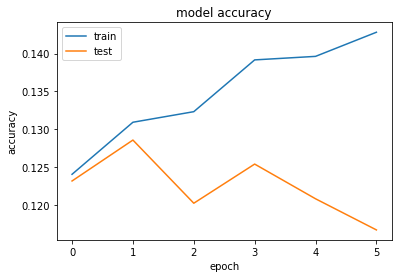

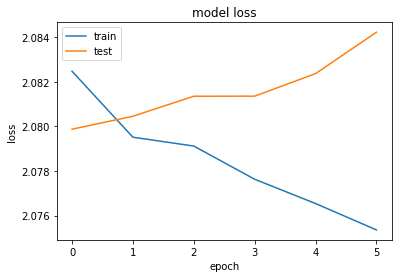

In [25]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
predictions = model.predict(test_x)

def get_card_from_encoding(encoding):
    gambels = encoding.argmax(axis=1)
    return np.vectorize(lambda x:possible_result[x])(gambels)

  1/266 [..............................] - ETA: 2:49

  2/266 [..............................] - ETA: 29s 

  3/266 [..............................] - ETA: 29s

  4/266 [..............................] - ETA: 29s

  5/266 [..............................] - ETA: 29s

  6/266 [..............................] - ETA: 28s

  7/266 [..............................] - ETA: 28s

  8/266 [..............................] - ETA: 28s

  9/266 [>.............................] - ETA: 28s

 10/266 [>.............................] - ETA: 28s

 11/266 [>.............................] - ETA: 28s

 12/266 [>.............................] - ETA: 28s

 13/266 [>.............................] - ETA: 28s

 14/266 [>.............................] - ETA: 27s

 15/266 [>.............................] - ETA: 27s

 16/266 [>.............................] - ETA: 27s

 17/266 [>.............................] - ETA: 27s

 18/266 [=>............................] - ETA: 27s

 19/266 [=>............................] - ETA: 27s

 20/266 [=>............................] - ETA: 27s

 21/266 [=>............................] - ETA: 27s

 22/266 [=>............................] - ETA: 27s

 23/266 [=>............................] - ETA: 27s

 24/266 [=>............................] - ETA: 27s

 25/266 [=>............................] - ETA: 27s

 26/266 [=>............................] - ETA: 27s

 27/266 [==>...........................] - ETA: 26s

 28/266 [==>...........................] - ETA: 26s

 29/266 [==>...........................] - ETA: 26s

 30/266 [==>...........................] - ETA: 26s

 31/266 [==>...........................] - ETA: 26s

 32/266 [==>...........................] - ETA: 26s

 33/266 [==>...........................] - ETA: 26s

 34/266 [==>...........................] - ETA: 26s

 35/266 [==>...........................] - ETA: 26s

 36/266 [===>..........................] - ETA: 26s

 37/266 [===>..........................] - ETA: 26s

 38/266 [===>..........................] - ETA: 26s

 39/266 [===>..........................] - ETA: 25s

 40/266 [===>..........................] - ETA: 25s

 41/266 [===>..........................] - ETA: 25s

 42/266 [===>..........................] - ETA: 25s

 43/266 [===>..........................] - ETA: 25s

 44/266 [===>..........................] - ETA: 25s

 45/266 [====>.........................] - ETA: 25s

 46/266 [====>.........................] - ETA: 25s

 47/266 [====>.........................] - ETA: 25s

 48/266 [====>.........................] - ETA: 25s

 49/266 [====>.........................] - ETA: 24s

 50/266 [====>.........................] - ETA: 24s

 51/266 [====>.........................] - ETA: 24s

 52/266 [====>.........................] - ETA: 24s

 53/266 [====>.........................] - ETA: 24s

 54/266 [=====>........................] - ETA: 24s

 55/266 [=====>........................] - ETA: 24s

 56/266 [=====>........................] - ETA: 24s

 57/266 [=====>........................] - ETA: 24s

 58/266 [=====>........................] - ETA: 24s

 59/266 [=====>........................] - ETA: 24s

 60/266 [=====>........................] - ETA: 23s

 61/266 [=====>........................] - ETA: 23s

 62/266 [=====>........................] - ETA: 23s

 63/266 [======>.......................] - ETA: 23s

 64/266 [======>.......................] - ETA: 23s

 65/266 [======>.......................] - ETA: 23s

 66/266 [======>.......................] - ETA: 23s

 67/266 [======>.......................] - ETA: 23s

 68/266 [======>.......................] - ETA: 23s

 69/266 [======>.......................] - ETA: 23s

 70/266 [======>.......................] - ETA: 22s

 71/266 [=======>......................] - ETA: 22s

 72/266 [=======>......................] - ETA: 22s

 73/266 [=======>......................] - ETA: 22s

 74/266 [=======>......................] - ETA: 22s

 75/266 [=======>......................] - ETA: 22s

 76/266 [=======>......................] - ETA: 22s

 77/266 [=======>......................] - ETA: 22s

 78/266 [=======>......................] - ETA: 22s

 79/266 [=======>......................] - ETA: 22s

 80/266 [========>.....................] - ETA: 21s

 81/266 [========>.....................] - ETA: 21s

 82/266 [========>.....................] - ETA: 21s

 83/266 [========>.....................] - ETA: 21s

 84/266 [========>.....................] - ETA: 21s

 85/266 [========>.....................] - ETA: 21s

 86/266 [========>.....................] - ETA: 21s

 87/266 [========>.....................] - ETA: 21s

 88/266 [========>.....................] - ETA: 21s

 89/266 [=========>....................] - ETA: 21s

 90/266 [=========>....................] - ETA: 20s

 91/266 [=========>....................] - ETA: 20s

 92/266 [=========>....................] - ETA: 20s

 93/266 [=========>....................] - ETA: 20s

 94/266 [=========>....................] - ETA: 20s

 95/266 [=========>....................] - ETA: 20s

 96/266 [=========>....................] - ETA: 20s

 97/266 [=========>....................] - ETA: 20s

 98/266 [==========>...................] - ETA: 20s

 99/266 [==========>...................] - ETA: 19s

100/266 [==========>...................] - ETA: 19s

101/266 [==========>...................] - ETA: 19s

102/266 [==========>...................] - ETA: 19s

103/266 [==========>...................] - ETA: 19s

104/266 [==========>...................] - ETA: 19s

105/266 [==========>...................] - ETA: 19s

106/266 [==========>...................] - ETA: 19s

107/266 [===========>..................] - ETA: 19s

108/266 [===========>..................] - ETA: 18s

109/266 [===========>..................] - ETA: 18s

110/266 [===========>..................] - ETA: 18s

111/266 [===========>..................] - ETA: 18s

112/266 [===========>..................] - ETA: 18s

113/266 [===========>..................] - ETA: 18s

114/266 [===========>..................] - ETA: 18s

115/266 [===========>..................] - ETA: 18s

116/266 [============>.................] - ETA: 18s

117/266 [============>.................] - ETA: 17s

118/266 [============>.................] - ETA: 17s

119/266 [============>.................] - ETA: 17s

120/266 [============>.................] - ETA: 17s

121/266 [============>.................] - ETA: 17s

122/266 [============>.................] - ETA: 17s

123/266 [============>.................] - ETA: 17s

124/266 [============>.................] - ETA: 17s

125/266 [=============>................] - ETA: 17s

126/266 [=============>................] - ETA: 16s

127/266 [=============>................] - ETA: 16s

128/266 [=============>................] - ETA: 16s

129/266 [=============>................] - ETA: 16s

130/266 [=============>................] - ETA: 16s

131/266 [=============>................] - ETA: 16s

132/266 [=============>................] - ETA: 16s

133/266 [==============>...............] - ETA: 16s

134/266 [==============>...............] - ETA: 16s

135/266 [==============>...............] - ETA: 15s

136/266 [==============>...............] - ETA: 15s

137/266 [==============>...............] - ETA: 15s

138/266 [==============>...............] - ETA: 15s

139/266 [==============>...............] - ETA: 15s

140/266 [==============>...............] - ETA: 15s

141/266 [==============>...............] - ETA: 15s

142/266 [===============>..............] - ETA: 15s

143/266 [===============>..............] - ETA: 15s

144/266 [===============>..............] - ETA: 14s

145/266 [===============>..............] - ETA: 14s

146/266 [===============>..............] - ETA: 14s

147/266 [===============>..............] - ETA: 14s

148/266 [===============>..............] - ETA: 14s

149/266 [===============>..............] - ETA: 14s

150/266 [===============>..............] - ETA: 14s

151/266 [================>.............] - ETA: 14s

152/266 [================>.............] - ETA: 14s

153/266 [================>.............] - ETA: 14s

154/266 [================>.............] - ETA: 13s

155/266 [================>.............] - ETA: 13s

156/266 [================>.............] - ETA: 13s

157/266 [================>.............] - ETA: 13s

158/266 [================>.............] - ETA: 13s

159/266 [================>.............] - ETA: 13s

160/266 [=================>............] - ETA: 13s

161/266 [=================>............] - ETA: 13s

162/266 [=================>............] - ETA: 12s

163/266 [=================>............] - ETA: 12s

164/266 [=================>............] - ETA: 12s

165/266 [=================>............] - ETA: 12s

166/266 [=================>............] - ETA: 12s

167/266 [=================>............] - ETA: 12s

168/266 [=================>............] - ETA: 12s

169/266 [==================>...........] - ETA: 12s

170/266 [==================>...........] - ETA: 12s

171/266 [==================>...........] - ETA: 11s

172/266 [==================>...........] - ETA: 11s

173/266 [==================>...........] - ETA: 11s

174/266 [==================>...........] - ETA: 11s

175/266 [==================>...........] - ETA: 11s

176/266 [==================>...........] - ETA: 11s

177/266 [==================>...........] - ETA: 11s

178/266 [===================>..........] - ETA: 11s

179/266 [===================>..........] - ETA: 10s

180/266 [===================>..........] - ETA: 10s

181/266 [===================>..........] - ETA: 10s

182/266 [===================>..........] - ETA: 10s

183/266 [===================>..........] - ETA: 10s

184/266 [===================>..........] - ETA: 10s

185/266 [===================>..........] - ETA: 10s

186/266 [===================>..........] - ETA: 10s

187/266 [====================>.........] - ETA: 9s 

188/266 [====================>.........] - ETA: 9s

189/266 [====================>.........] - ETA: 9s

190/266 [====================>.........] - ETA: 9s

191/266 [====================>.........] - ETA: 9s

192/266 [====================>.........] - ETA: 9s

193/266 [====================>.........] - ETA: 9s

194/266 [====================>.........] - ETA: 9s

195/266 [====================>.........] - ETA: 9s

196/266 [=====================>........] - ETA: 8s

197/266 [=====================>........] - ETA: 8s

198/266 [=====================>........] - ETA: 8s

199/266 [=====================>........] - ETA: 8s

200/266 [=====================>........] - ETA: 8s

201/266 [=====================>........] - ETA: 8s

202/266 [=====================>........] - ETA: 8s

203/266 [=====================>........] - ETA: 8s

204/266 [======================>.......] - ETA: 7s

205/266 [======================>.......] - ETA: 7s

206/266 [======================>.......] - ETA: 7s

207/266 [======================>.......] - ETA: 7s

208/266 [======================>.......] - ETA: 7s

209/266 [======================>.......] - ETA: 7s

210/266 [======================>.......] - ETA: 7s

211/266 [======================>.......] - ETA: 7s

212/266 [======================>.......] - ETA: 6s

213/266 [=======================>......] - ETA: 6s

214/266 [=======================>......] - ETA: 6s

215/266 [=======================>......] - ETA: 6s

216/266 [=======================>......] - ETA: 6s

217/266 [=======================>......] - ETA: 6s

218/266 [=======================>......] - ETA: 6s

219/266 [=======================>......] - ETA: 6s

220/266 [=======================>......] - ETA: 5s

221/266 [=======================>......] - ETA: 5s

222/266 [========================>.....] - ETA: 5s

223/266 [========================>.....] - ETA: 5s

224/266 [========================>.....] - ETA: 5s

225/266 [========================>.....] - ETA: 5s

226/266 [========================>.....] - ETA: 5s

227/266 [========================>.....] - ETA: 5s

228/266 [========================>.....] - ETA: 4s

229/266 [========================>.....] - ETA: 4s

230/266 [========================>.....] - ETA: 4s

231/266 [=========================>....] - ETA: 4s

232/266 [=========================>....] - ETA: 4s

233/266 [=========================>....] - ETA: 4s

234/266 [=========================>....] - ETA: 4s

235/266 [=========================>....] - ETA: 4s

236/266 [=========================>....] - ETA: 3s

237/266 [=========================>....] - ETA: 3s

238/266 [=========================>....] - ETA: 3s

239/266 [=========================>....] - ETA: 3s

240/266 [==========================>...] - ETA: 3s

241/266 [==========================>...] - ETA: 3s

242/266 [==========================>...] - ETA: 3s

243/266 [==========================>...] - ETA: 2s

244/266 [==========================>...] - ETA: 2s

245/266 [==========================>...] - ETA: 2s

246/266 [==========================>...] - ETA: 2s

247/266 [==========================>...] - ETA: 2s

248/266 [==========================>...] - ETA: 2s

249/266 [===========================>..] - ETA: 2s

250/266 [===========================>..] - ETA: 2s

251/266 [===========================>..] - ETA: 1s

252/266 [===========================>..] - ETA: 1s

253/266 [===========================>..] - ETA: 1s

254/266 [===========================>..] - ETA: 1s

255/266 [===========================>..] - ETA: 1s

256/266 [===========================>..] - ETA: 1s

257/266 [===========================>..] - ETA: 1s

258/266 [============================>.] - ETA: 1s

259/266 [============================>.] - ETA: 0s

260/266 [============================>.] - ETA: 0s

261/266 [============================>.] - ETA: 0s

262/266 [============================>.] - ETA: 0s

263/266 [============================>.] - ETA: 0s

264/266 [============================>.] - ETA: 0s

265/266 [============================>.] - ETA: 0s

266/266 [==============================] - ETA: 0s

266/266 [==============================] - 35s 131ms/step


In [27]:
# predictions_cards = get_card_from_encoding(predictions)
# true_cards = get_card_from_encoding(test_y)

# compute_statistics(predictions_cards,true_cards)